In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv
import time

In [3]:
def B_a(a,gamma,e,r_p,b_0,b_3):
    return a**3*b_3+a**2*(3*b_3*gamma-2*e/(gamma*r_p))+a*(3*b_3*gamma**2-6*e/r_p)+b_0

def Q_a(a,gamma,q_5,b_3,e,r_p,b_0,q_0):
    return (a**5*q_5
           +a**4*(-6*b_3*e/(gamma*r_p)+5*gamma*q_5)
           +a**3*(-24*b_3*e/r_p+8*(e/(gamma*r_p))**2+10*gamma**2*q_5)
           +a**2*(3*b_0*b_3-24*b_3*e*gamma/r_p-3*b_3**2*gamma**3+(28/gamma)*(e/r_p)**2+10*gamma**3*q_5)
           +a*(6*b_0*b_3*gamma-4*b_0*e/(gamma*r_p)-6*b_3**2*gamma**4+(4*e/r_p)**2+4*e*gamma**2*b_3/r_p+5*gamma**4*q_5)
           +q_0)

def R_a(a, gamma, e, r_p, b_0, b_3, q_0, q_5):
    return (a**6*(b_3**2-20*q_5/9)
           +a**5*(6*gamma*b_3**2+28*b_3*e/(3*gamma*r_p)-q_5*100*gamma/9)
           +a**4*(15*(b_3*gamma)**2+88*b_3*e/(3*r_p)-124*(e/(3*gamma*r_p))**2-200*q_5*gamma**2/9)
           +a**3*(-14*b_0*b_3/3+74*b_3**2*gamma**3/3+16*b_3*e*gamma/(3*r_p)-(344/gamma)*(e/(3*r_p))**2-200*q_5*gamma**3/9)
           +a**2*(-22*b_0*b_3*gamma/3+44*b_0*e/(9*gamma*r_p)+67*b_3**2*gamma**4/3-404*b_3*e*gamma**2/(9*r_p)+(2*e/(3*r_p))**2-100*q_5*gamma**4/9)
           +a*(6*b_0*b_3*gamma**2-12*b_0*e/r_p-20*q_0/9)
           +b_0**2)

def B_crit(a,r_p,u_p,u_c,e,gamma):
    return (a**3*u_p/r_p**3
           +a**2*(3*u_p*gamma/r_p**3-2*e/(gamma*r_p))
           +a*(3*u_p*gamma**2/r_p**3-6*e/r_p)
           +(u_p*(gamma/r_p)**3-4*e*gamma/r_p+u_c*r_p/gamma))

def Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (a**5*v_p/r_p**5
           +a**4*(5*v_p*gamma/r_p**5-6*e*u_p/(gamma*r_p**4))
           +a**3*(10*v_p*gamma**2/r_p**5-24*e*u_p/r_p**4+8*(e/(gamma*r_p))**2)
           +a**2*(10*v_p*gamma**3/r_p**5-36*e*u_p*gamma/r_p**4+(28*e**2+3*u_c*u_p)/(gamma*r_p**2))
           +a*(5*v_p*gamma**4/r_p**5-24*e*u_p*gamma**2/r_p**4+2*((4*e)**2+3*u_c*u_p)/r_p**2-4*e*u_c/gamma**2)
           +(v_p*(gamma/r_p)**5-6*e*u_p*gamma**3/r_p**4+3*gamma*(4*e**2+u_c*u_p)/r_p**2-6*e*u_c/gamma+v_c*r_p/gamma))

def R_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return 9*B_crit(a,r_p,u_p,u_c,e,gamma)**2-20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)

def f(c,a,r_p,u_p,v_p,u_c,v_c,e,gamma,E):
    return (a*c**2)/2+(B_crit(a,r_p,u_p,u_c,e,gamma)*c**4)/4+(Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)*c**6)/6-E*c

def wupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return ((-3*B_crit(a,r_p,u_p,u_c,e,gamma)+np.sqrt(R_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(10*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

def wlower(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return ((-3*B_crit(a,r_p,u_p,u_c,e,gamma)-np.sqrt(R_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(10*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

def cupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return np.sqrt(wupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma))

def clower(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return np.sqrt(wlower(a,r_p,u_p,v_p,u_c,v_c,e,gamma))

def ELOWER(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (a*cupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma)+B_crit(a,r_p,u_p,u_c,e,gamma)*cupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma)**3
            +Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)*cupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma)**5)

def EUPPER(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (a*clower(a,r_p,u_p,v_p,u_c,v_c,e,gamma)+B_crit(a,r_p,u_p,u_c,e,gamma)*clower(a,r_p,u_p,v_p,u_c,v_c,e,gamma)**3
            +Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)*clower(a,r_p,u_p,v_p,u_c,v_c,e,gamma)**5)

def Elower(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (np.sqrt(10*(-3*B_crit(a,r_p,u_p,u_c,e,gamma)+np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma))
            *(20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)-3*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            +B_crit(a,r_p,u_p,u_c,e,gamma)*np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(250*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

def Eupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (np.sqrt(10*(-3*B_crit(a,r_p,u_p,u_c,e,gamma)-np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma))
            *(20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)-3*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -B_crit(a,r_p,u_p,u_c,e,gamma)*np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(250*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

In [4]:
start = time.time()
b_0=1
b_3=0.3
q_0=1
q_5=1

e_val, r_c_val, r_p_val, gamma_val, u_p_val, u_c_val, v_c_val, v_p_val = [],[],[],[],[],[],[],[]

for i in np.linspace(-1,1,21): #e
    for j in np.linspace(-1,1,21): #gamma
        for k in np.linspace(-1,1,21): #r_p
            al = np.linspace(0,20,2001)
            if all(Q_a(al,j,q_5,b_3,i,k,b_0,q_0) > 0) and (min(B_a(al,j,i,k,b_0,b_3)) < 0):
                for n in np.linspace(0,4,41):
                    if (B_a(n,j,i,k,b_0,b_3) < 0) and (Q_a(n,j,q_5,b_3,i,k,b_0,q_0) > 0) and (R_a(n,j, i, k, b_0, b_3, q_0, q_5) > 0):
                        
                        e_val.append(i)
                        r_c_val.append((j**2+n*j)/k)
                        r_p_val.append(k)
                        gamma_val.append(j)
                        u_p_val.append(b_3*k**3)
                        u_c_val.append(b_0*j/k-b_3*j**4/k+4*i*(j/k)**2)
                        v_c_val.append(-3*b_0*b_3*j**3/k+6*b_0*i*j/k**2+3*j**6*b_3**2/k-12*b_3*i*j**4/k**2+12*(i*j)**2/k**3-j**6*q_5/k+j*q_0/k)
                        v_p_val.append(q_5*k**5)
                        
vals = []
coeffs = ['e','rc','rp','gamma','up','uc','vc','vp']
for i in range(len(e_val)):
    vals.append(dict(zip(coeffs,[e_val[i], r_c_val[i], r_p_val[i], gamma_val[i], u_p_val[i], u_c_val[i], v_c_val[i], v_p_val[i]])))
    
def WriteDictToCSV(csv_file,csv_columns,dict_data):
    try:
        with open(csv_file, 'w+') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in dict_data:
                writer.writerow(data)
    except IOError as err:
        errno,strerror = err.args
        print("I/O error({0}): {1}".format(errno, strerror))    
    return

WriteDictToCSV("even_params.csv",coeffs,vals)

end = time.time()
print(end-start)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in add
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


10.318382978439331


In [4]:
len(vals)

124

In [5]:
np.where(np.array(r_p_val)>0)[0][0]

62

In [5]:
start = time.time()
a_LL, a_UU = [], []

for i in range(np.where(np.array(r_p_val)>0)[0][0],len(vals)):
    aLL, aUU = [], []
    for a in np.linspace(0.2,10,2000):
        if (R_crit(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) > 0) and (wupper(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) > 0):
            aLL.append(a)
        if (R_crit(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) > 0) and (wlower(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) > 0):
            aUU.append(a)
            
    a_LL.append(aLL)
    a_UU.append(aUU)

end = time.time()
print(end-start)

7.698188304901123


In [12]:
# plt.plot(Elower(np.array(a_LL[0]),r_p_val[87],u_p_val[87],v_p_val[87],u_c_val[87],v_c_val[87],e_val[87],gamma_val[87]),np.array(a_LL[0]))
# plt.plot(Eupper(np.array(a_UU[0]),r_p_val[87],u_p_val[87],v_p_val[87],u_c_val[87],v_c_val[87],e_val[87],gamma_val[87]),np.array(a_UU[0]));

In [7]:
len(a_UU[0]),len(a_LL[0])

(85, 85)

In [8]:
vals[np.where(np.array(r_p_val)>0)[0][0]]

{'e': 0.30000000000000004,
 'gamma': -1.0,
 'rc': -1.2499999999999996,
 'rp': 0.40000000000000013,
 'uc': 4.2499999999999964,
 'up': 0.019200000000000019,
 'vc': -3.2000000000000011,
 'vp': 0.010240000000000016}

In [6]:
Elist, alist = [], []
for i in range(np.where(np.array(r_p_val)>0)[0][0],len(vals)):
    Elist.append(np.linspace(min(EUPPER(np.array(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]]),r_p_val[i],u_p_val[i],v_p_val[i]
                 ,u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),max(EUPPER(np.array(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]])
                 ,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),500))
    alist.append(np.linspace(min(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]]),max(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]]),119))

In [10]:
alist[7].shape

(119,)

In [11]:
len(alist)

62

In [12]:
len(vals)

124

In [7]:
start = time.time()

cvv = np.linspace(-5,5,1001)

a_TT, E_TT = [], []

for i in range(np.where(np.array(r_p_val)>0)[0][0],len(vals)):
    att, Ett = [], []
    for a in alist[i-np.where(np.array(r_p_val)>0)[0][0]]:
        for E in Elist[i-np.where(np.array(r_p_val)>0)[0][0]]:
            f1 = f(cvv,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)

            c1 = cvv[np.where((f1[1:]-f1[0:-1])>0)[0][0]]
            c2 = cvv[np.where((f1[1:]-f1[0:-1])<0)[0][-1]]

            if (abs(f(c1,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)-f(c2,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)) < 0.001) and (abs(c1-c2) > 0.1):
                att.append(a)
                Ett.append(E)
                break
    
    a_TT.append(att)
    E_TT.append(Ett)

end = time.time()
print((end-start)/60)

15.496034554640453


/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


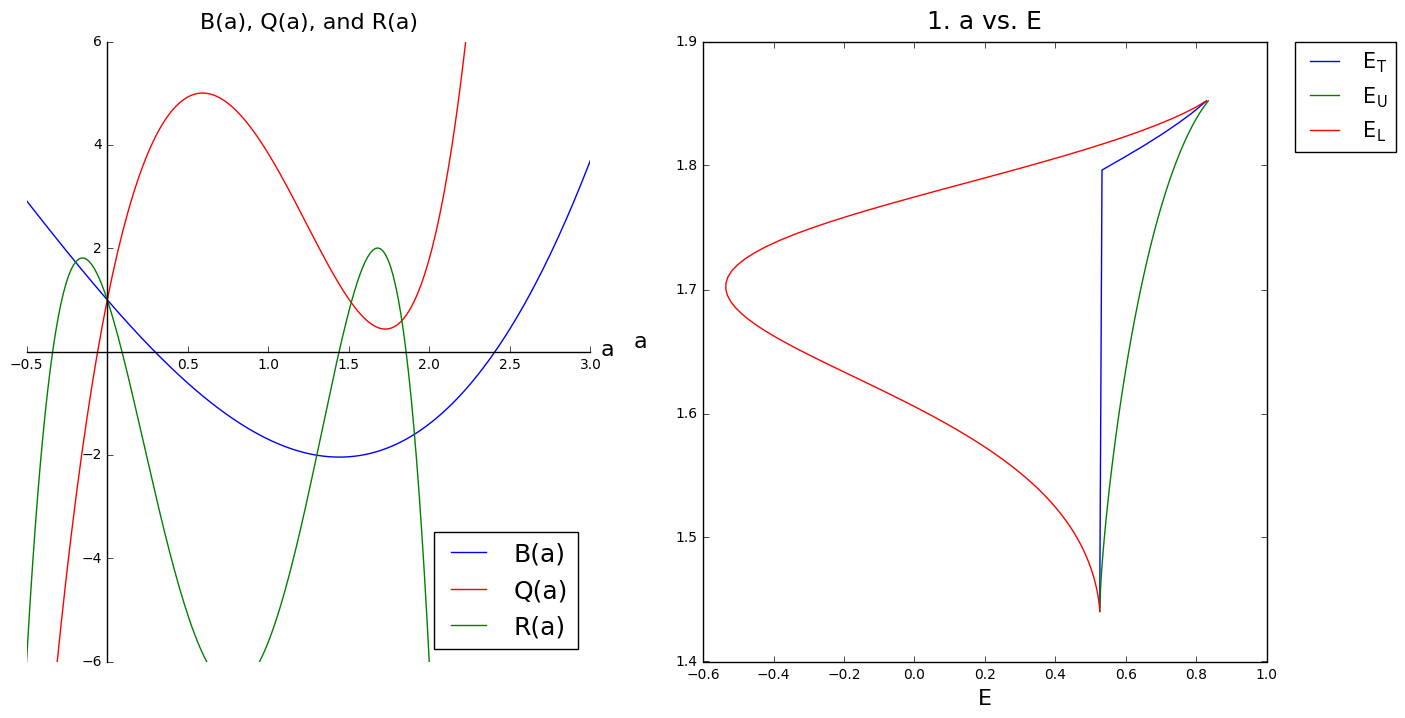

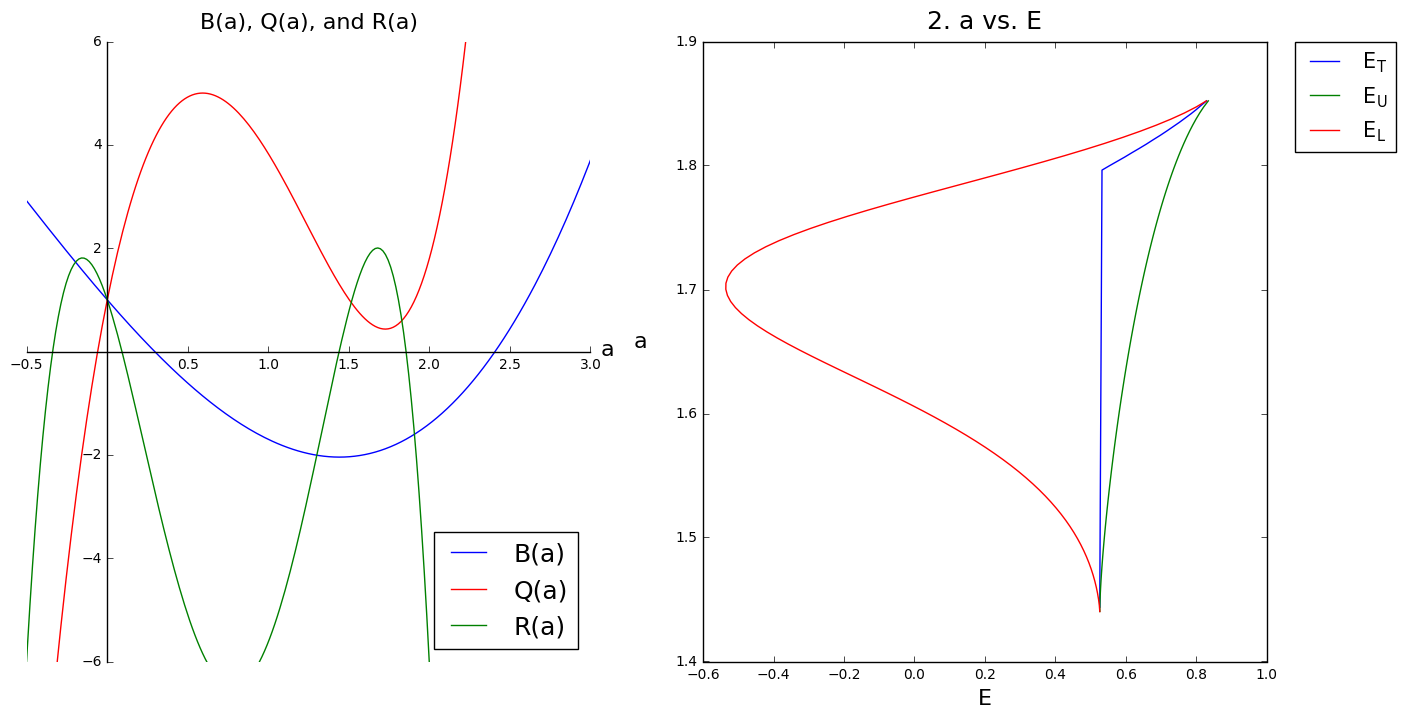

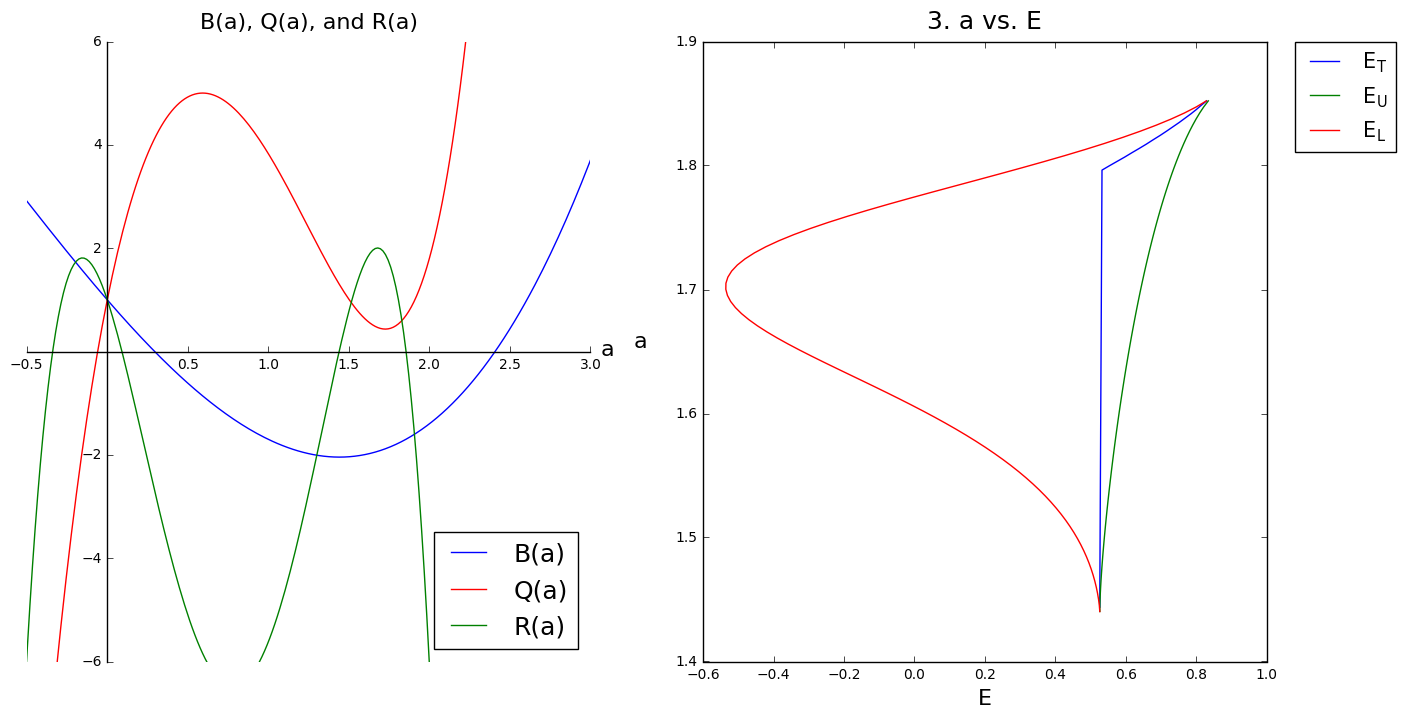

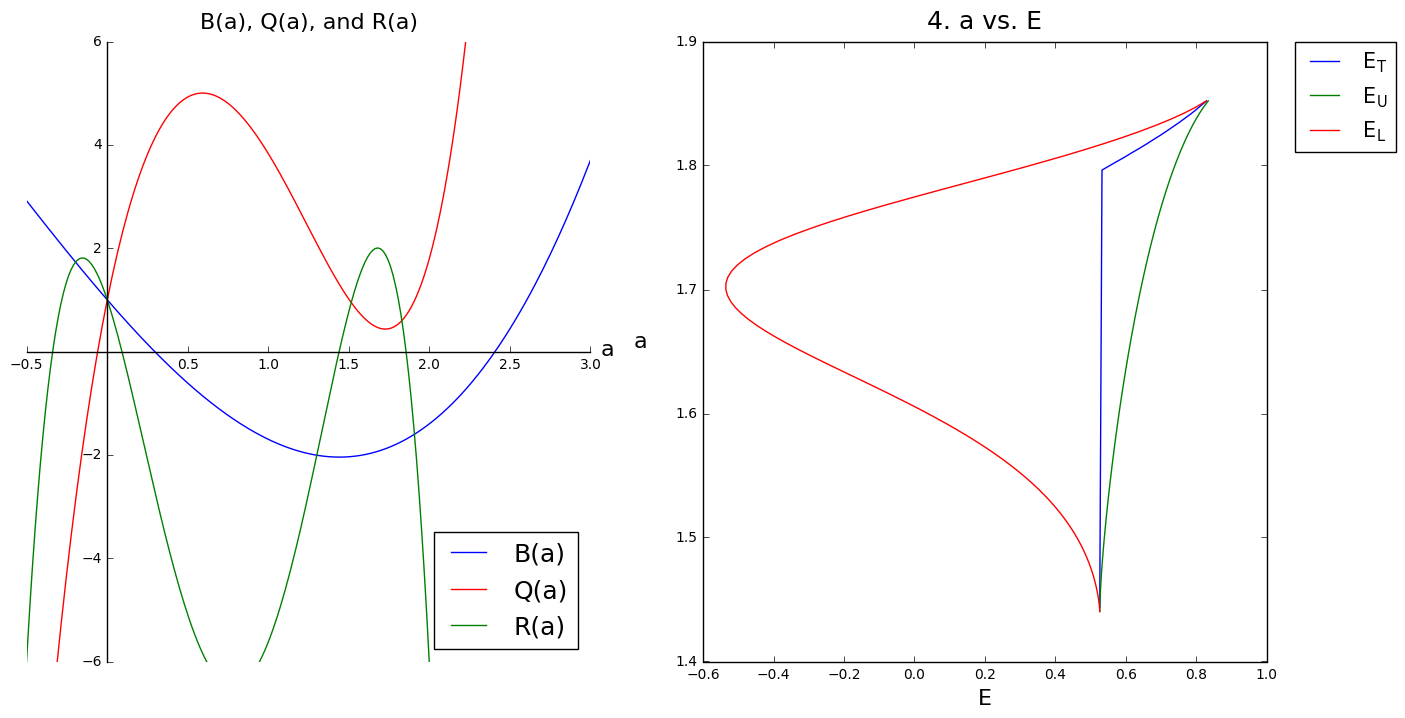

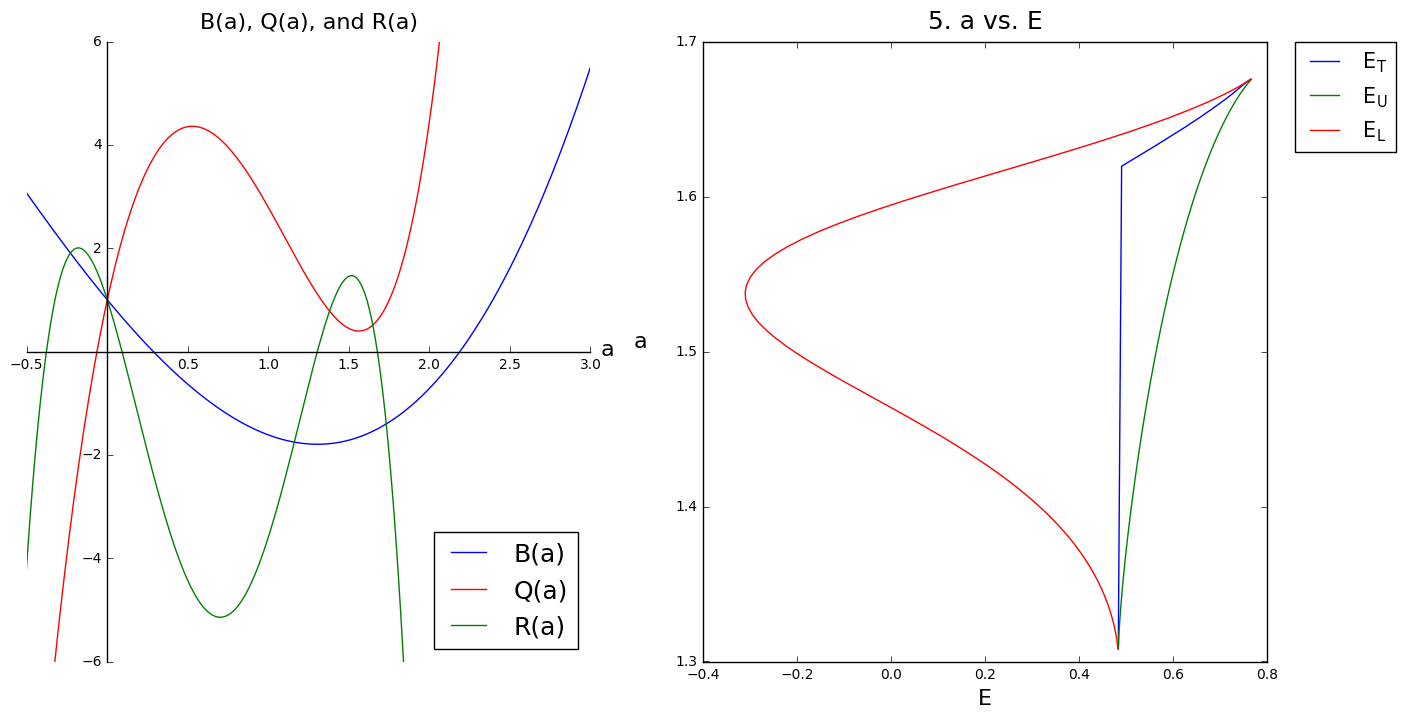

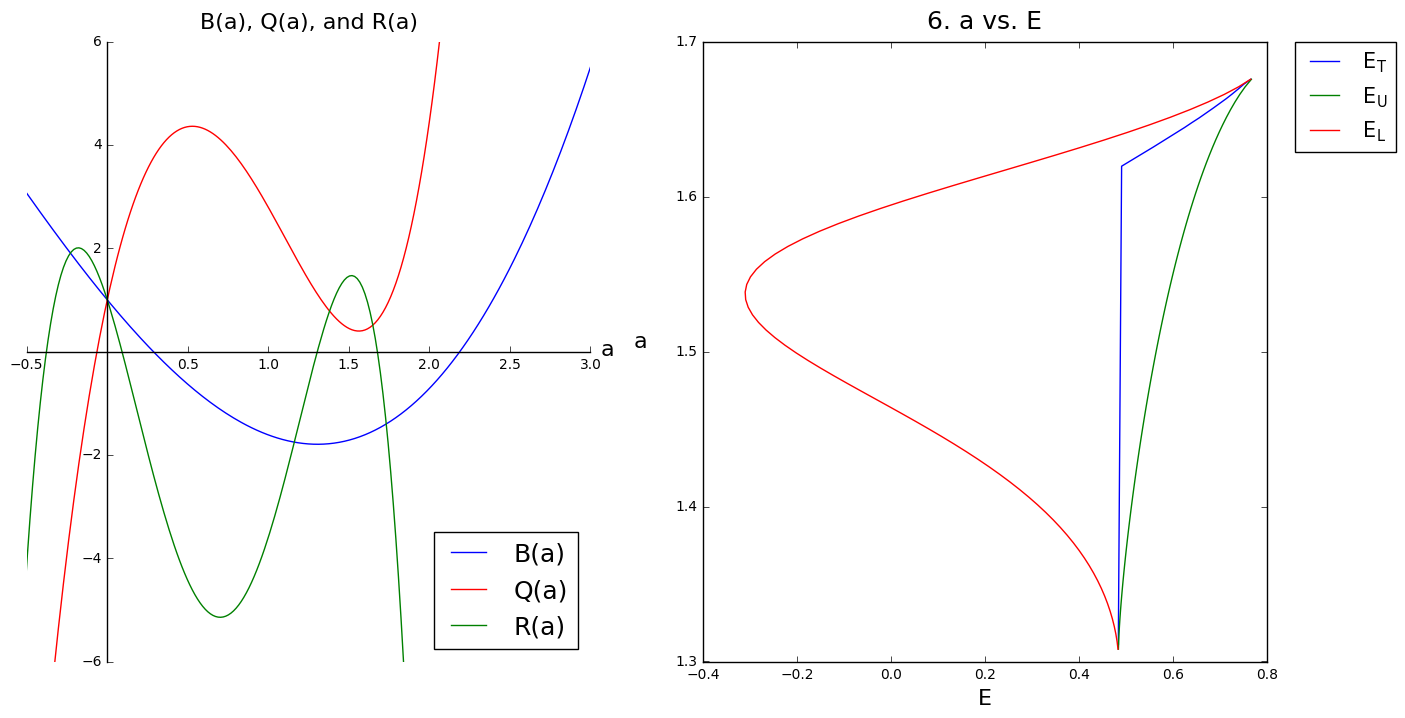

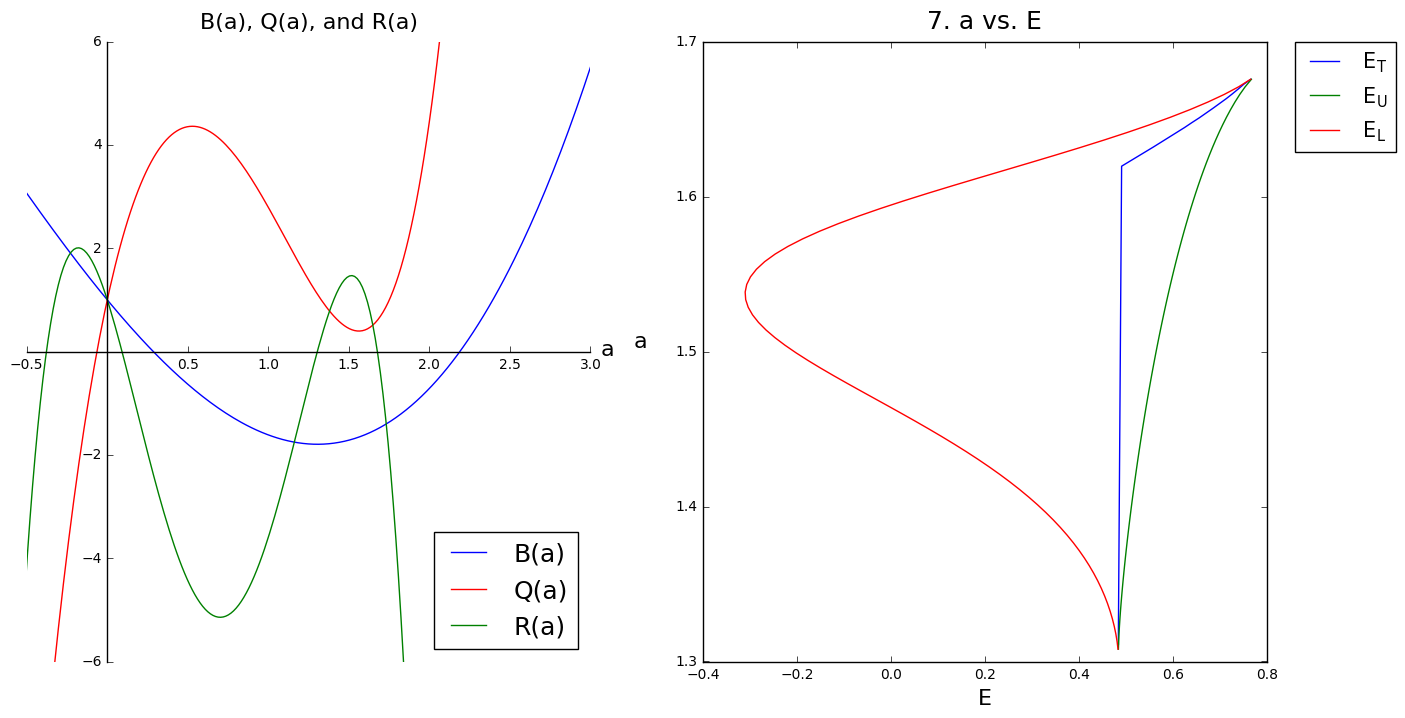

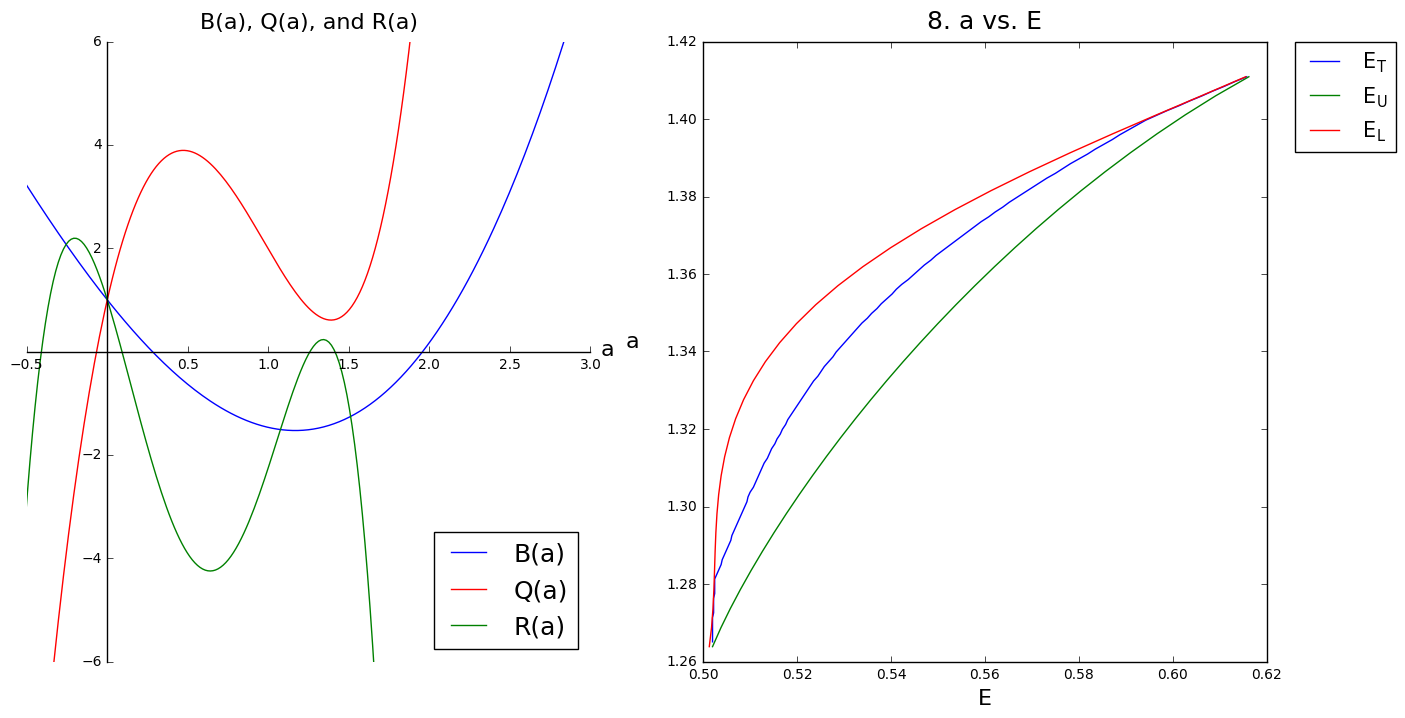

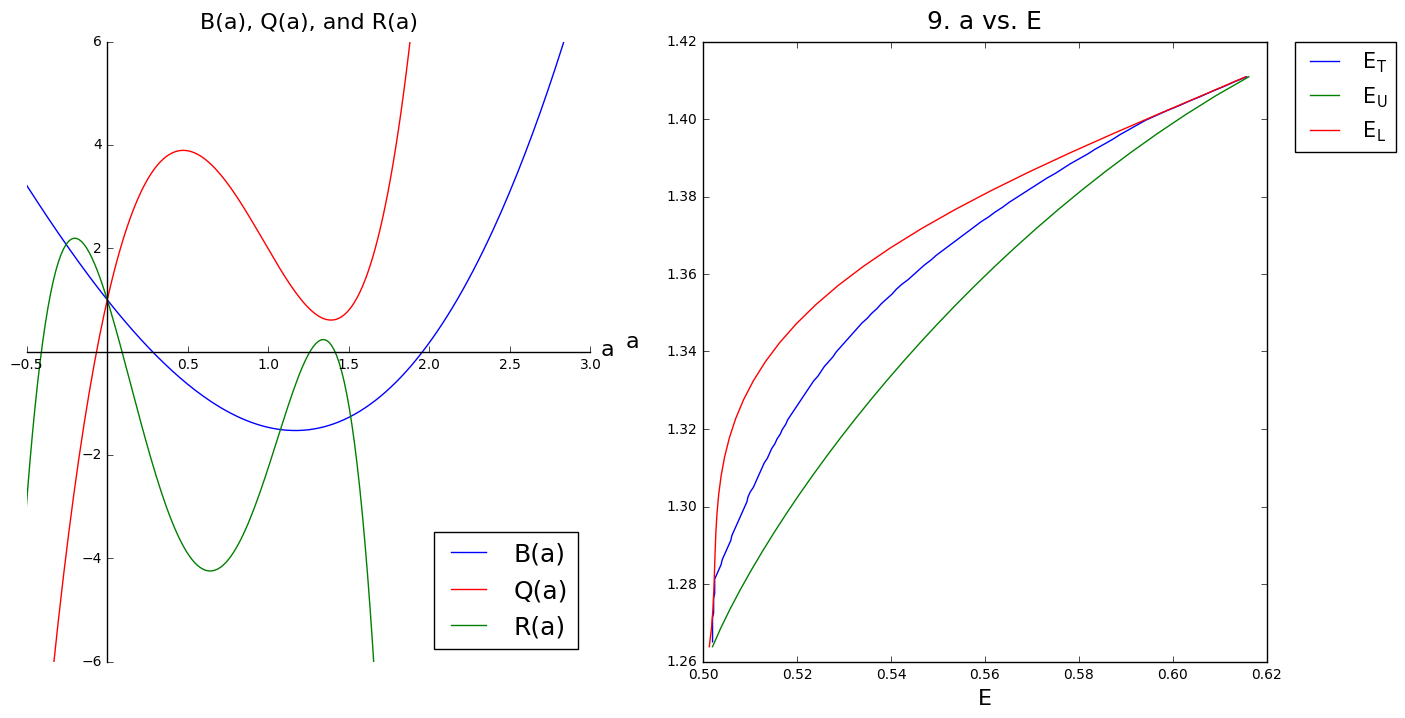

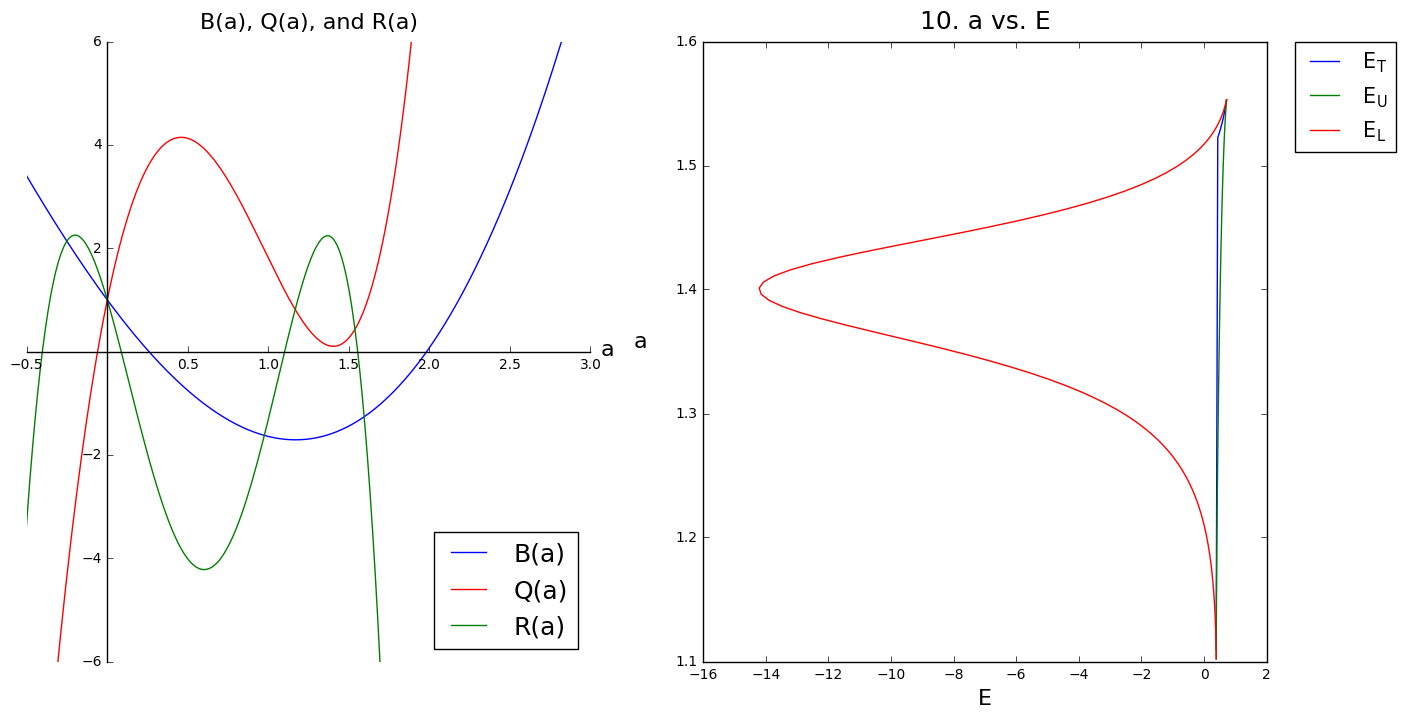

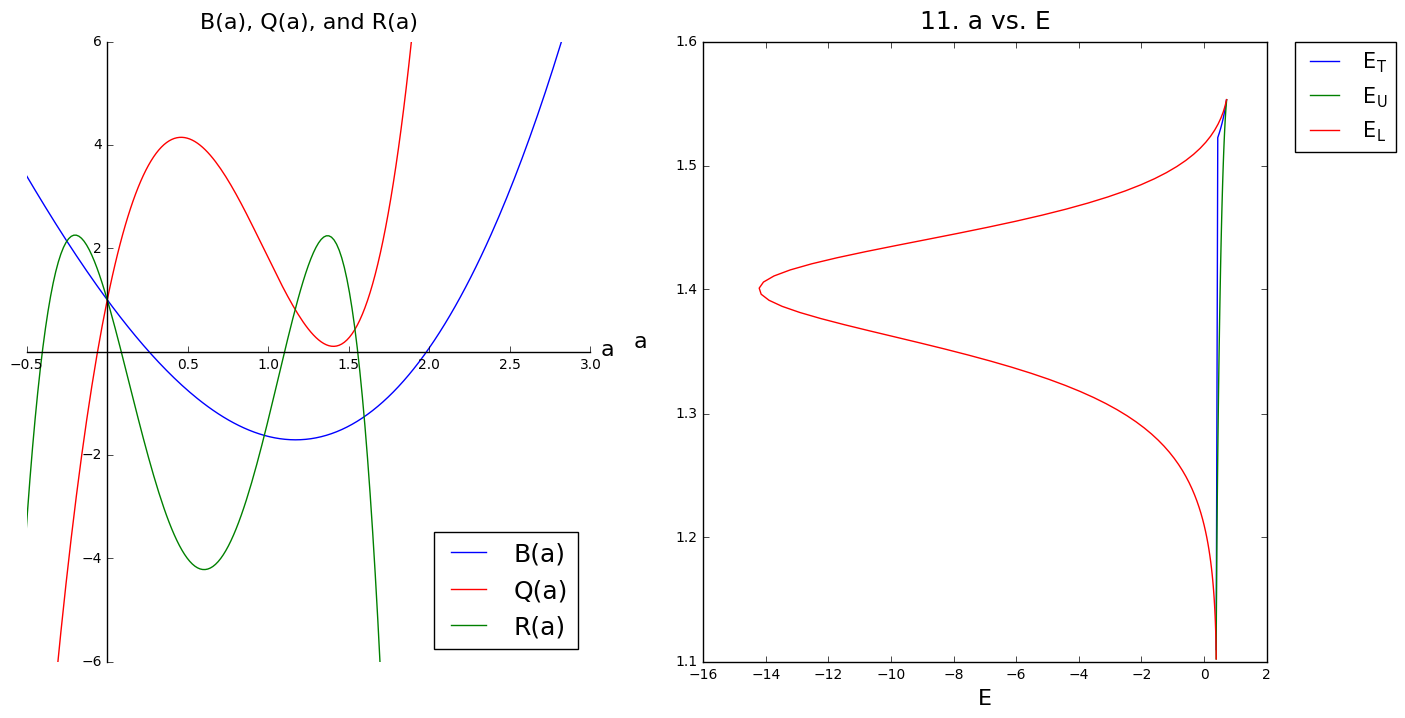

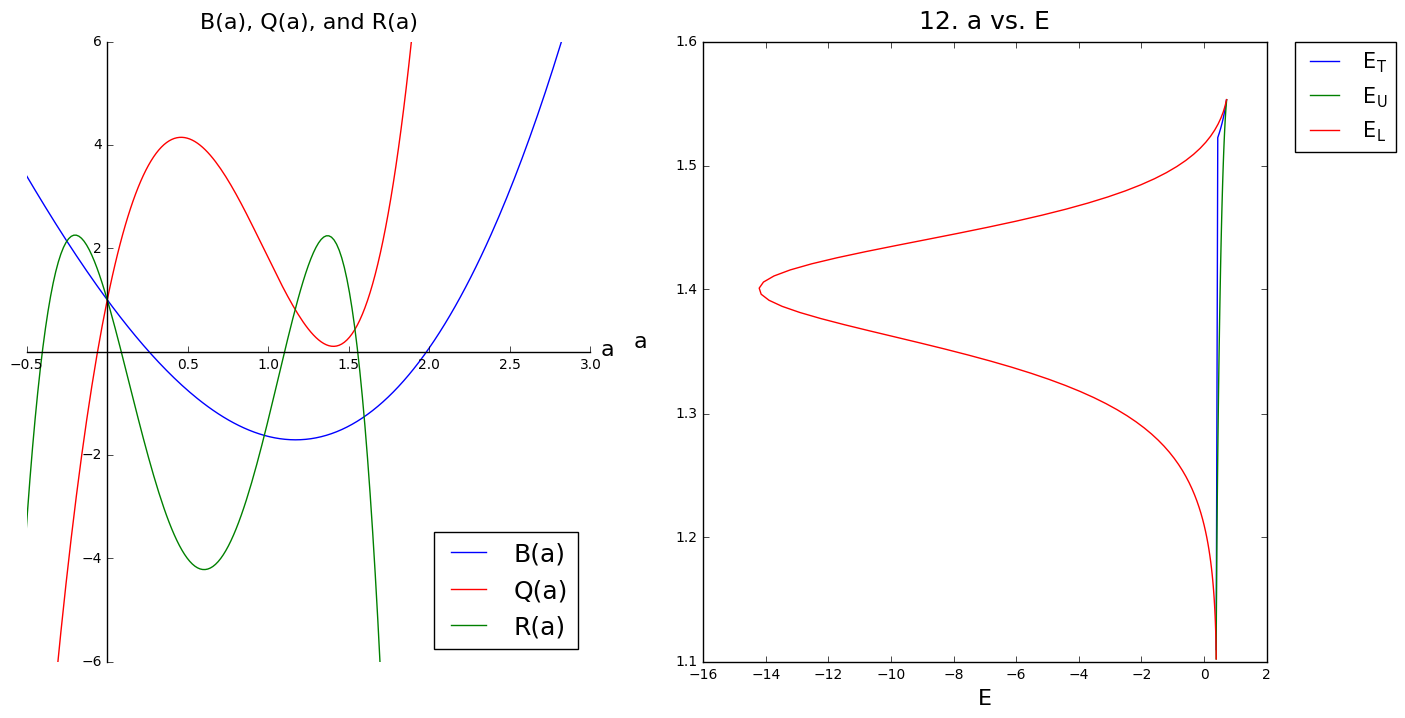

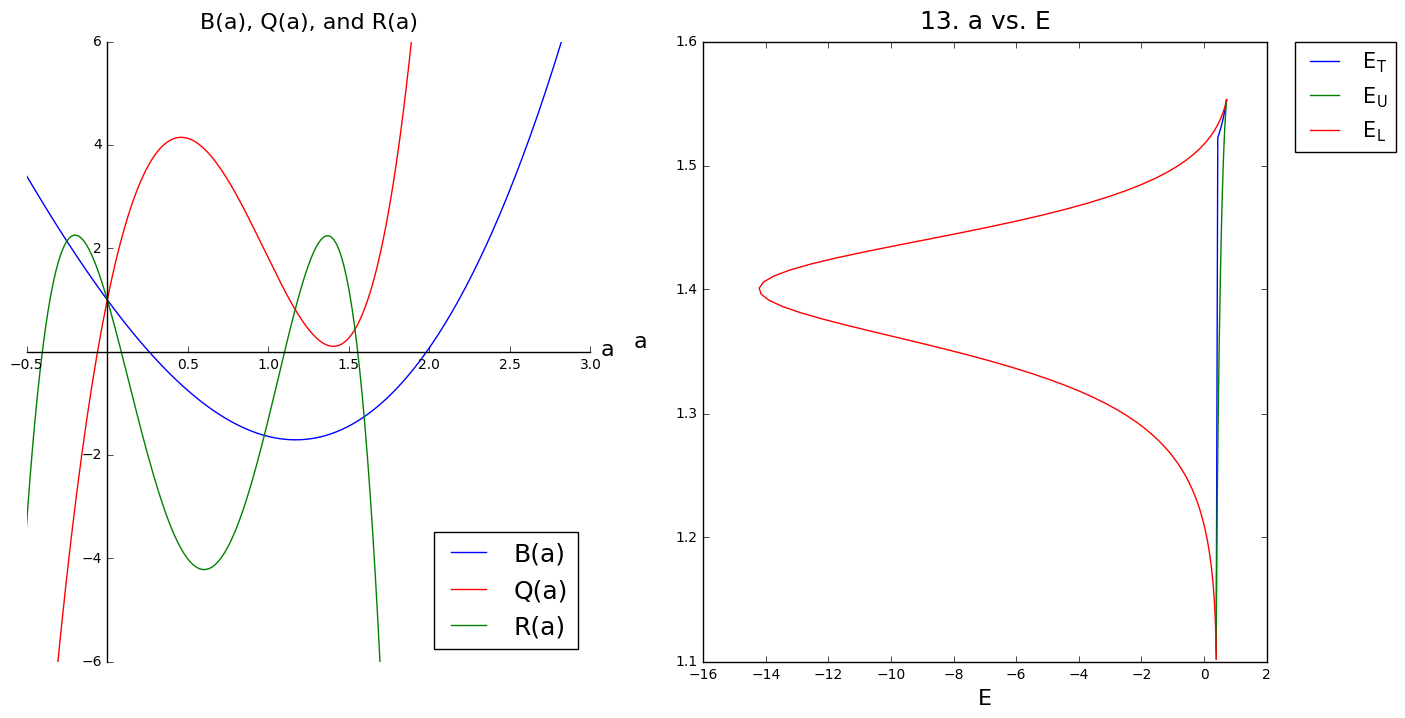

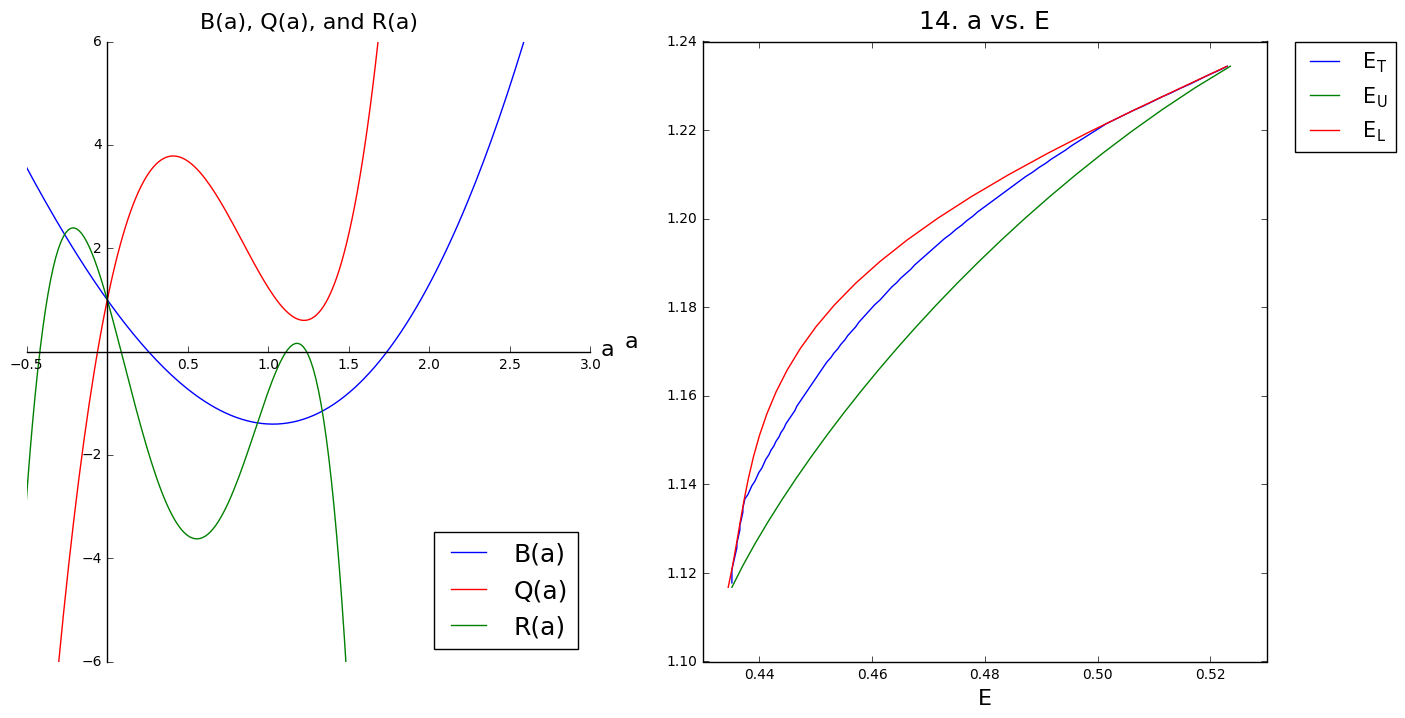

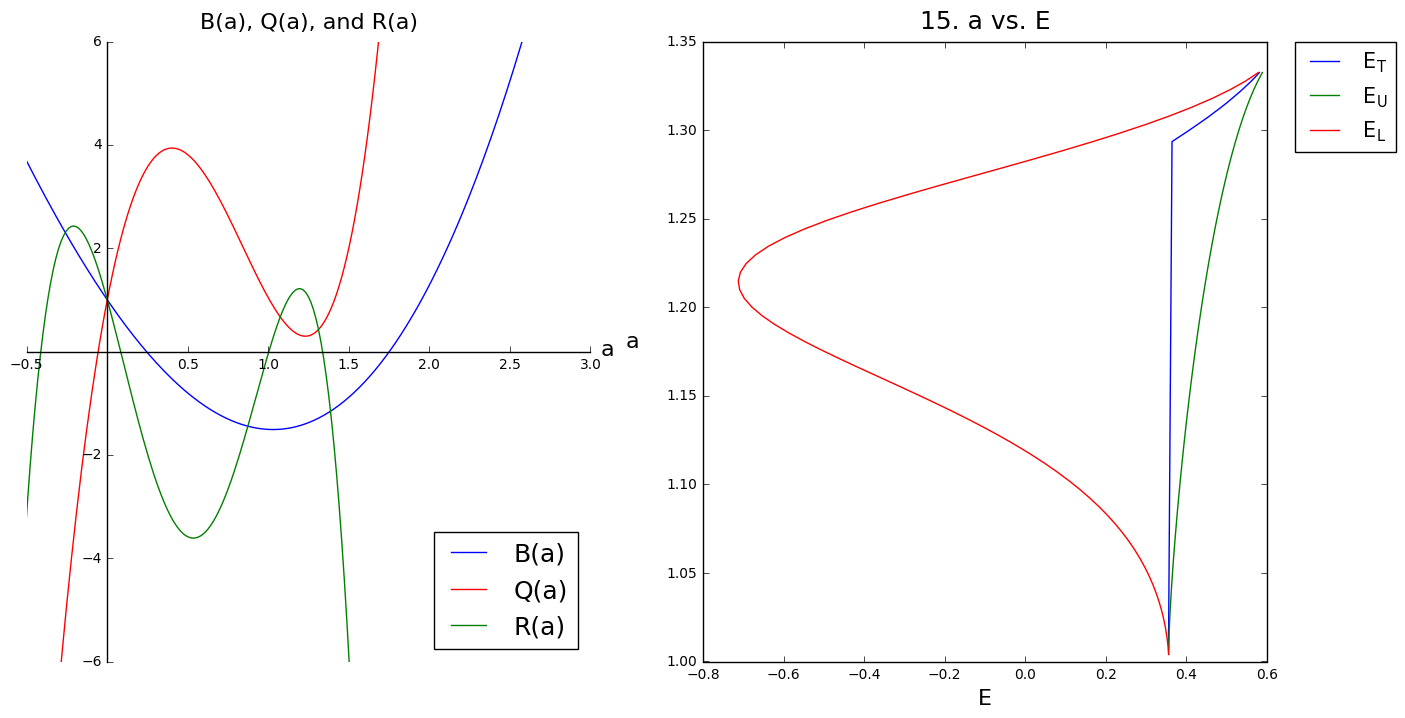

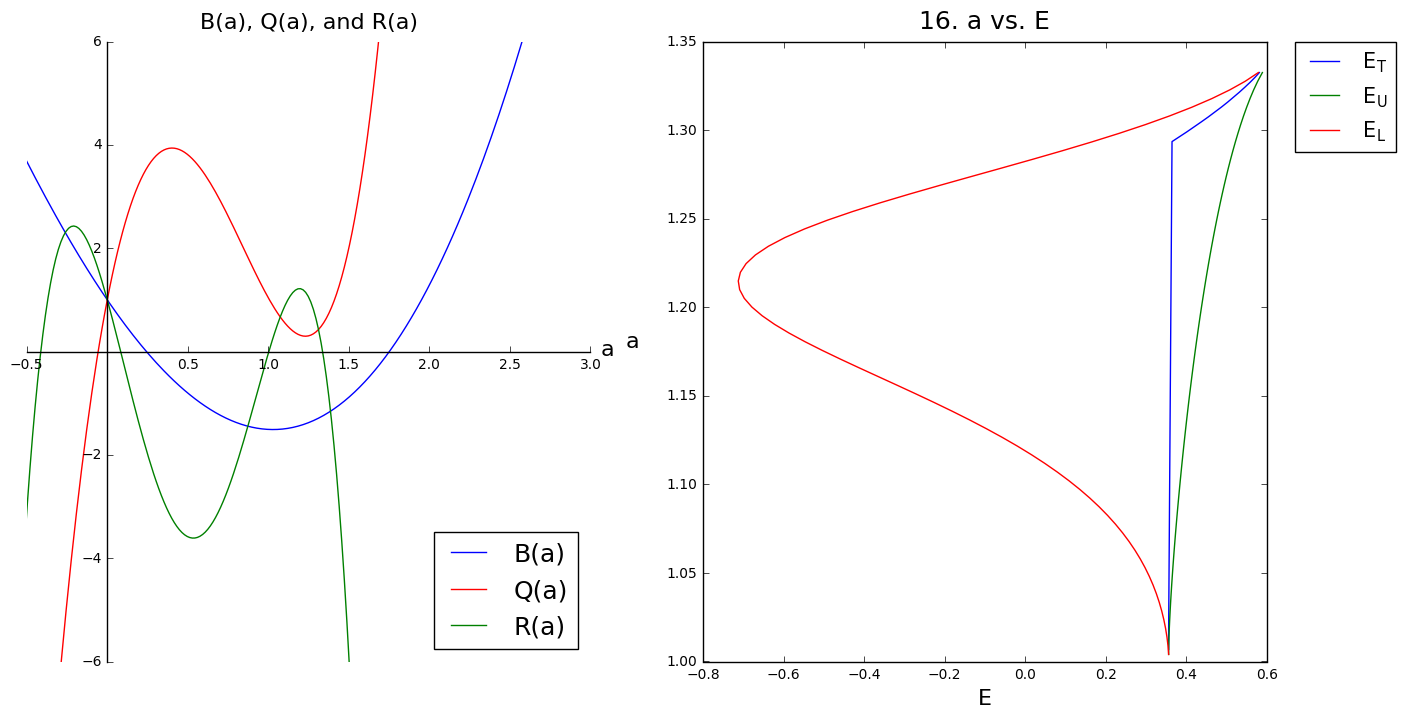

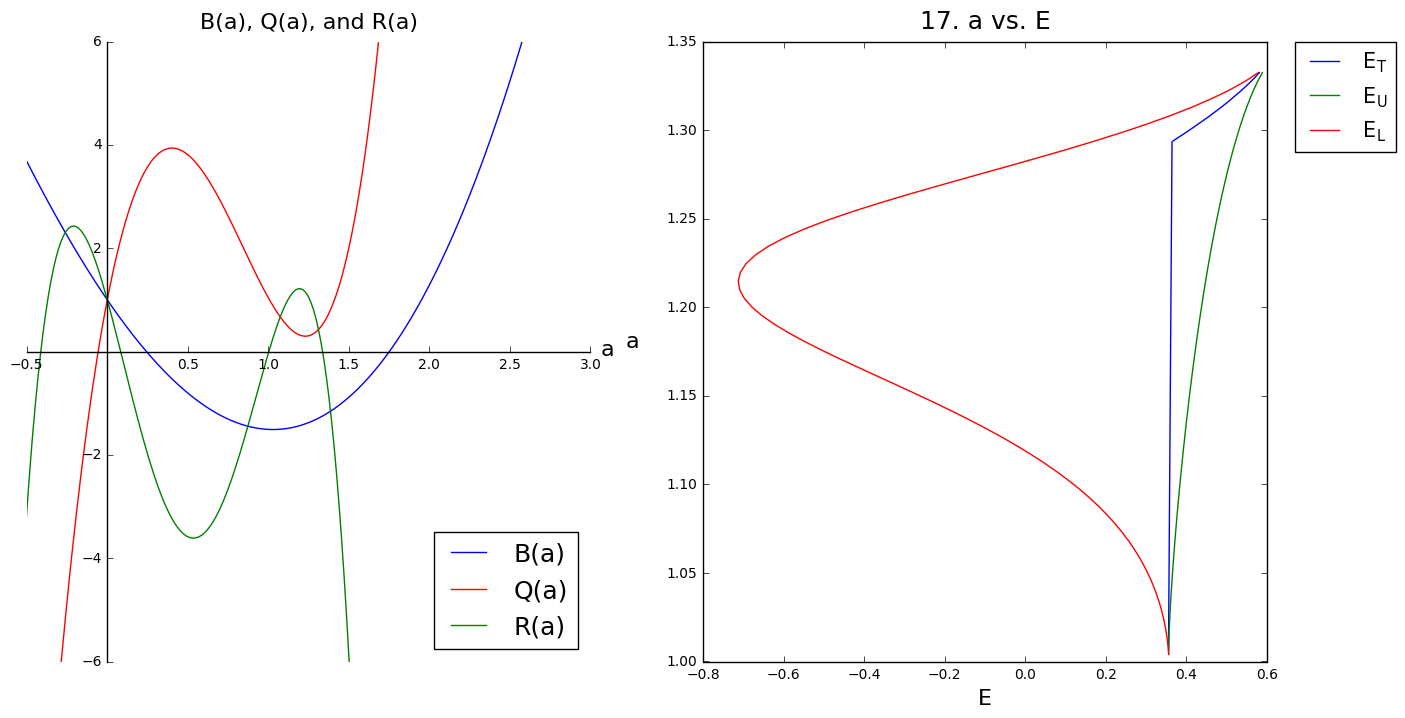

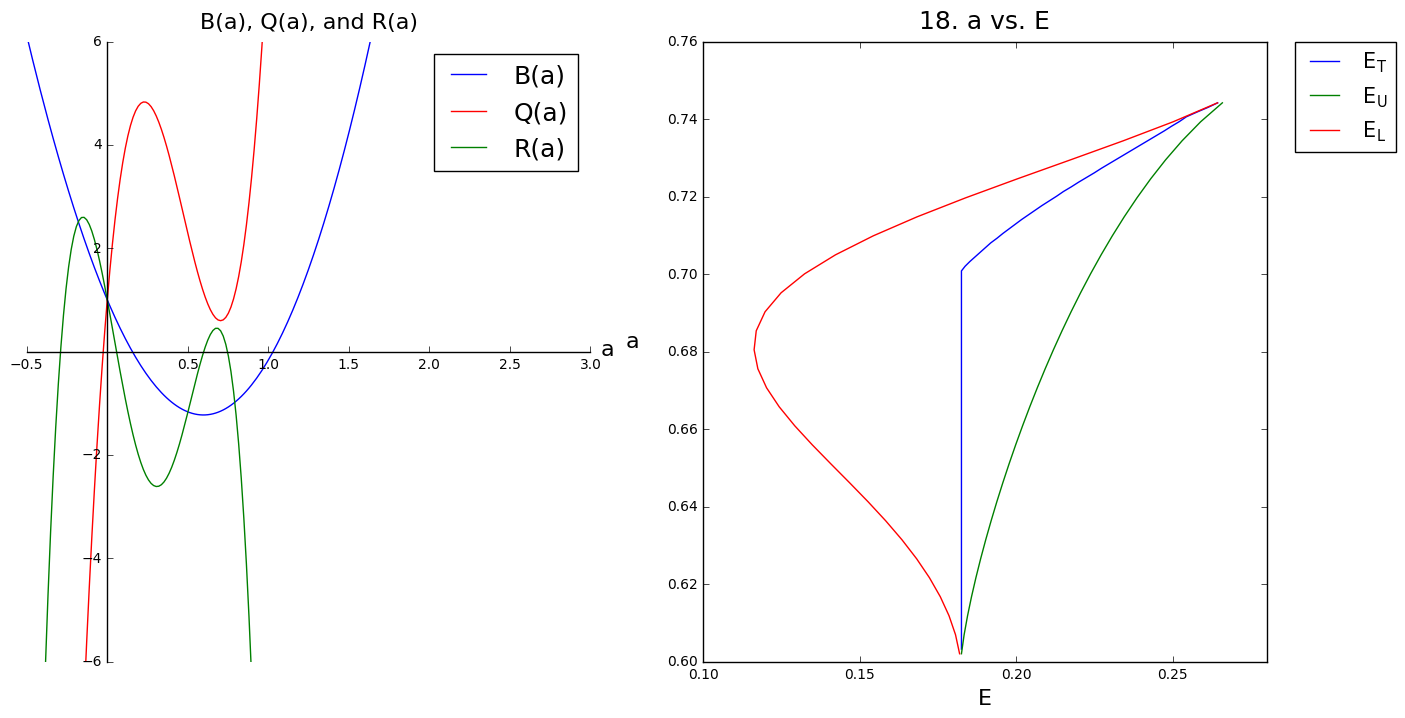

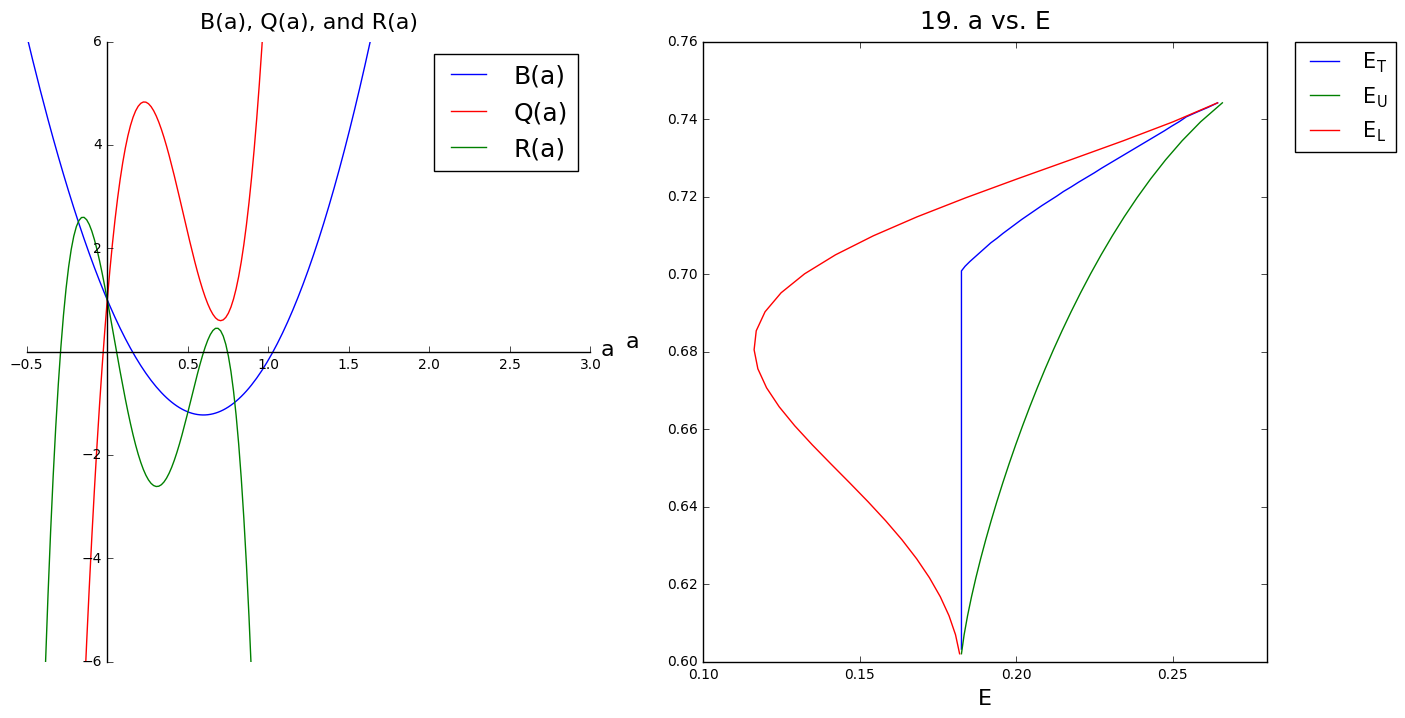

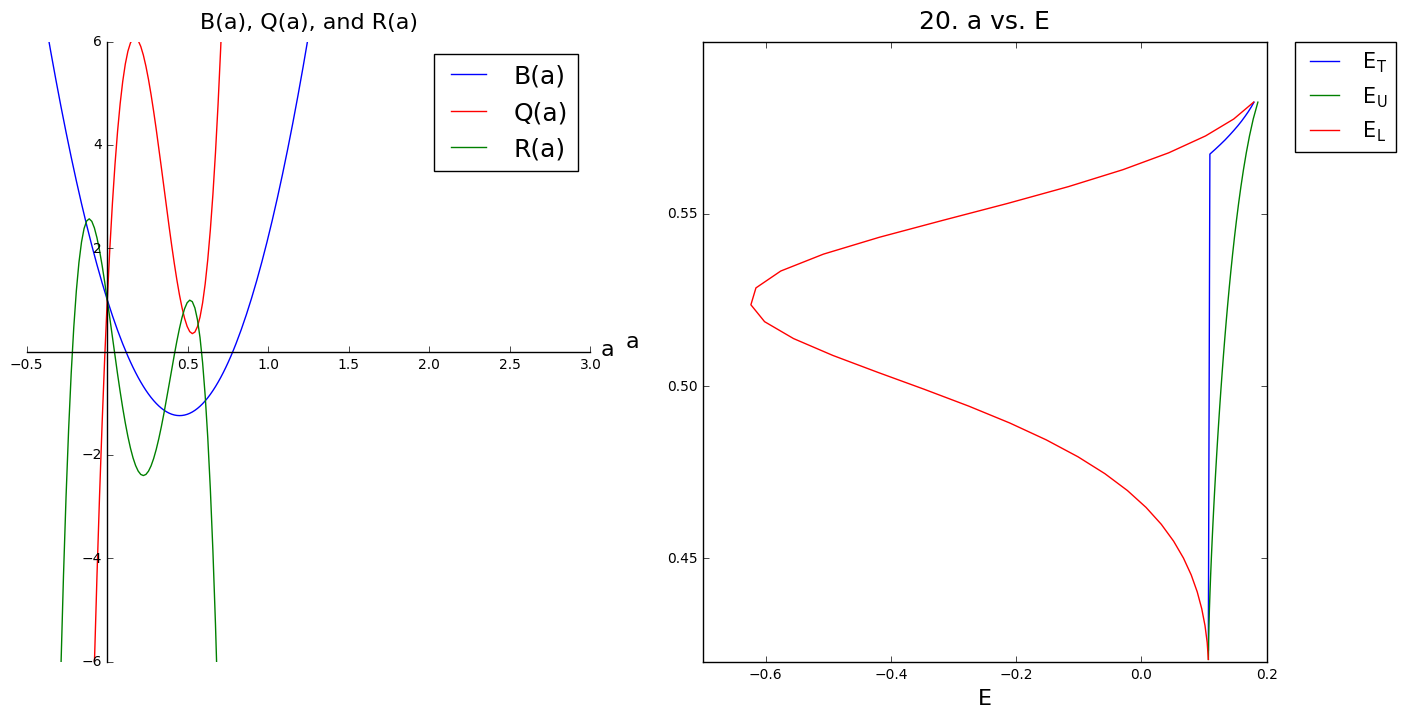

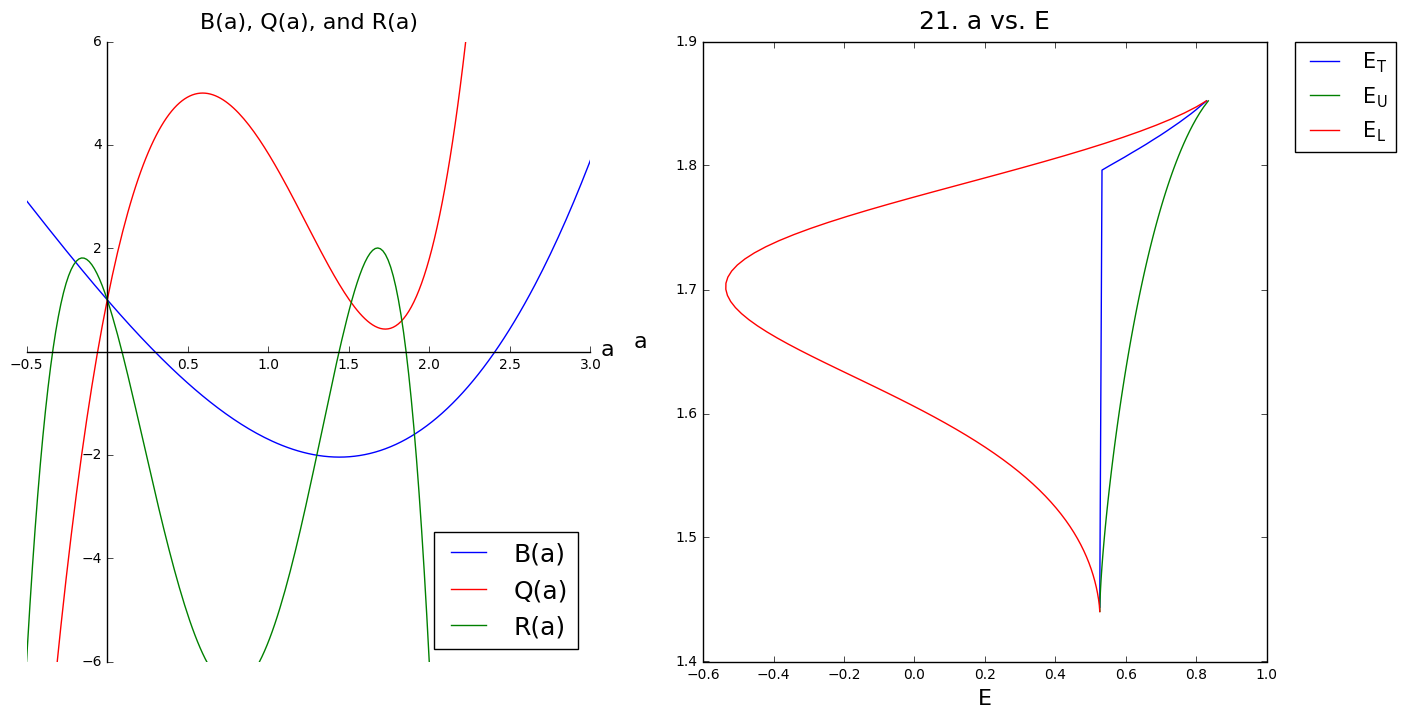

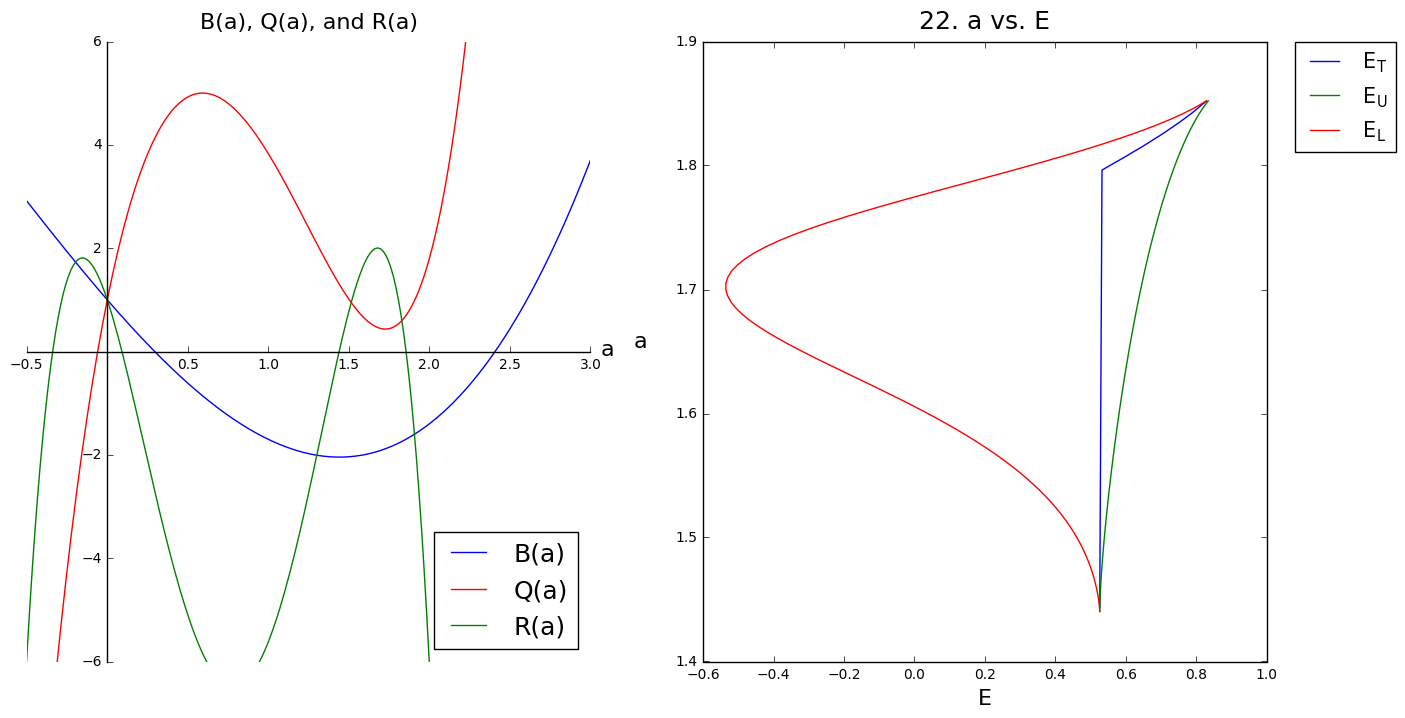

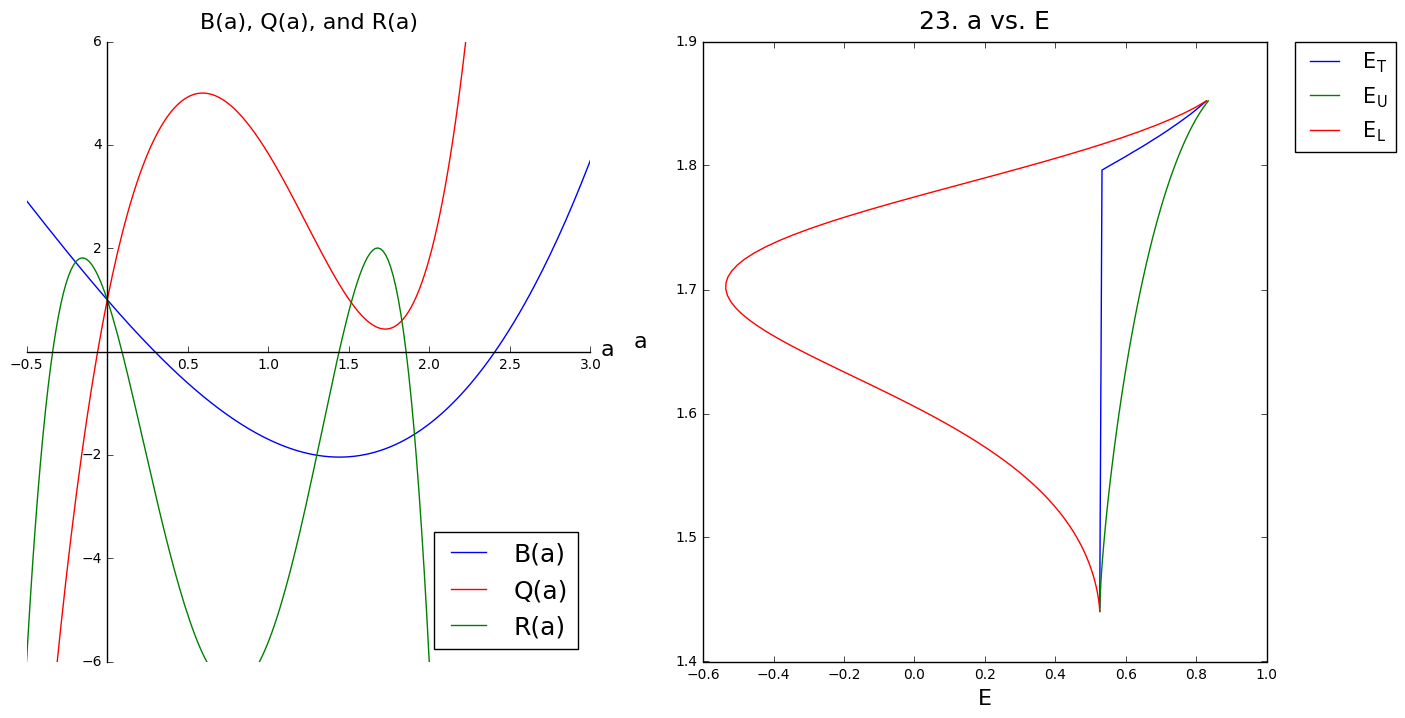

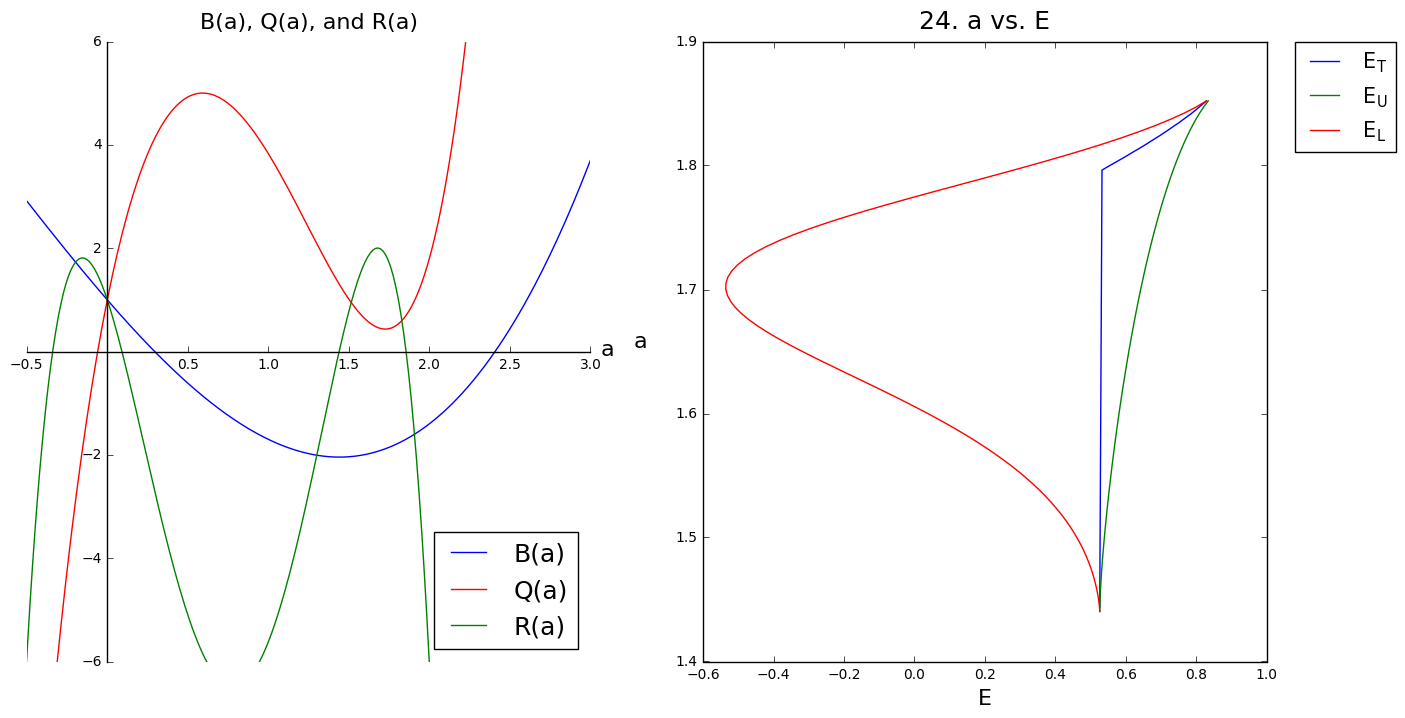

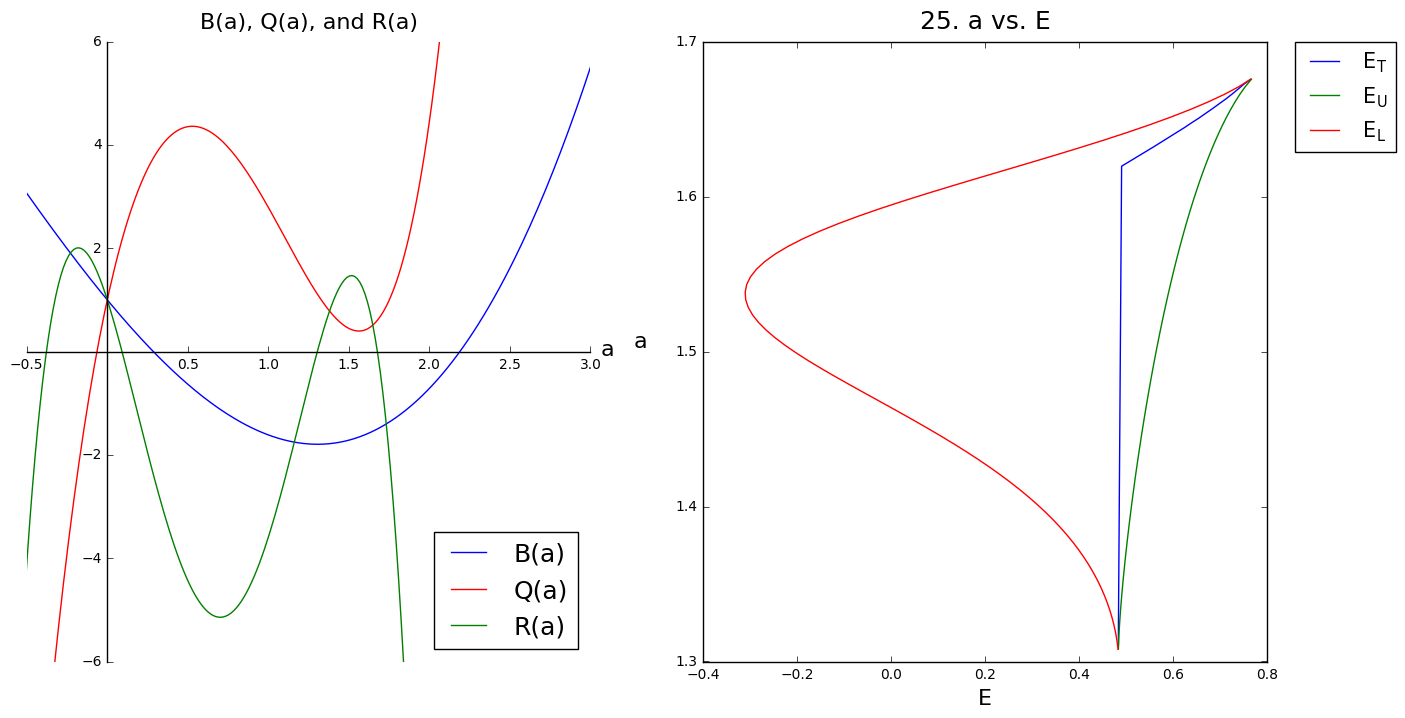

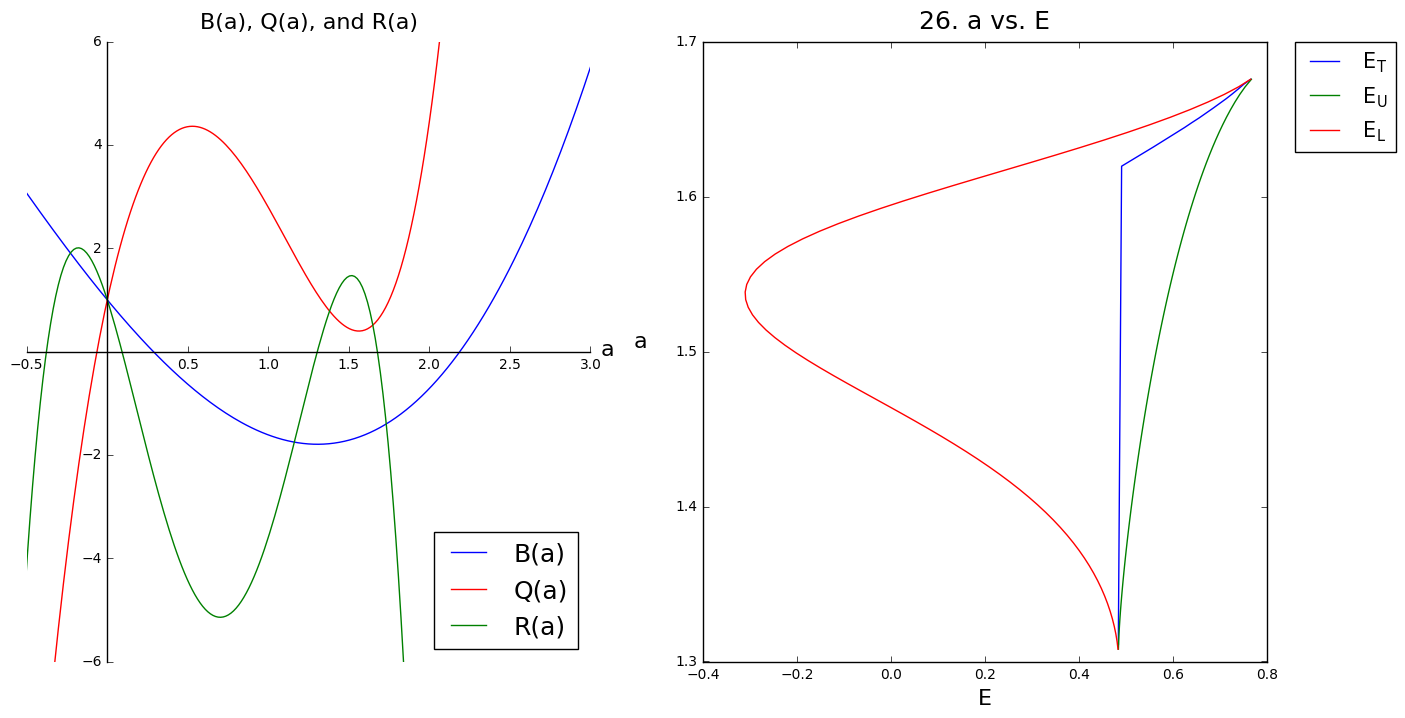

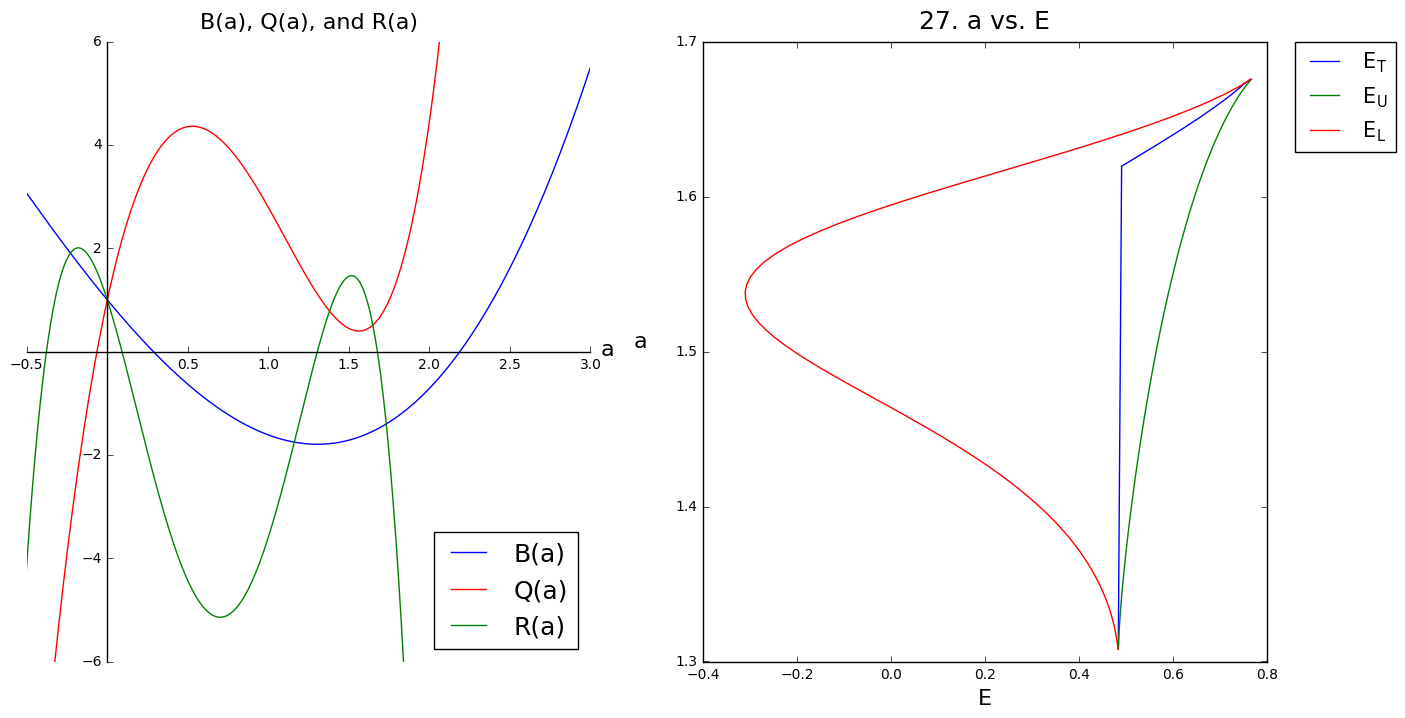

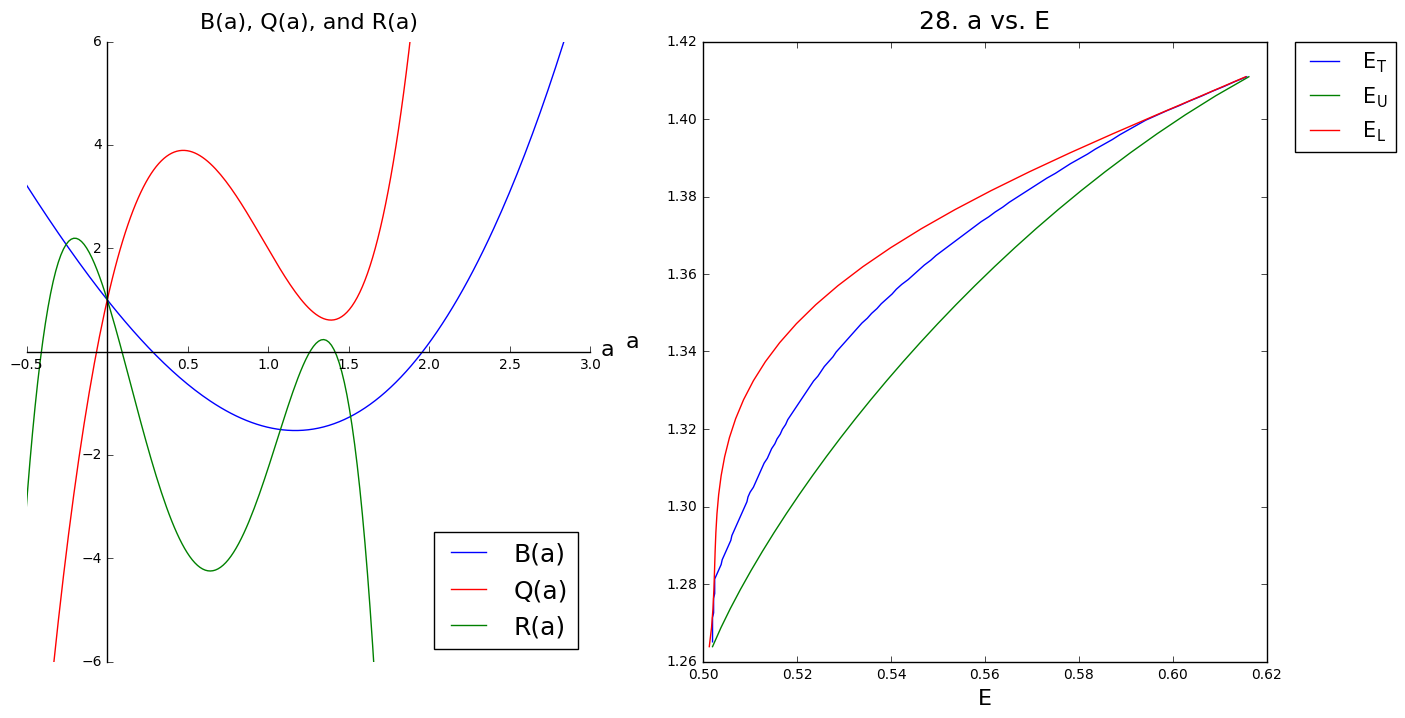

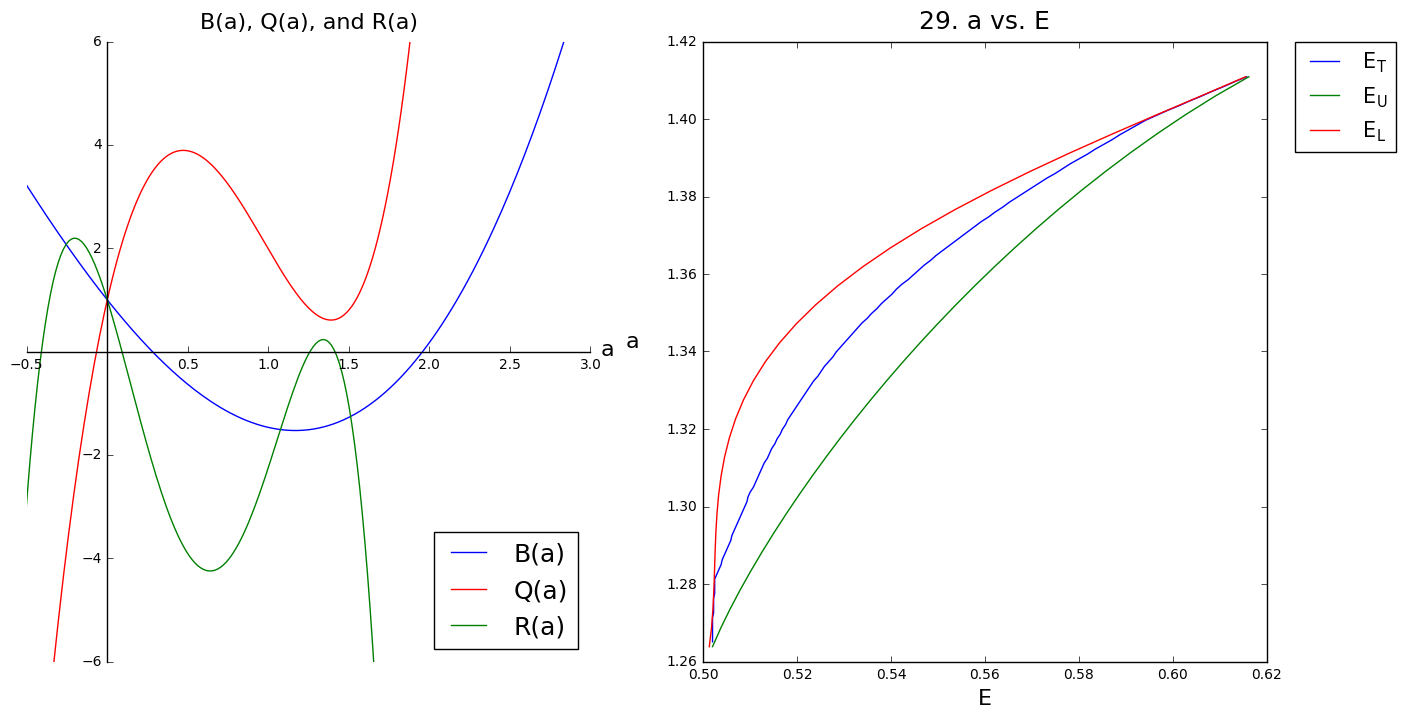

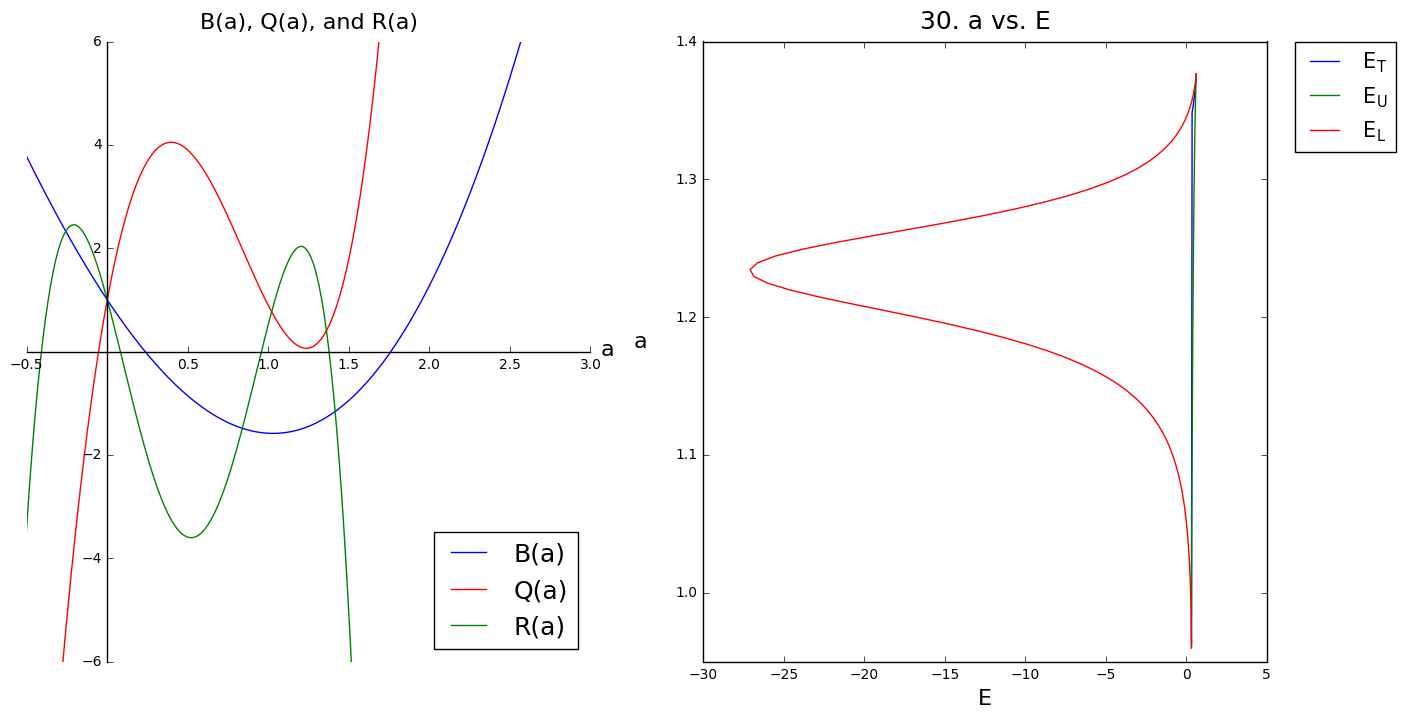

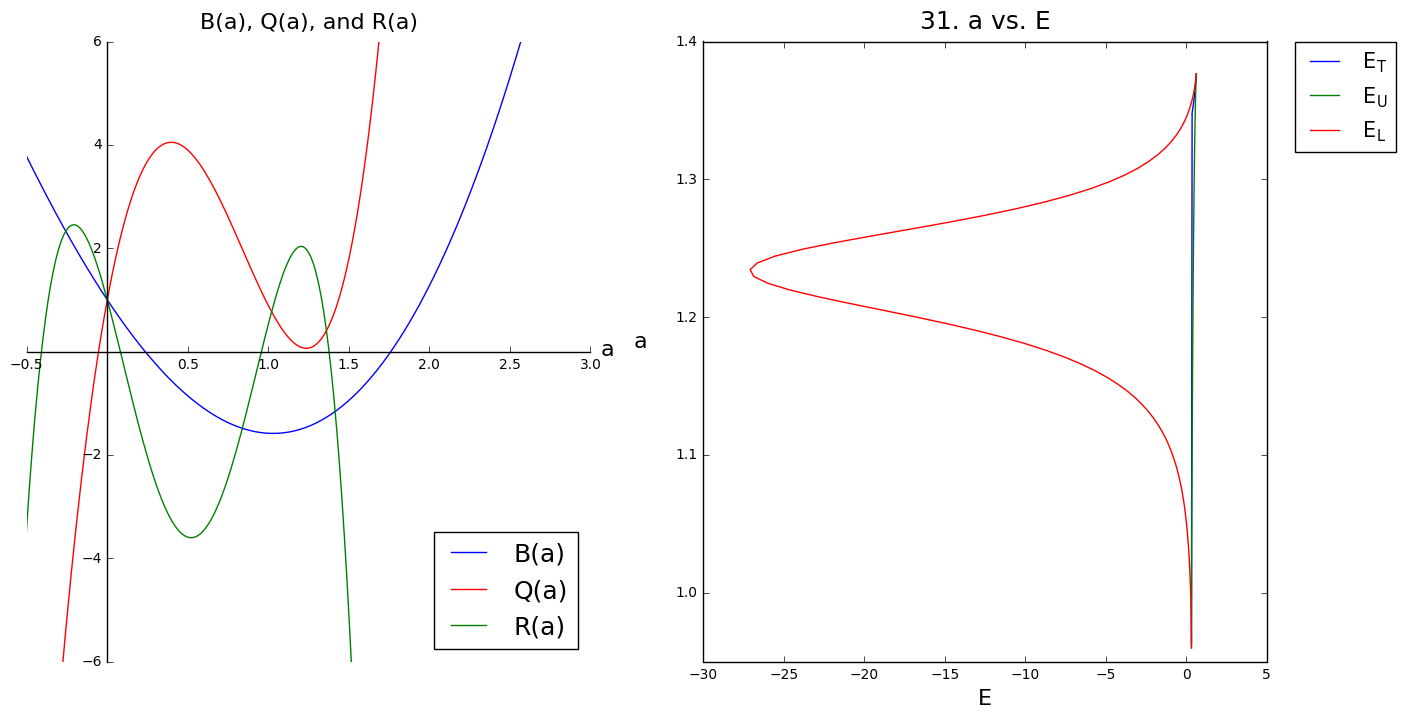

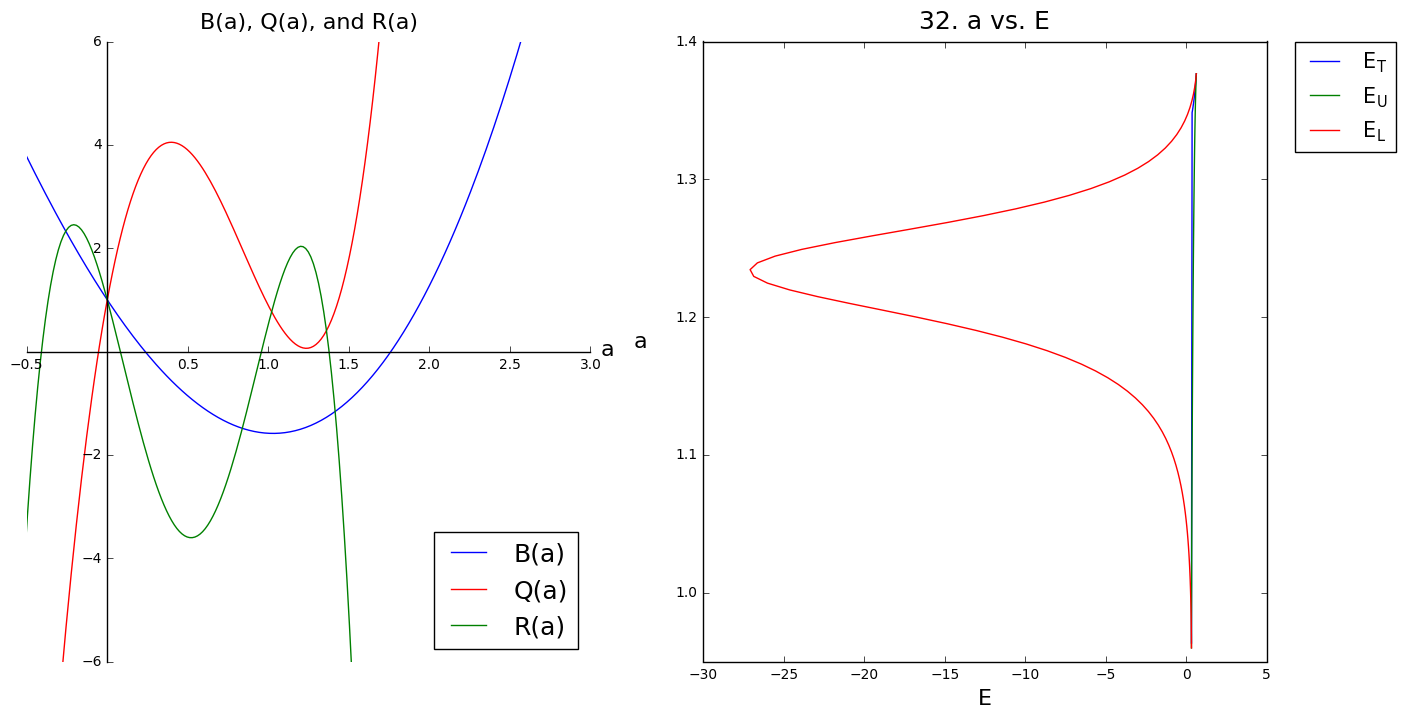

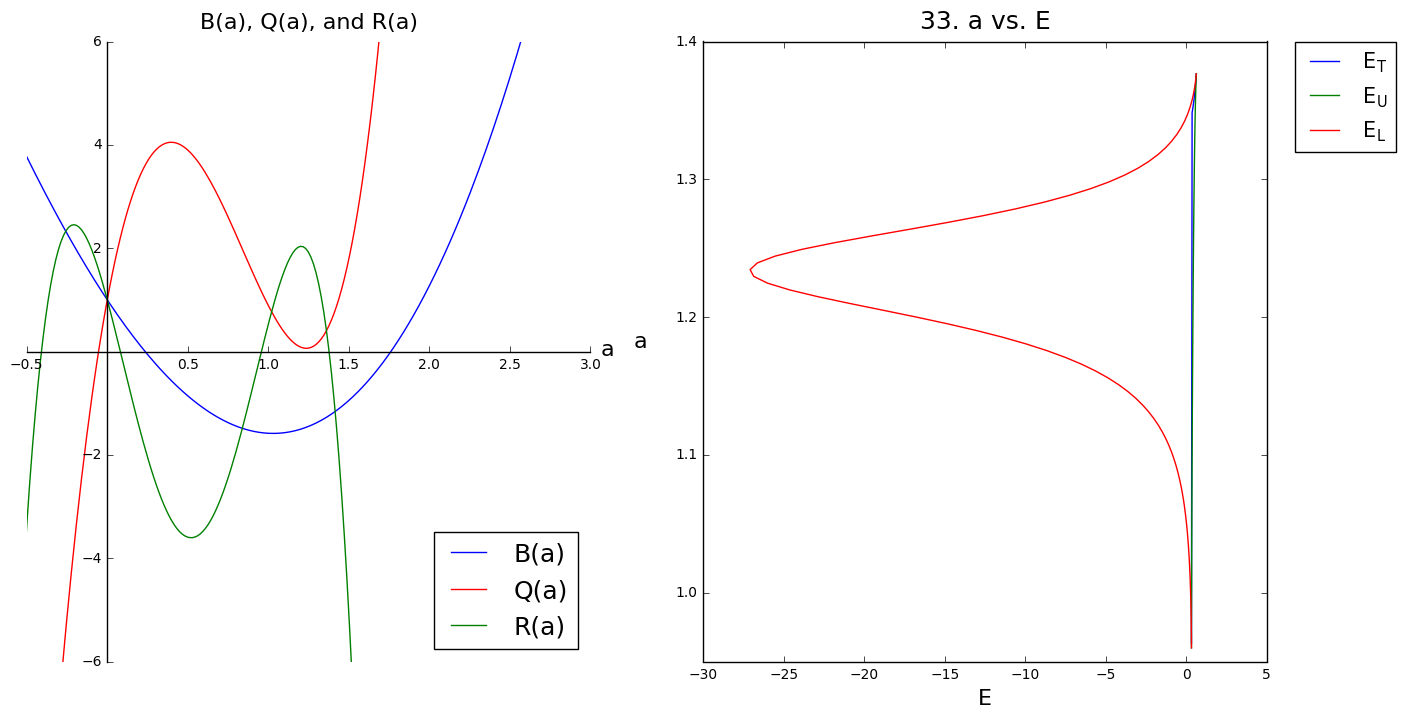

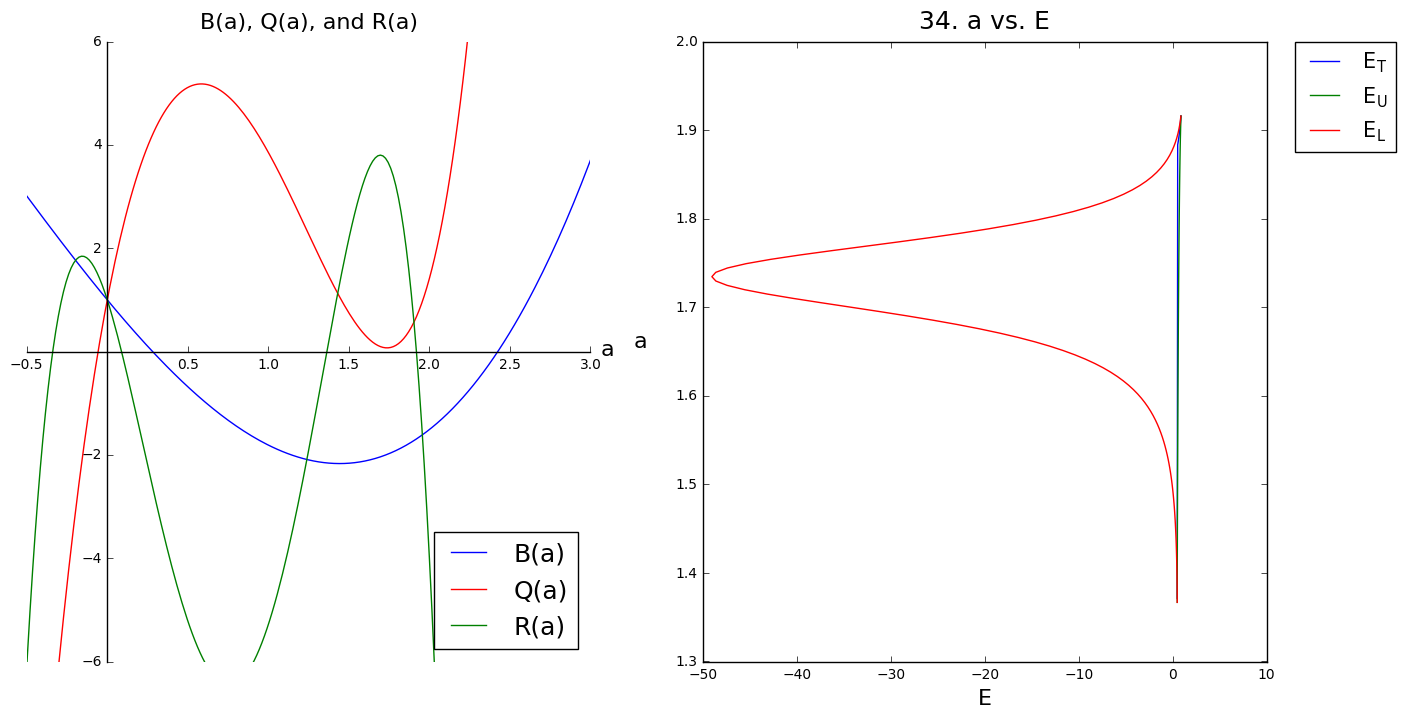

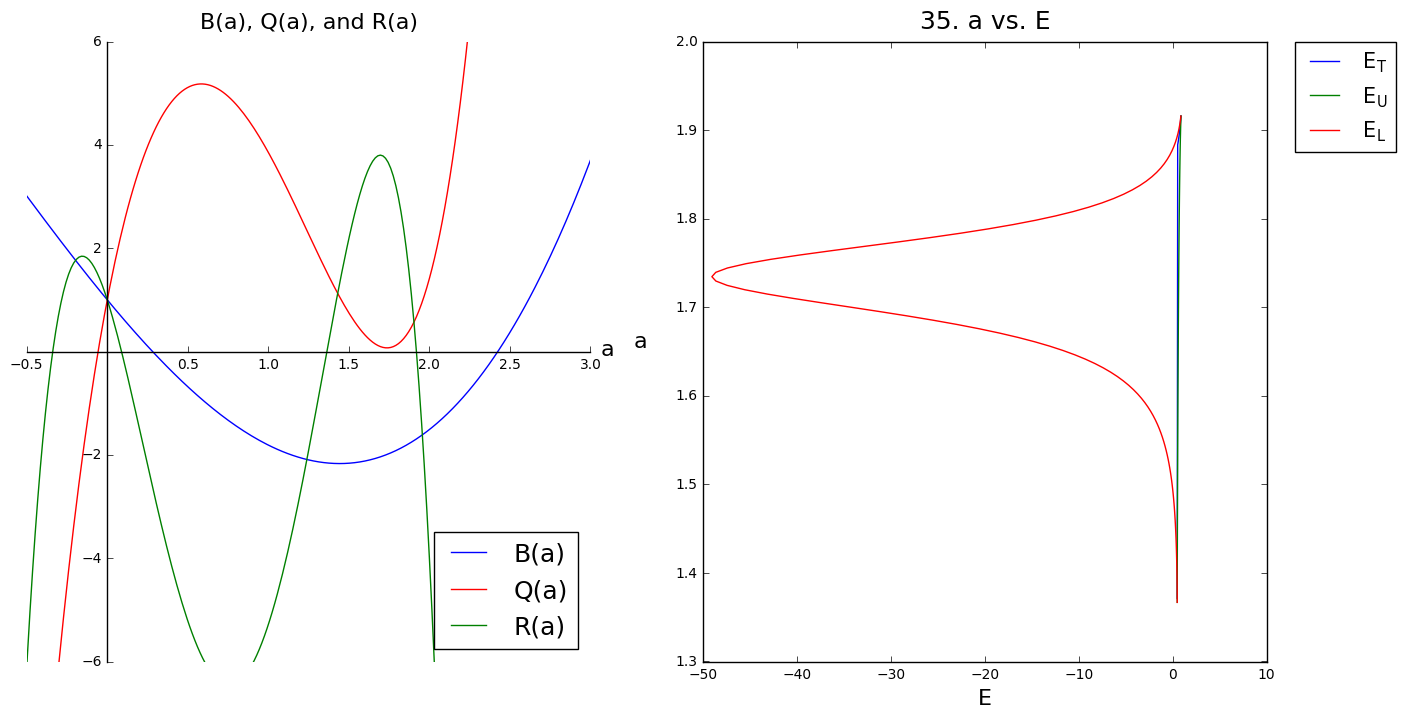

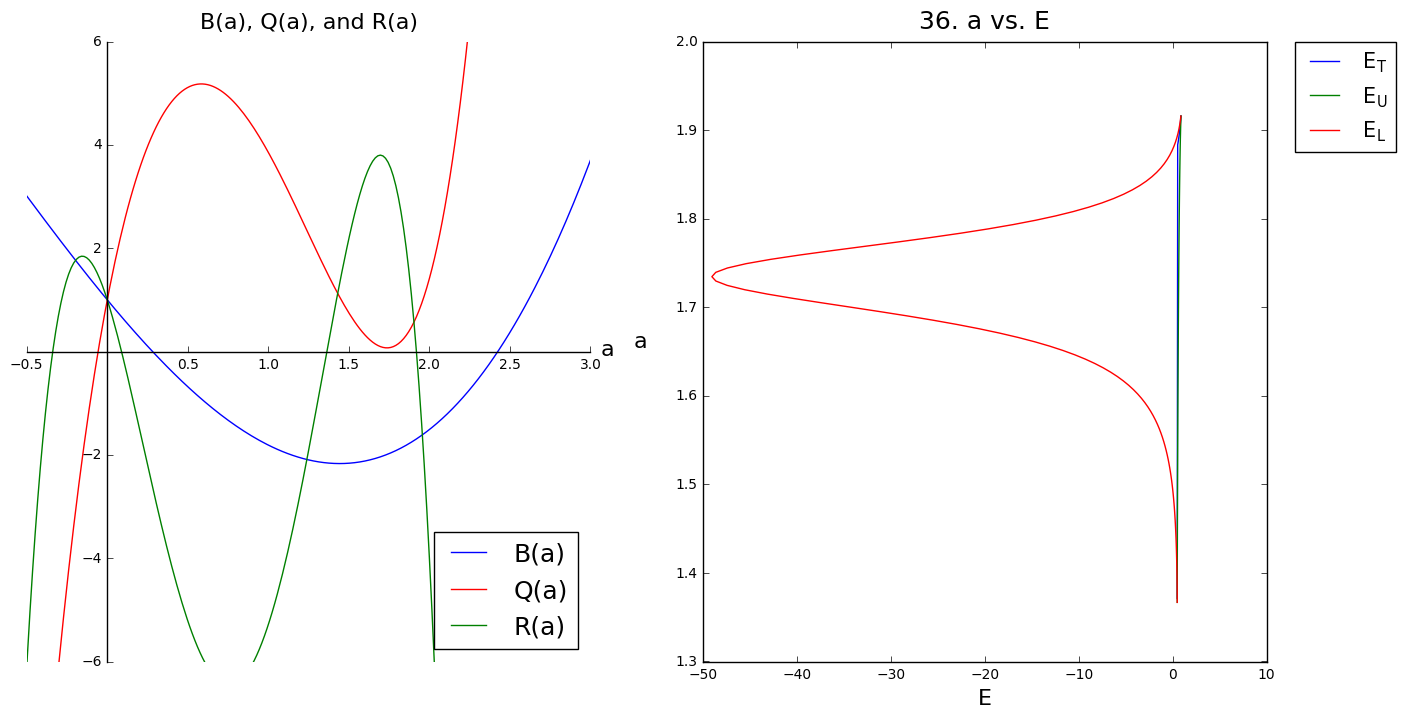

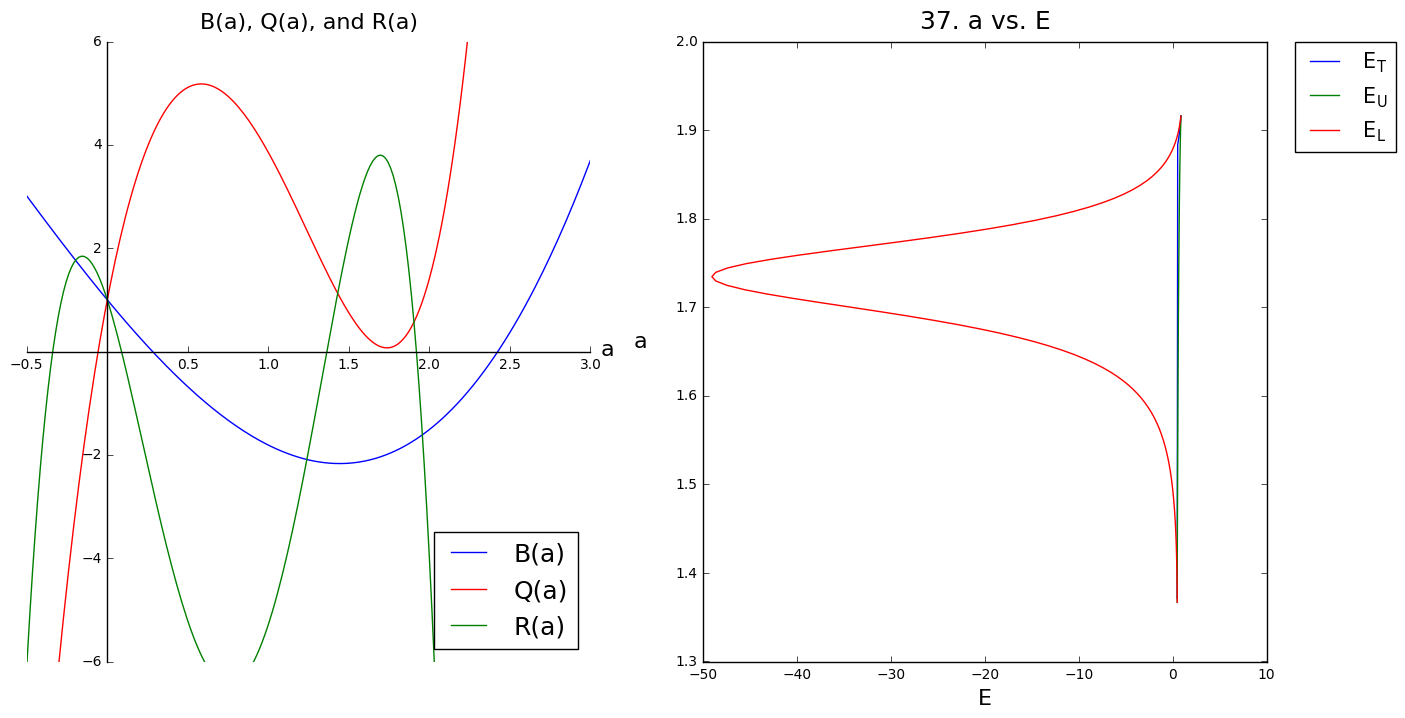

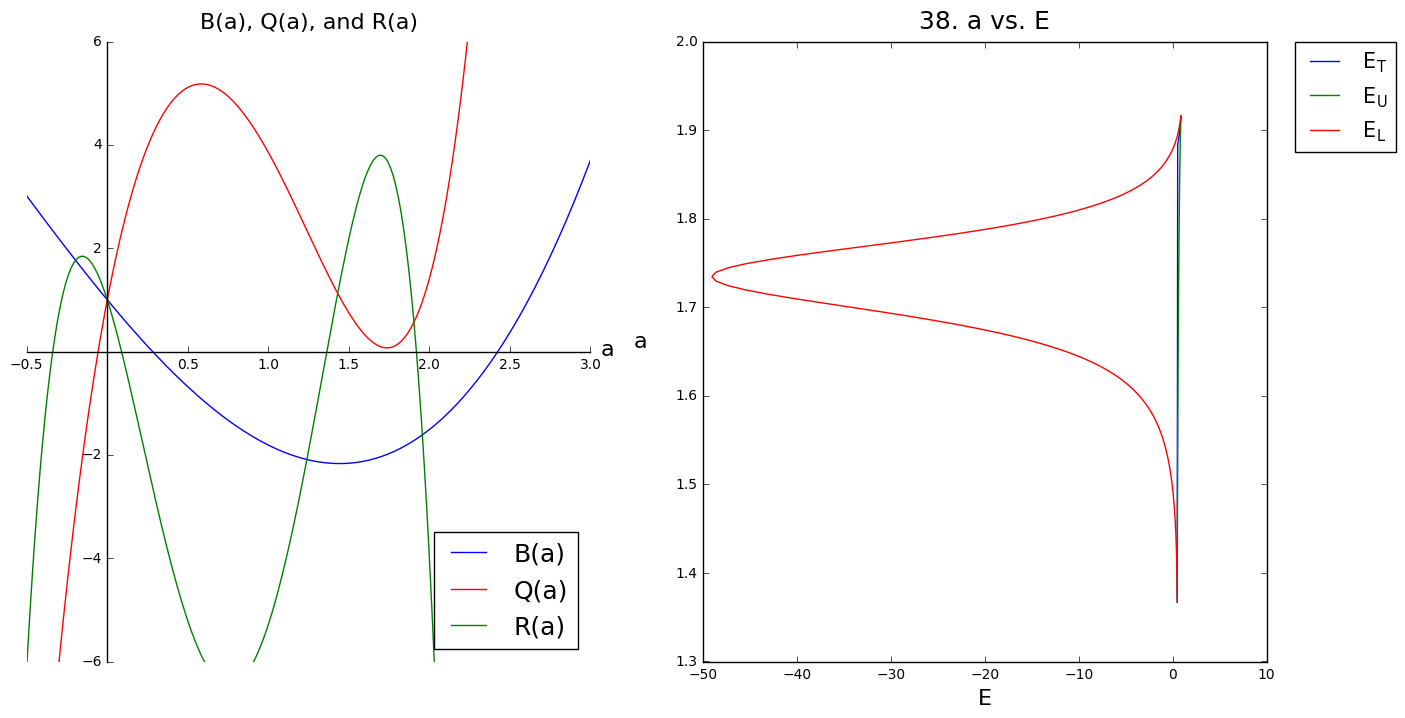

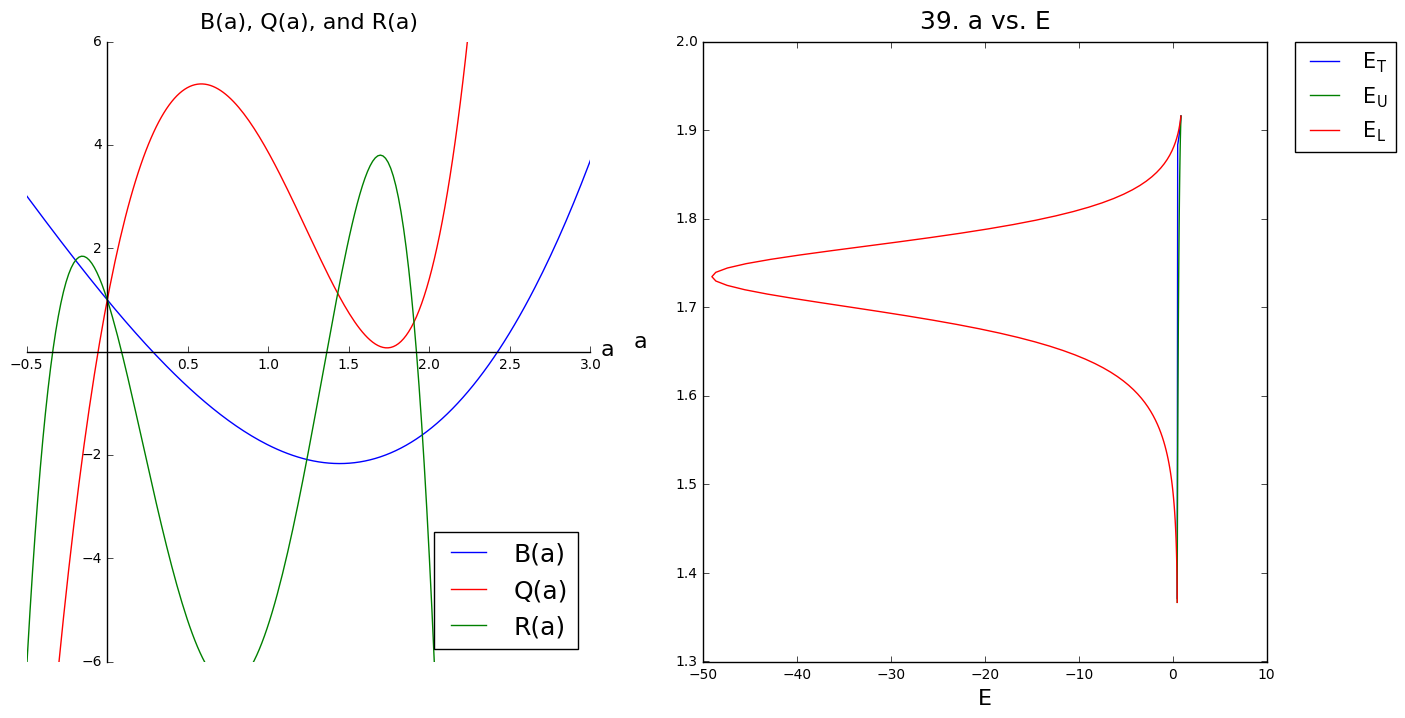

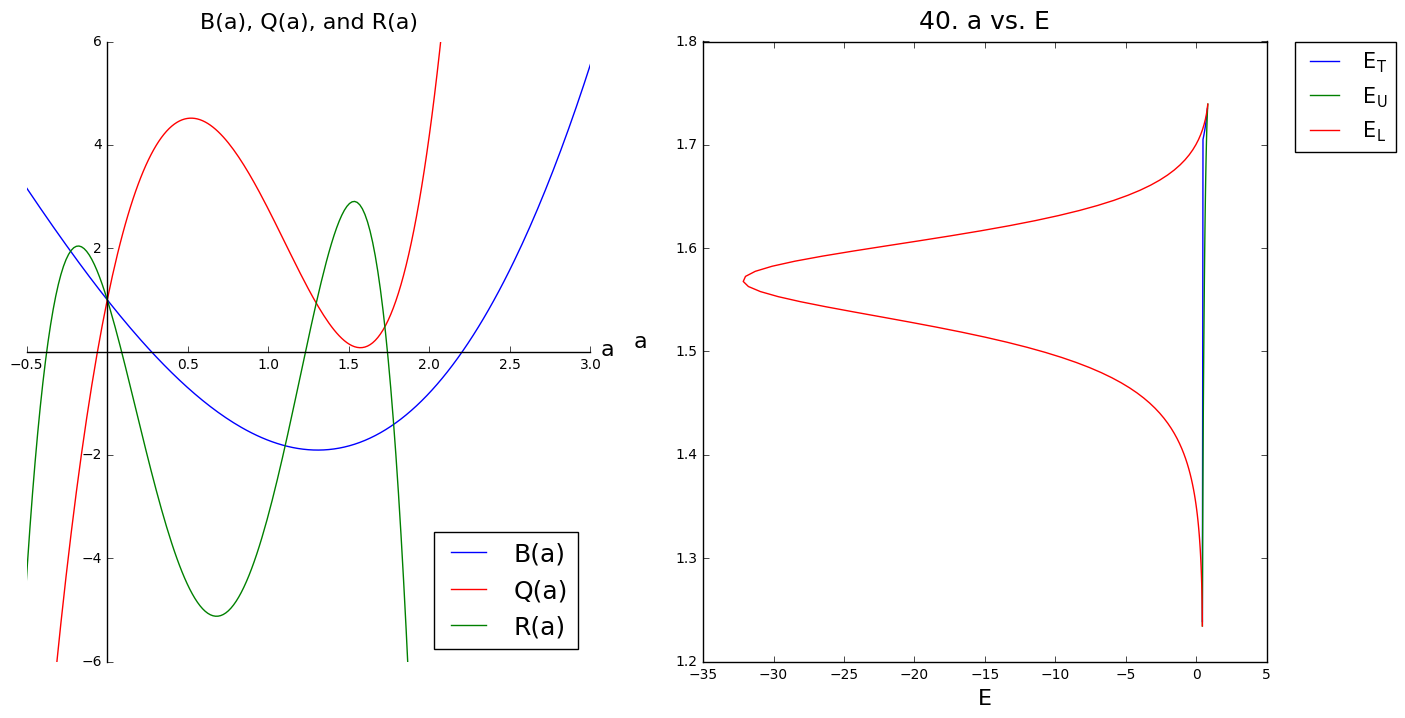

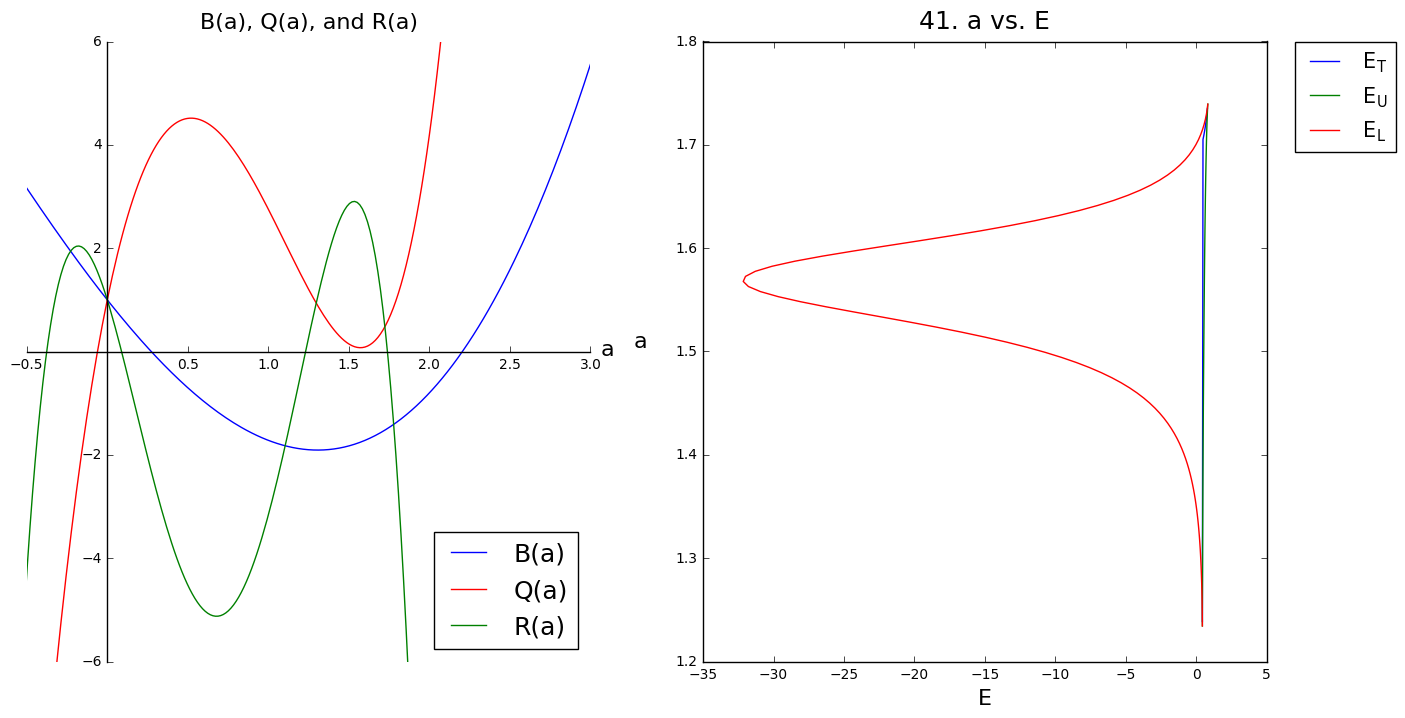

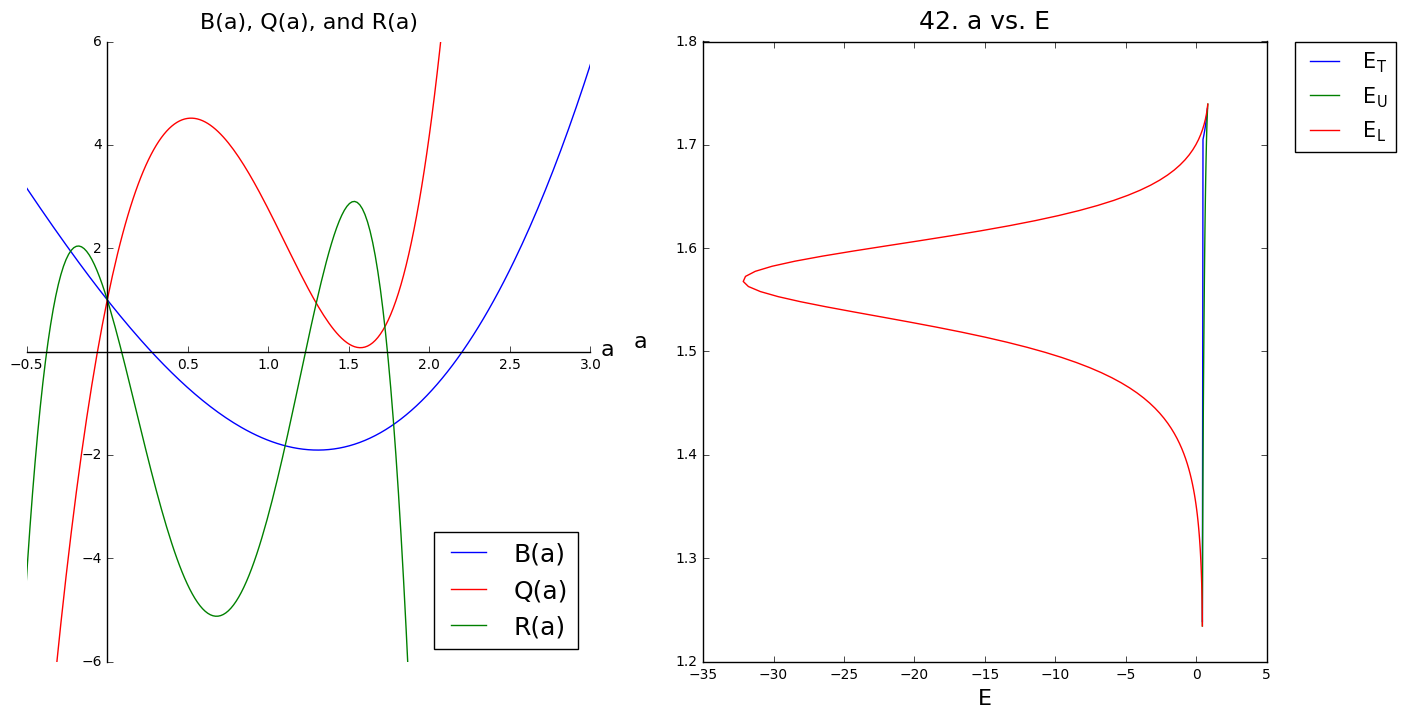

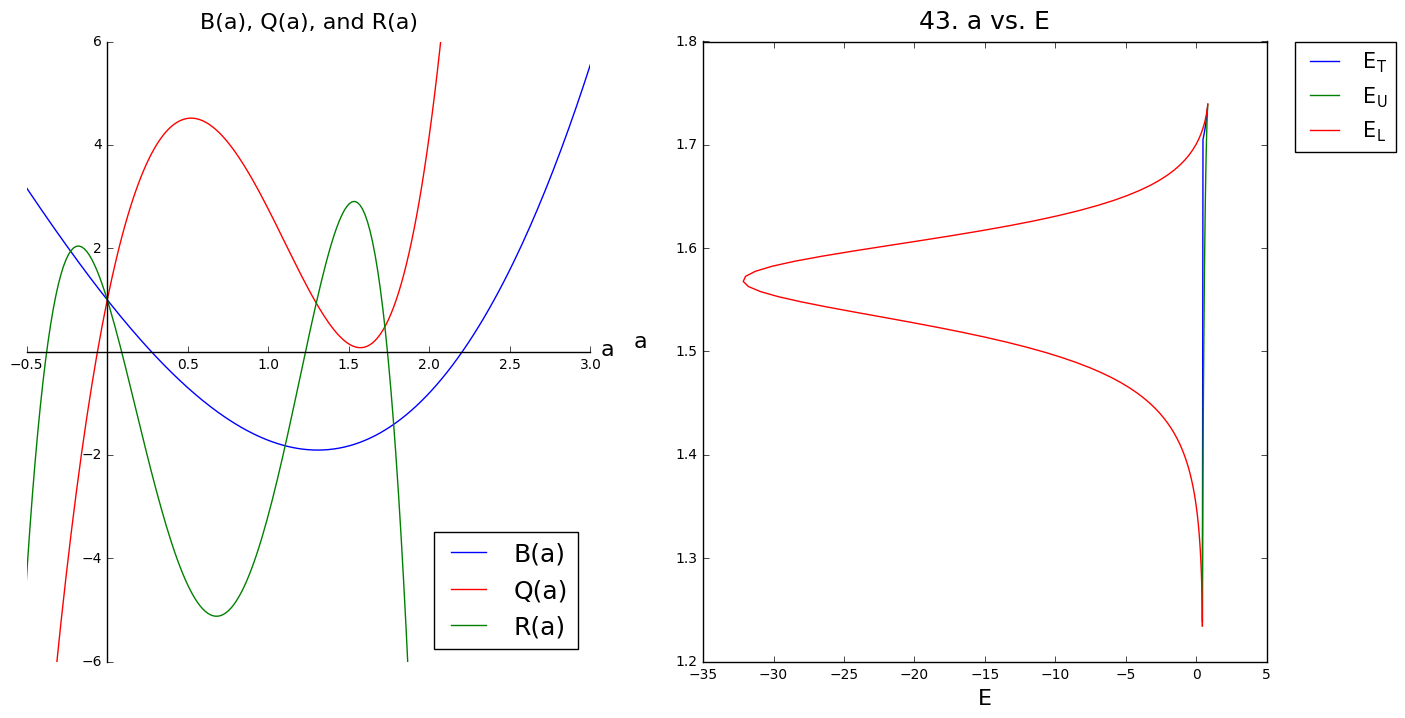

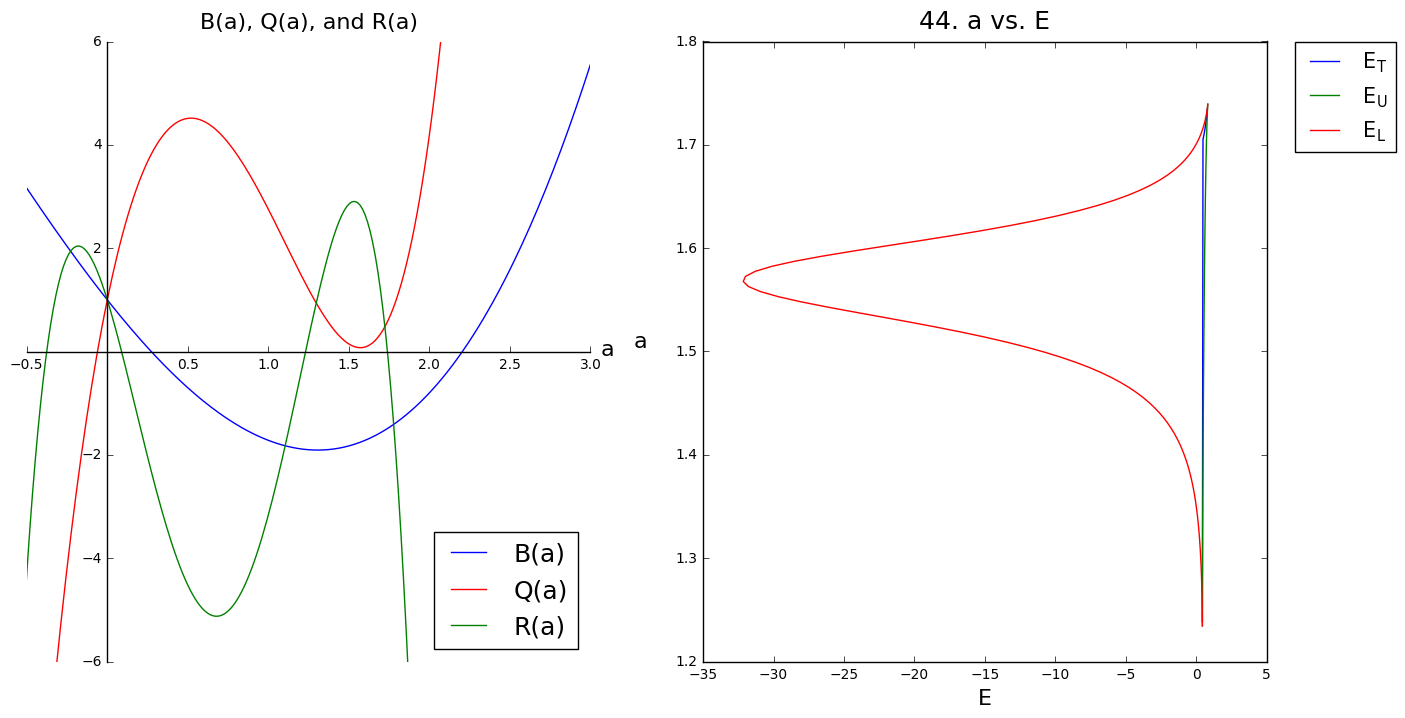

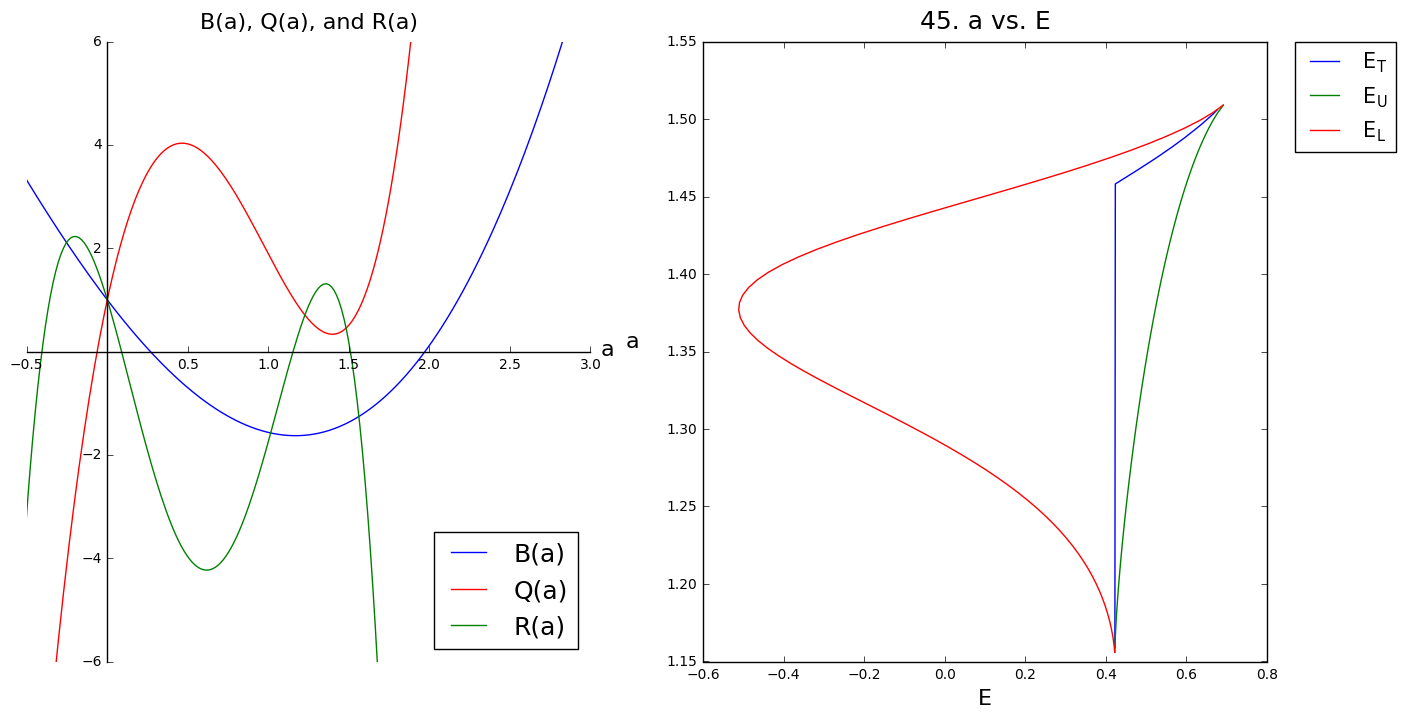

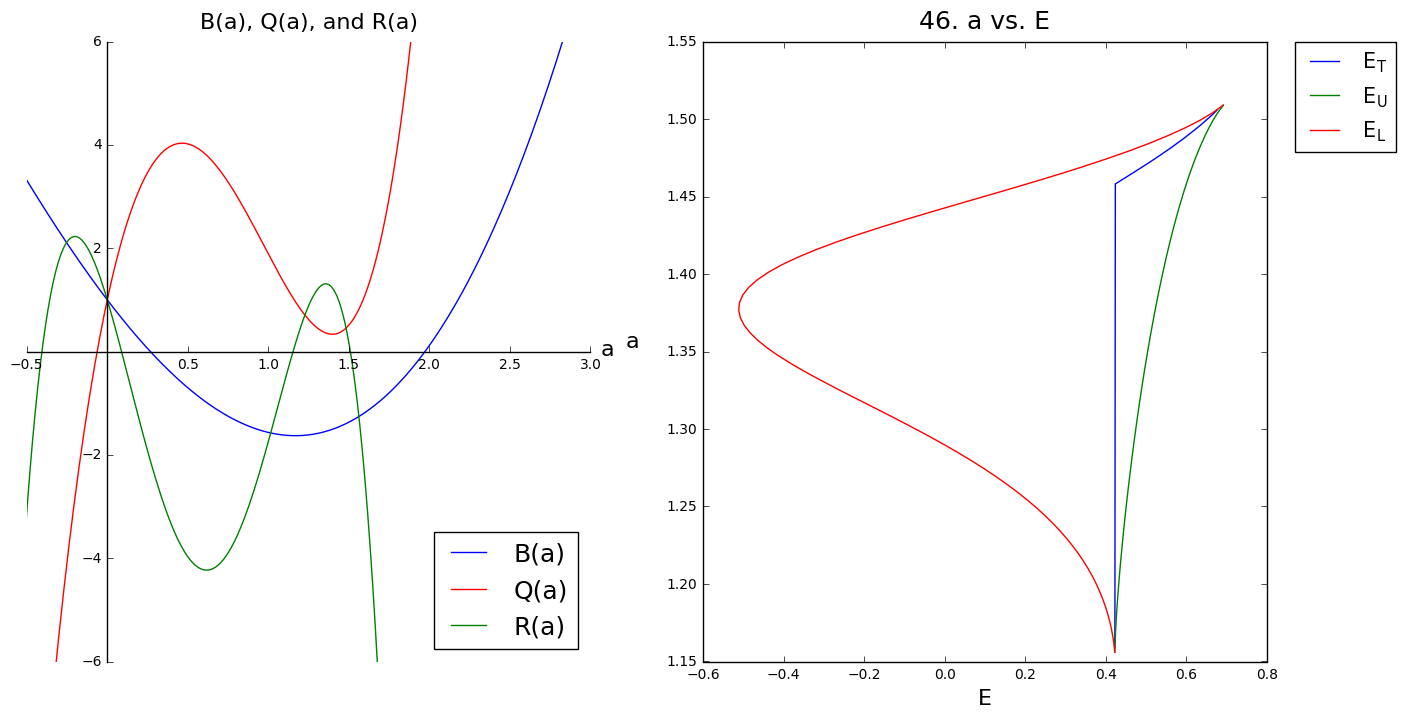

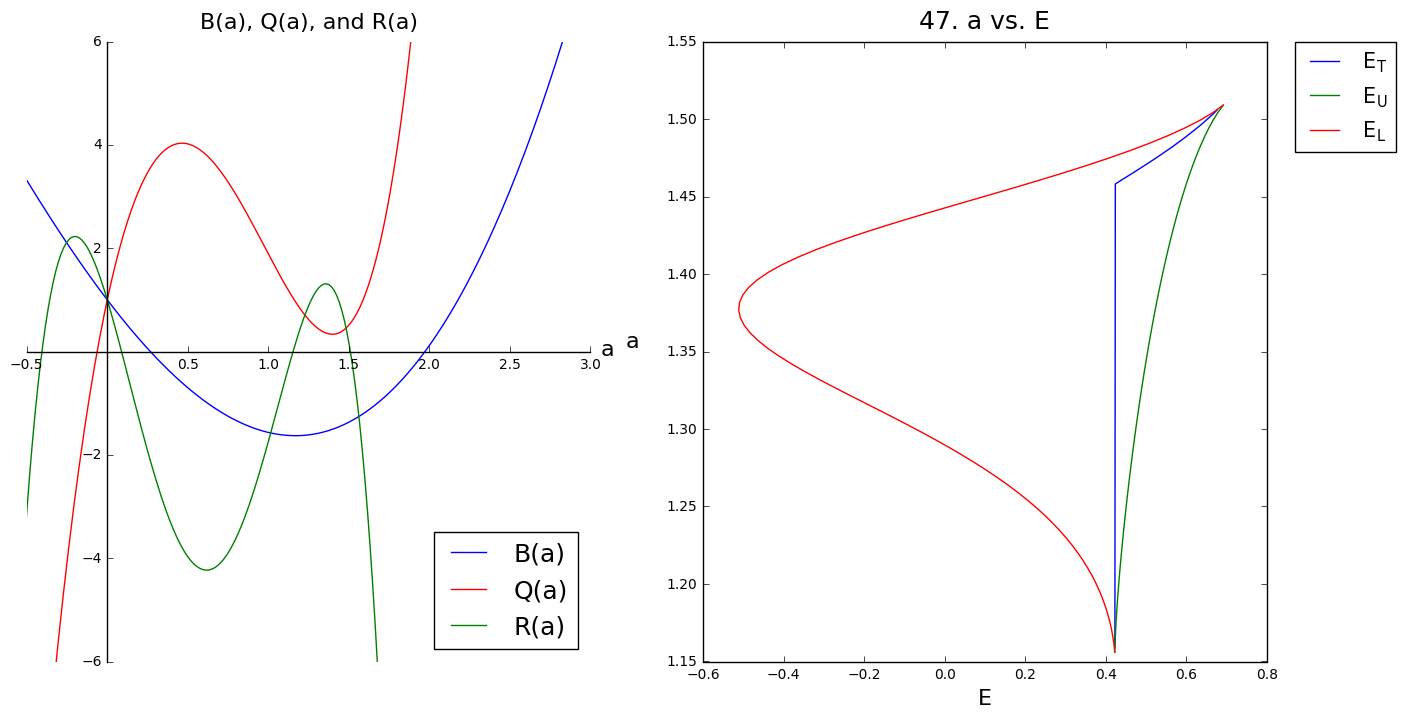

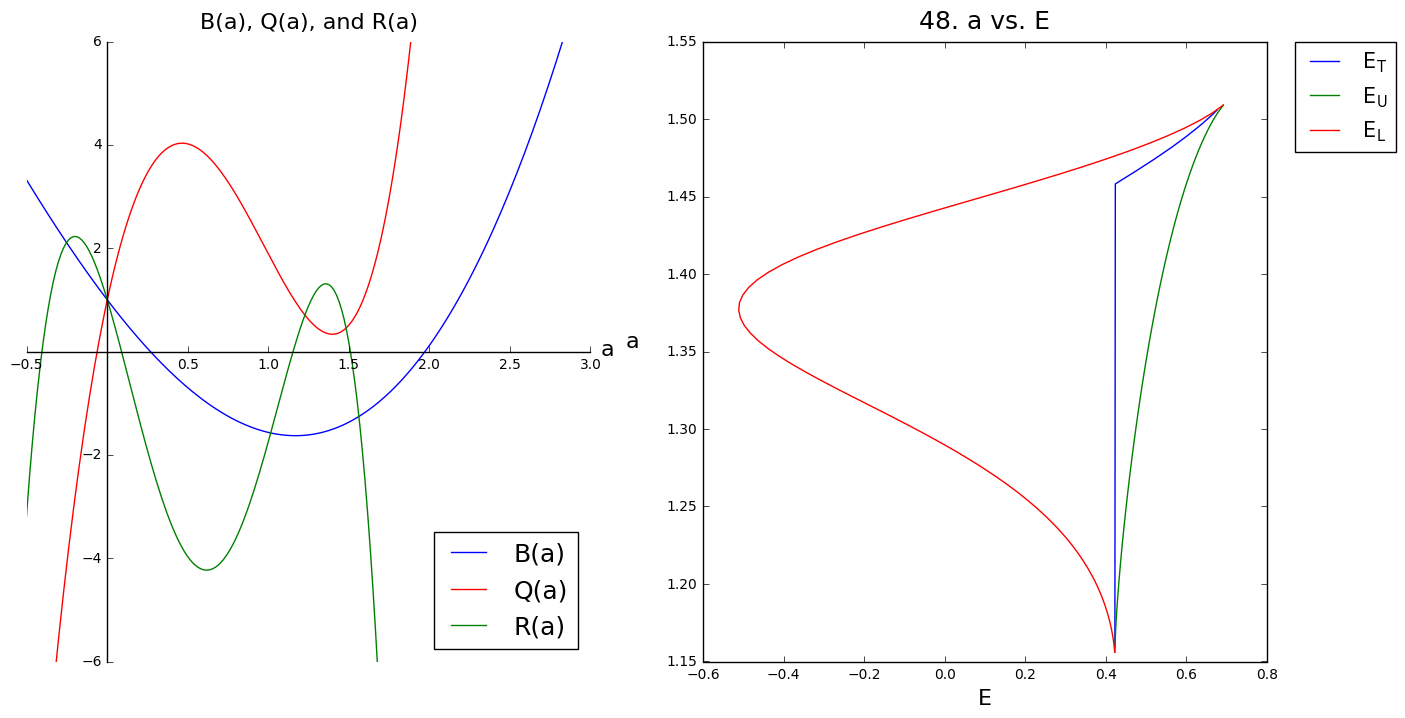

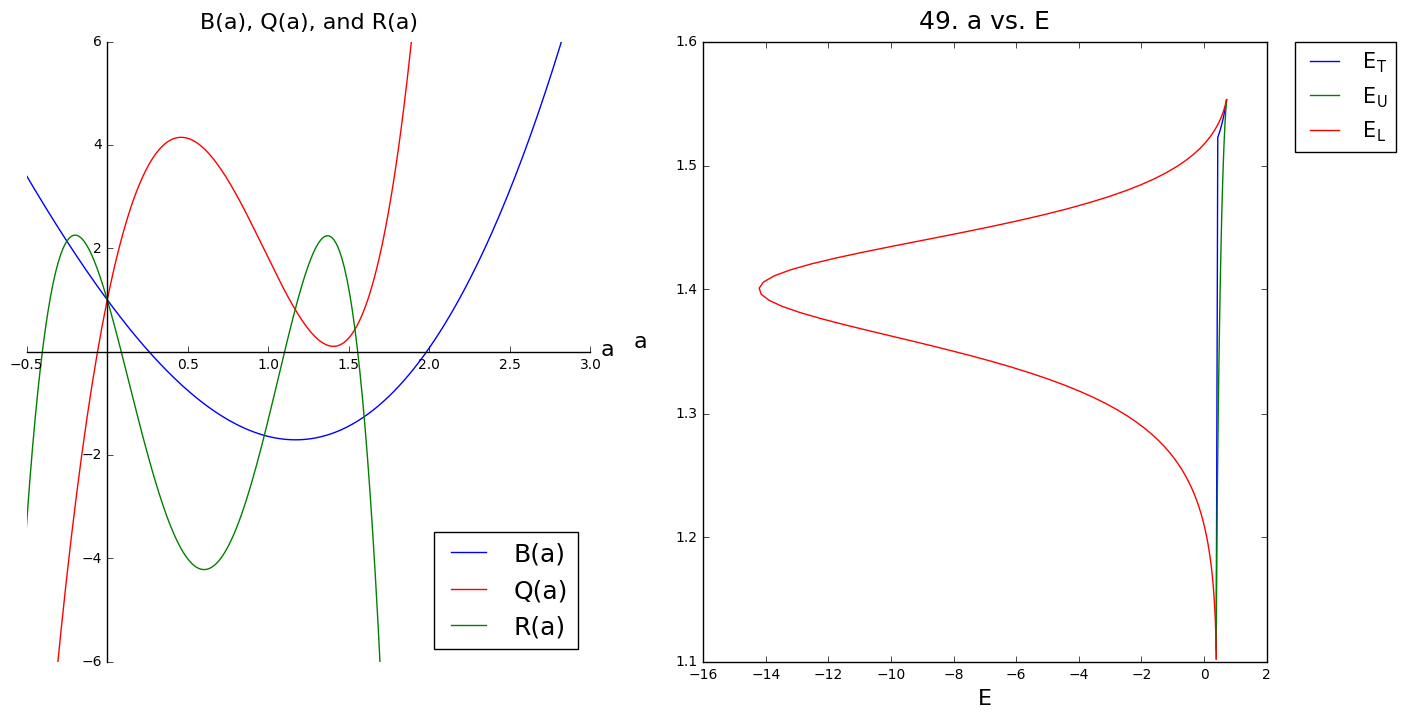

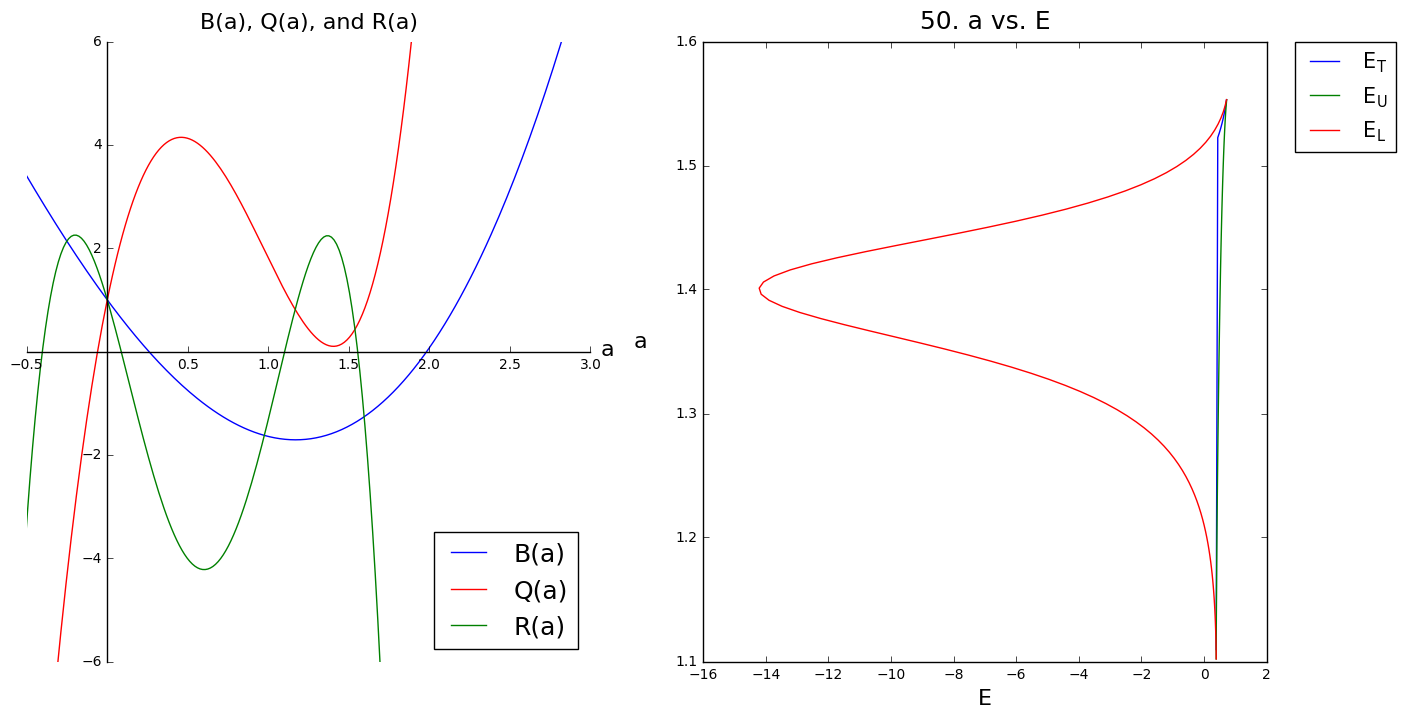

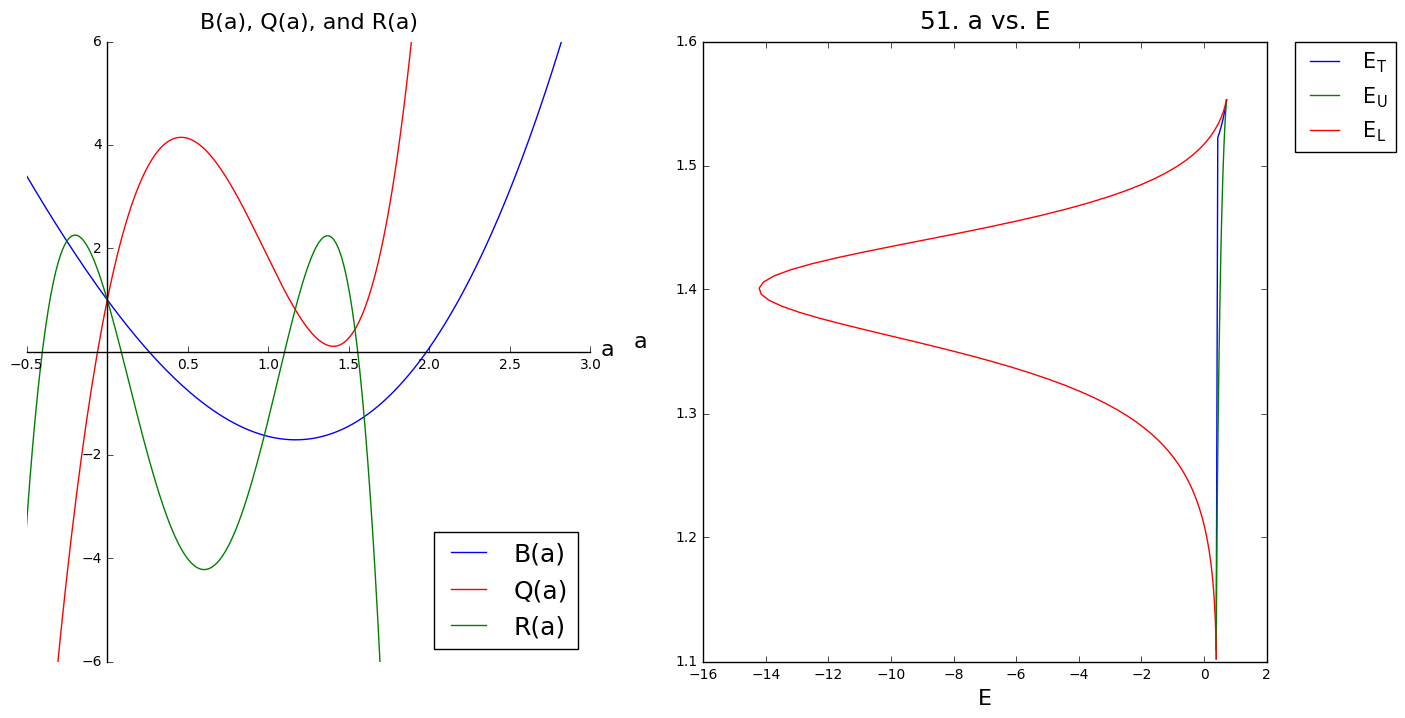

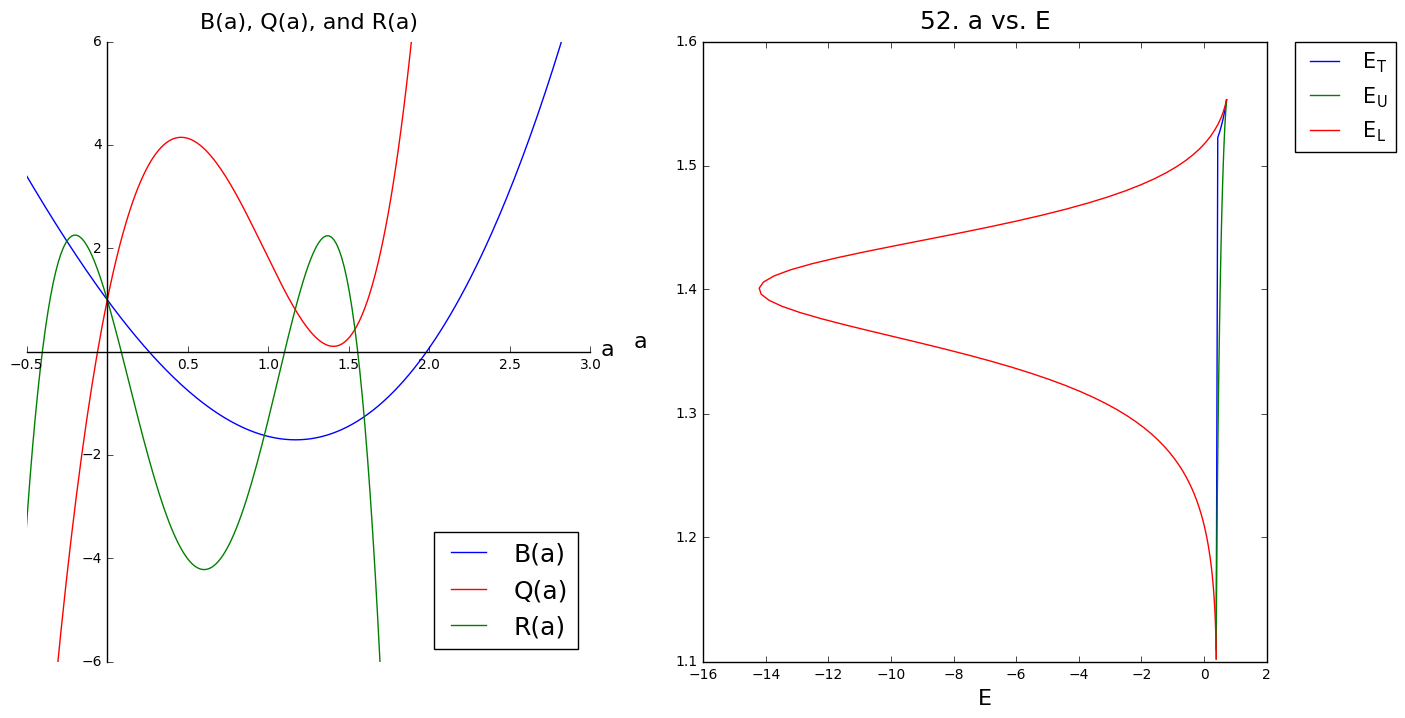

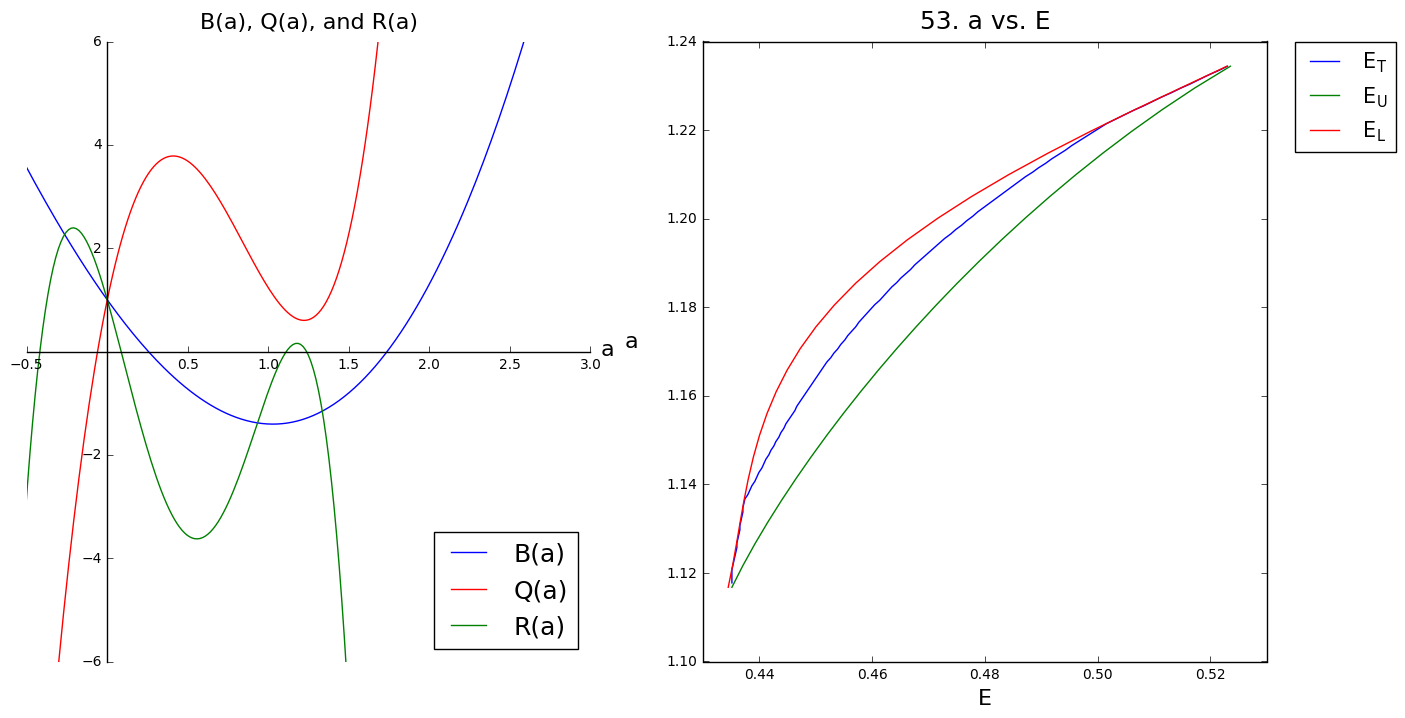

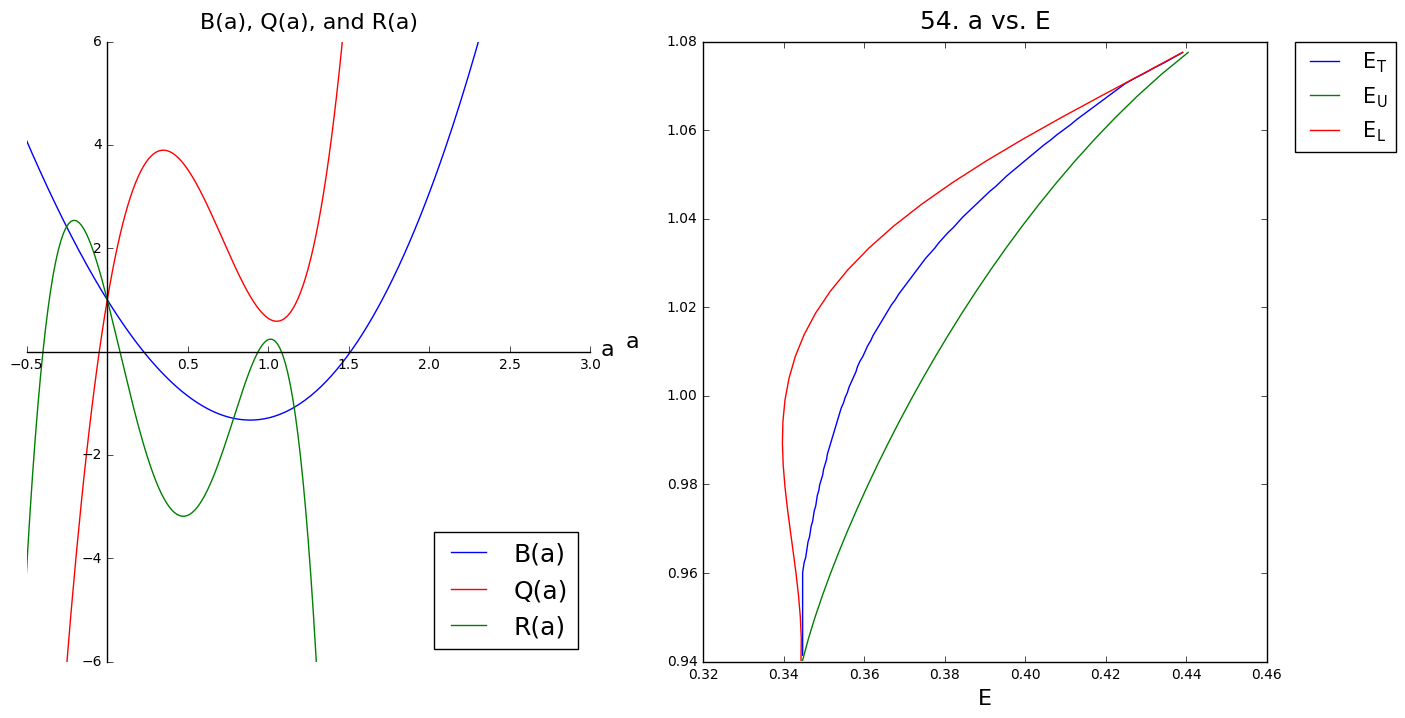

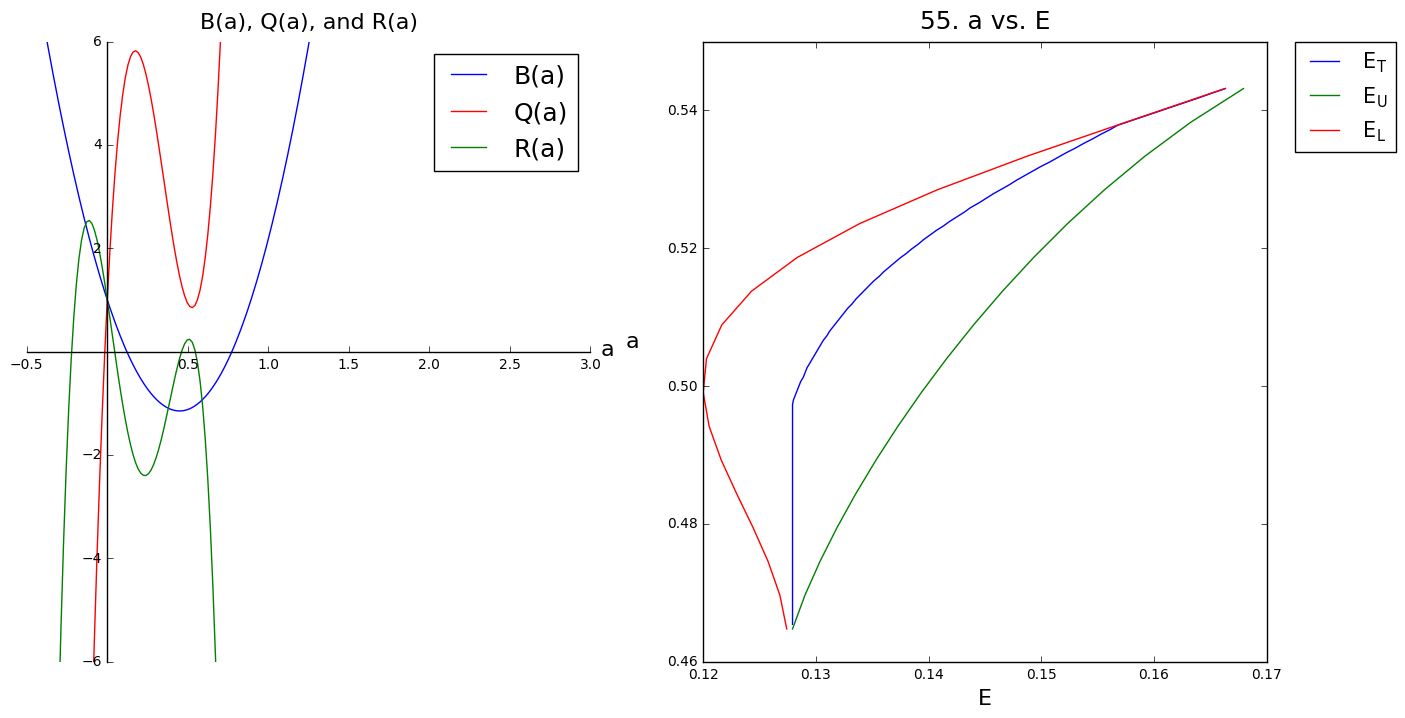

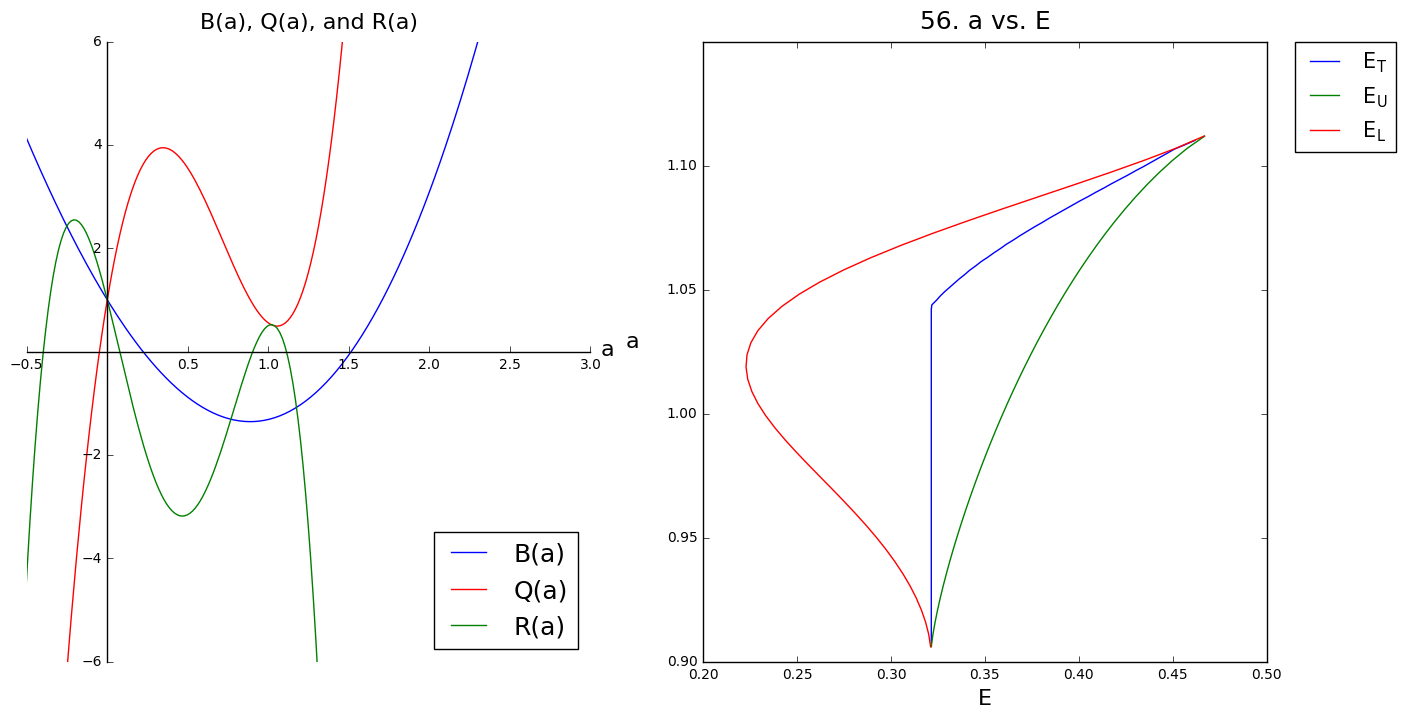

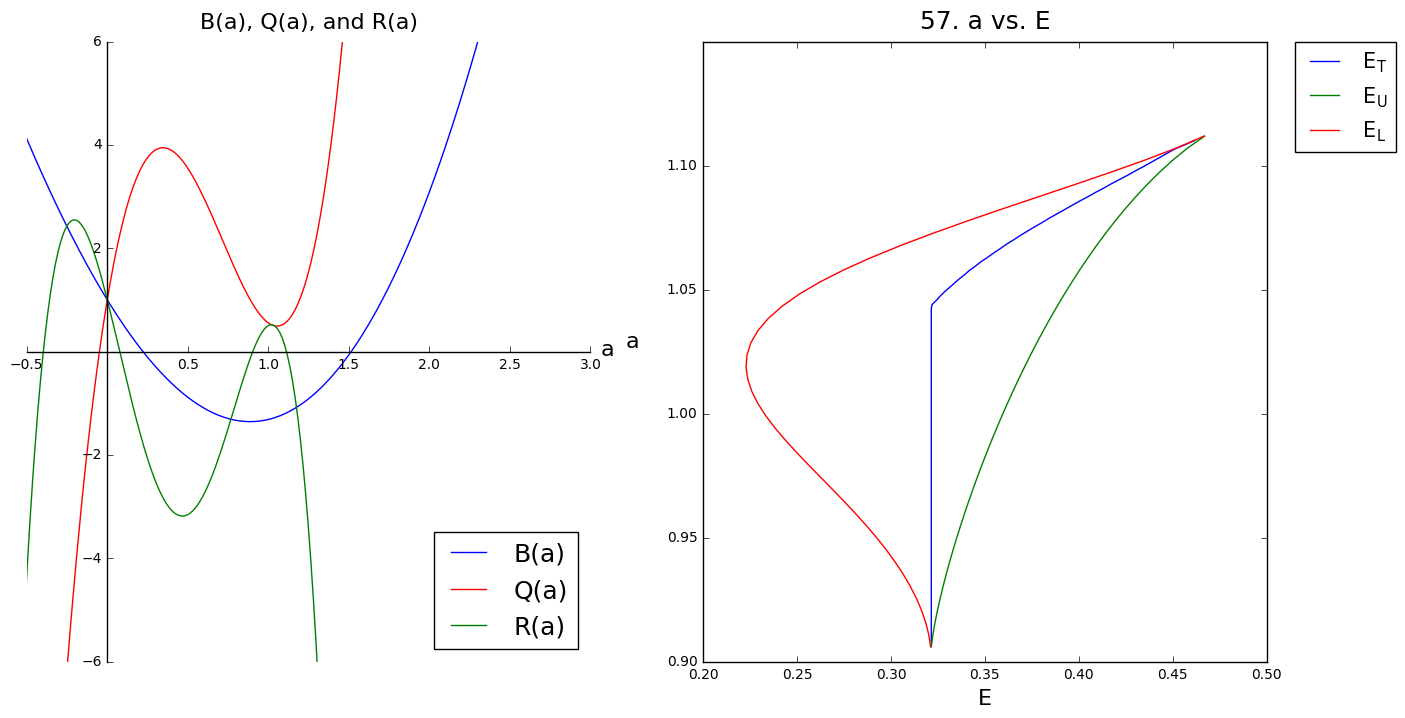

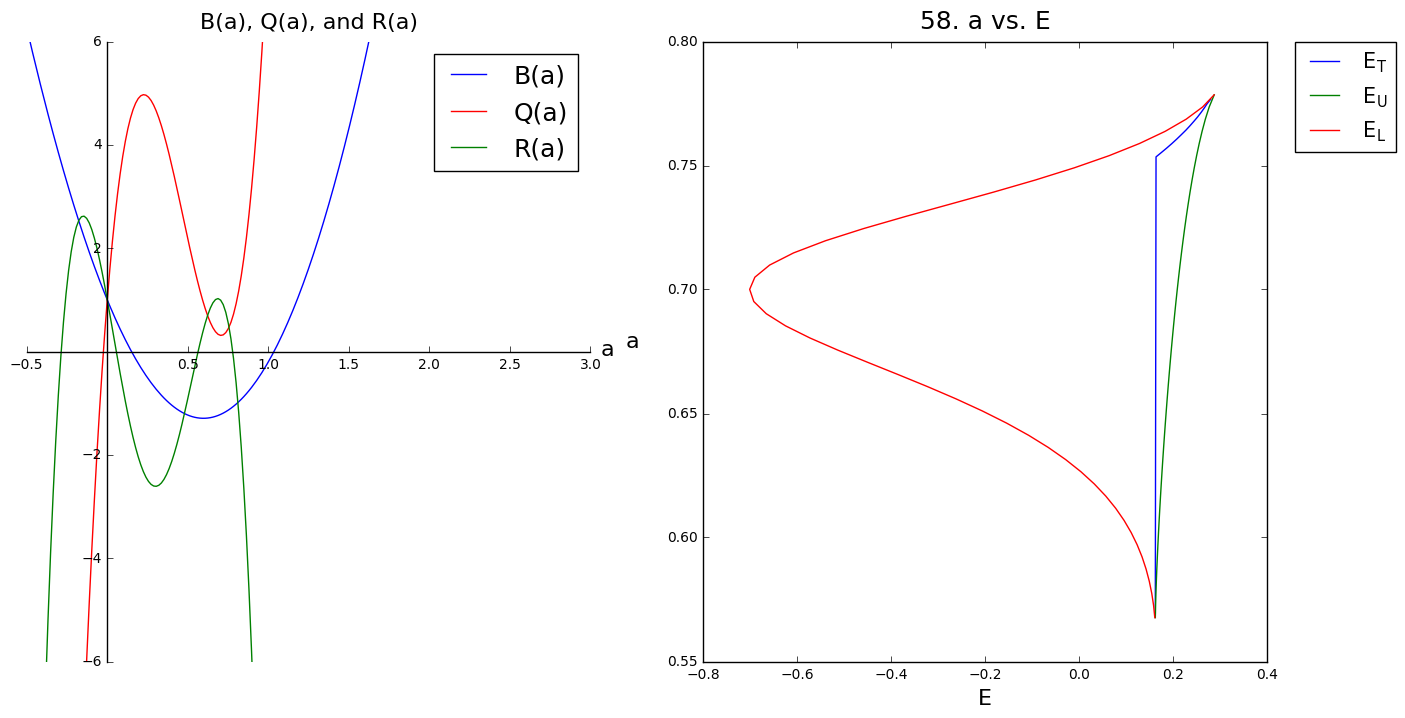

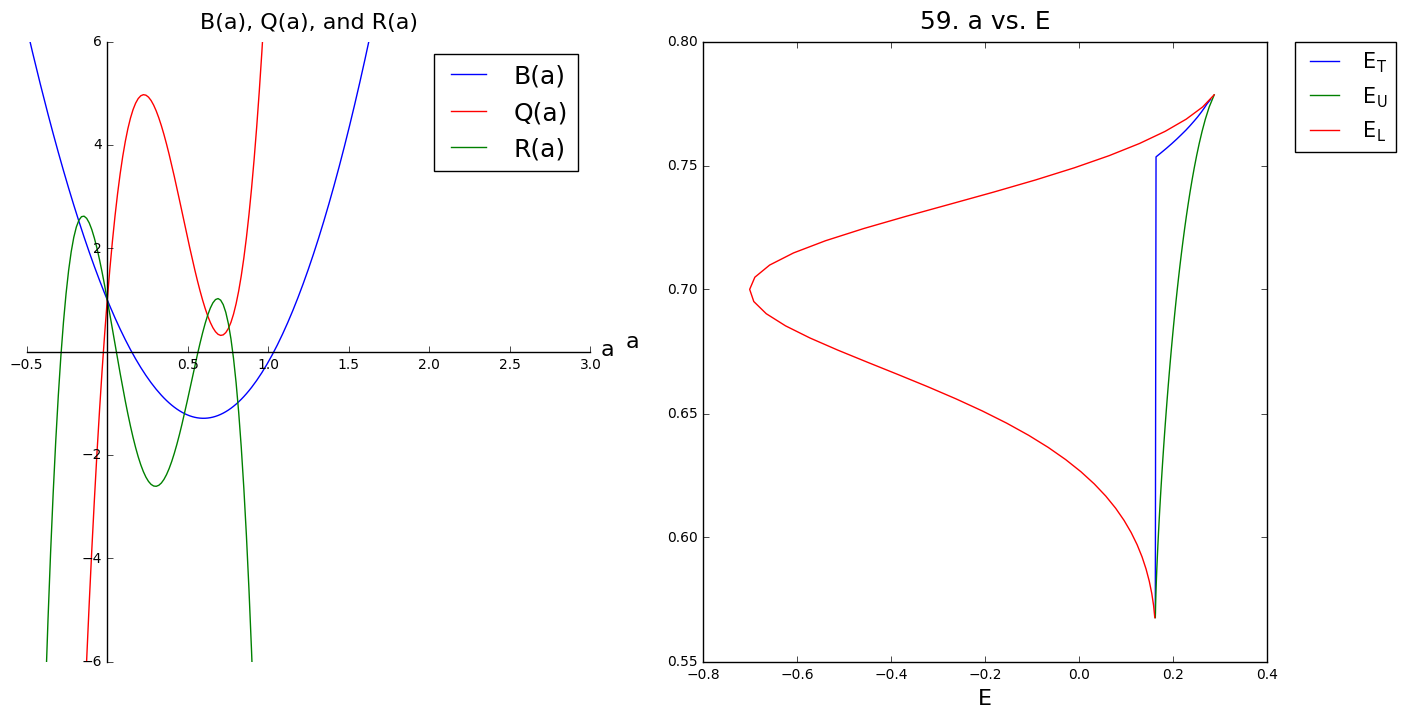

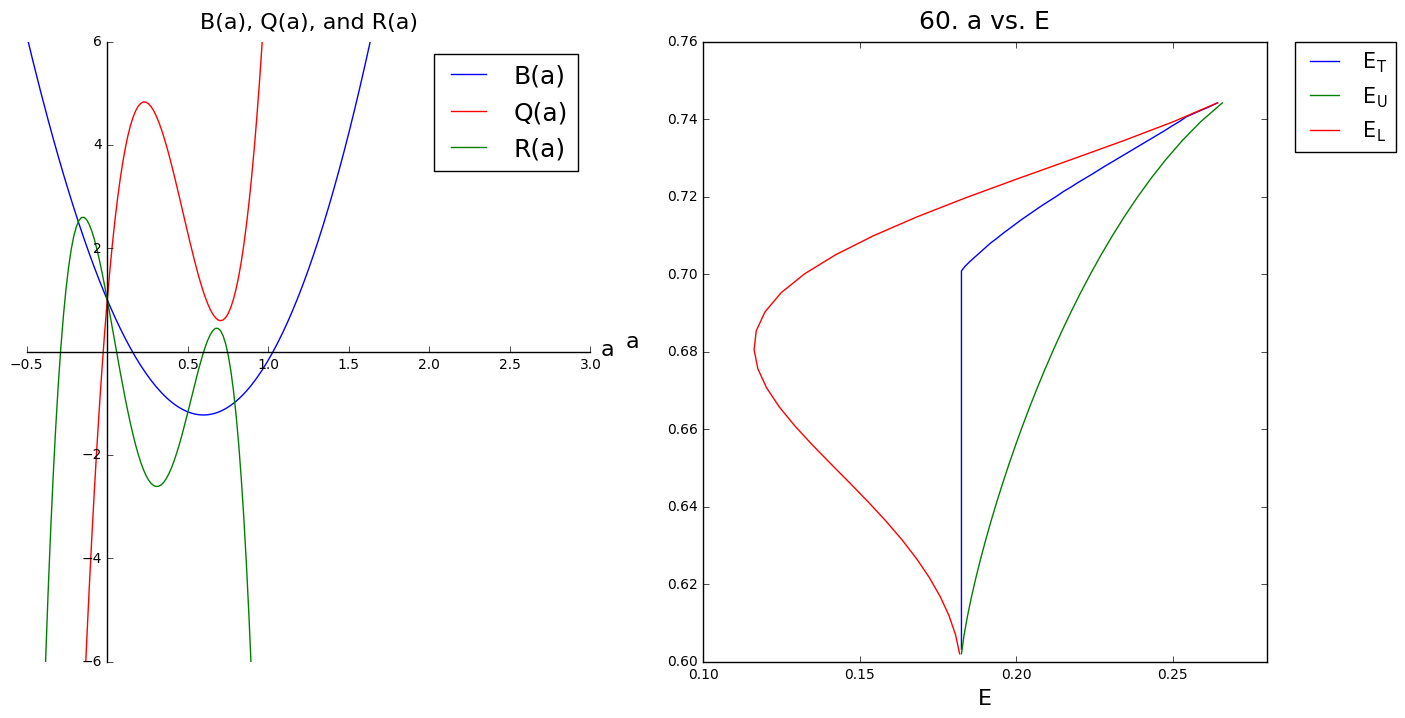

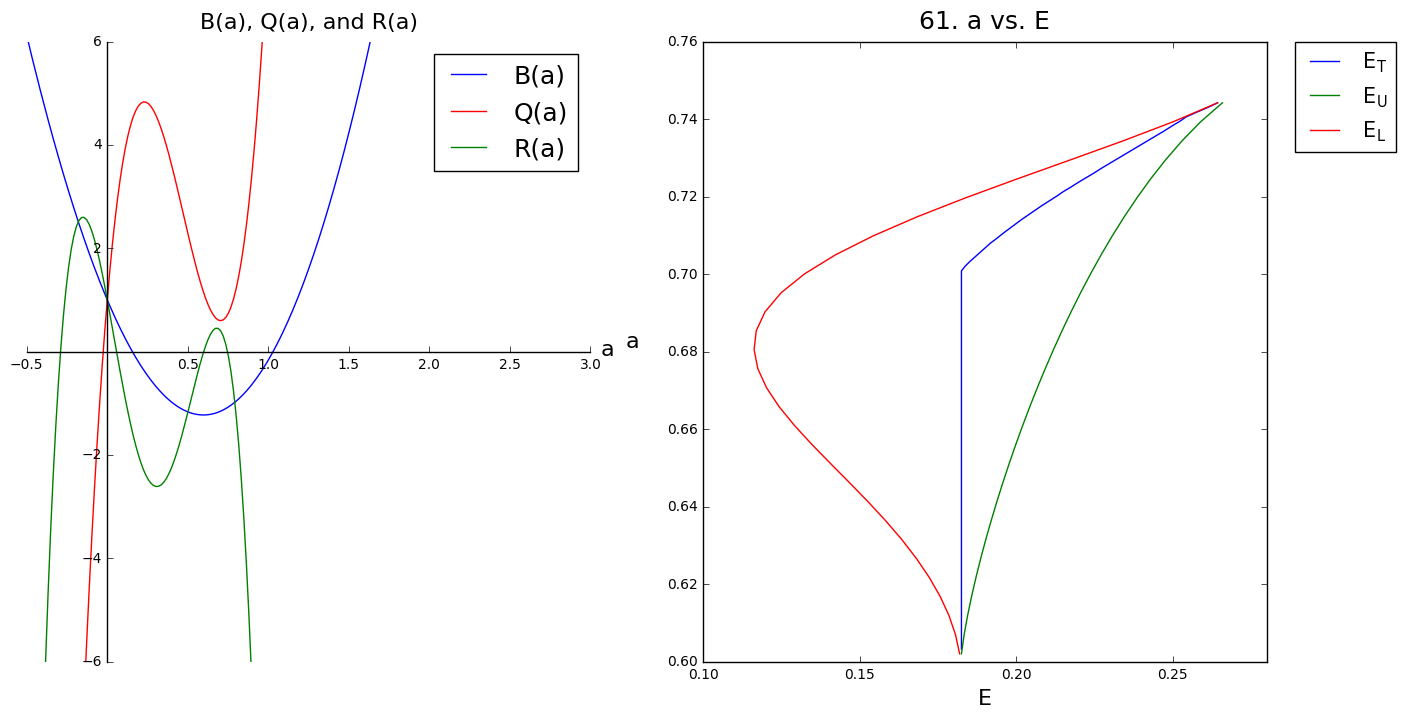

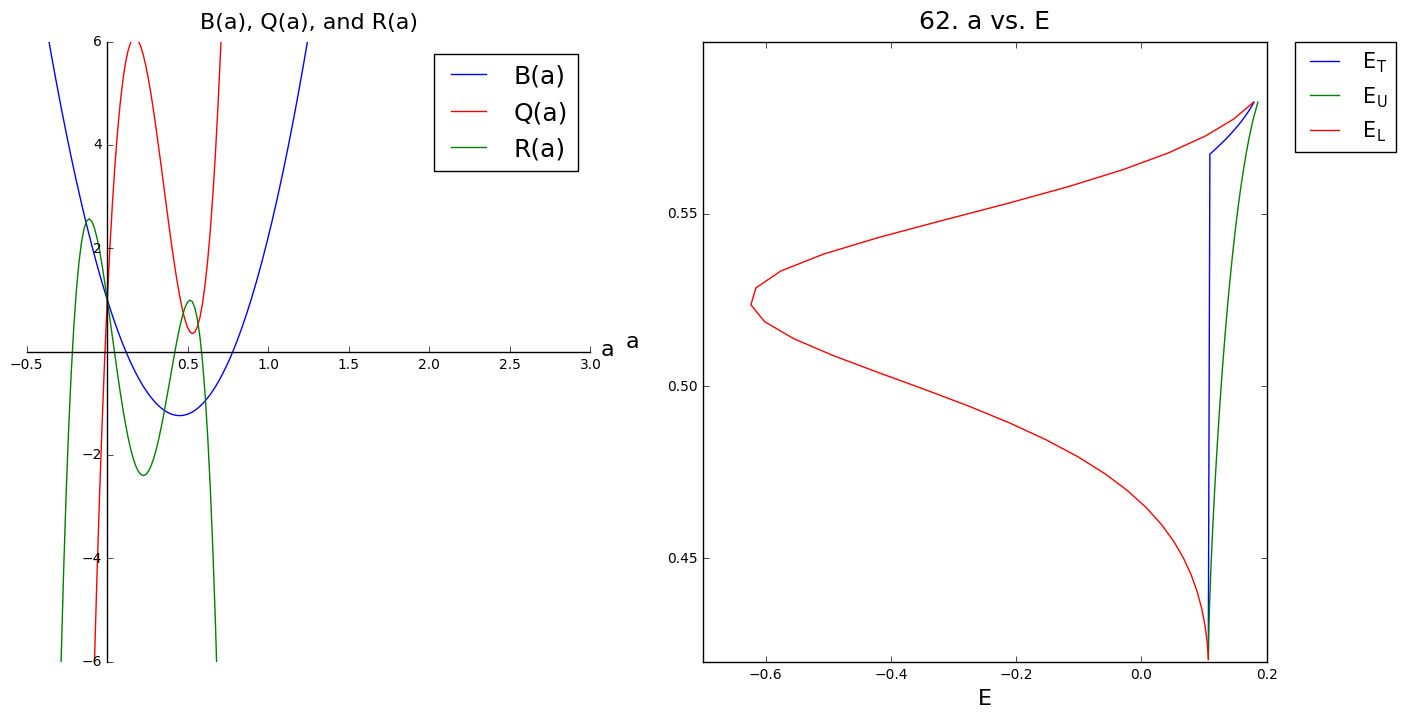

In [14]:
v = np.linspace(-8,8,1001)
with PdfPages('all_plots.pdf') as pdf:
    for i in range(np.where(np.array(r_p_val)>0)[0][0],len(vals)):
        F, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

        ax1.plot(v,B_a(v,gamma_val[i],e_val[i],r_p_val[i],b_0,b_3), label='B(a)',color='b')
        ax1.plot(v,Q_a(v,gamma_val[i],q_5,b_3,e_val[i],r_p_val[i],b_0,q_0),label='Q(a)',color='r')
        ax1.plot(v,R_a(v,gamma_val[i],e_val[i],r_p_val[i],b_0,b_3,q_0,q_5),label='R(a)',color='g')
        ax1.spines['left'].set_position('zero')
        ax1.spines['bottom'].set_position('zero')
        ax1.spines['right'].set_color('none')
        ax1.spines['top'].set_color('none')
        ax1.xaxis.set_ticks_position('bottom')
        ax1.yaxis.set_ticks_position('left')
        yticks = ax1.yaxis.get_major_ticks()
        yticks[3].label1.set_visible(False)
        xticks = ax1.xaxis.get_major_ticks()
        xticks[1].label1.set_visible(False)
        ax1.xaxis.set_label_coords(1.03,0.52)
        ax1.set_xlabel('a',fontsize=16)
        ax1.set_title('B(a), Q(a), and R(a)',fontsize=16, y=1.01)
        ax1.legend(loc='best',fontsize=18)
        ax1.set_xlim(-0.5,3)
        ax1.set_ylim(-6,6)

        plt.plot(E_TT[i-np.where(np.array(r_p_val)>0)[0][0]],a_TT[i-np.where(np.array(r_p_val)>0)[0][0]],'b',label='$\mathregular{E_T}$')
        ax2.plot(EUPPER(np.array(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]),np.array(a_UU[i-np.where(np.array(r_p_val)>0)[0][0]]),'g',label='$\mathregular{E_U}$')
        ax2.plot(ELOWER(np.array(a_LL[i-np.where(np.array(r_p_val)>0)[0][0]]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]),np.array(a_LL[i-np.where(np.array(r_p_val)>0)[0][0]]),'r',label='$\mathregular{E_L}$')
        ax2.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0,fontsize=15)
        ax2.set_xlabel('E',fontsize=16)
        ax2.set_ylabel('a',fontsize=16,rotation='horizontal',labelpad=25)
        ax2.set_title(str(1+i-np.where(np.array(r_p_val)>0)[0][0])+'. a vs. E',fontsize=18,y=1.01)

        pdf.savefig()

In [8]:
plots = [7,8,13,27,28,52,53]

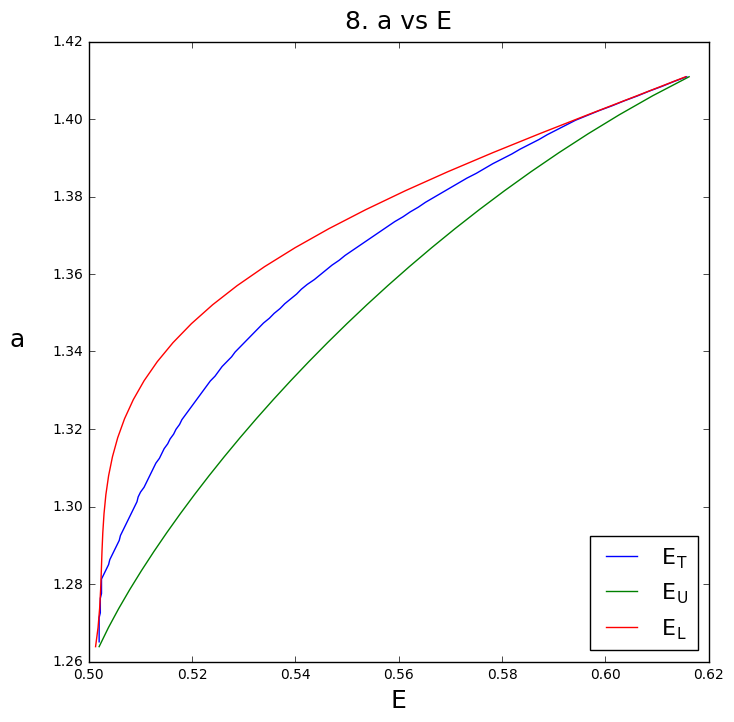

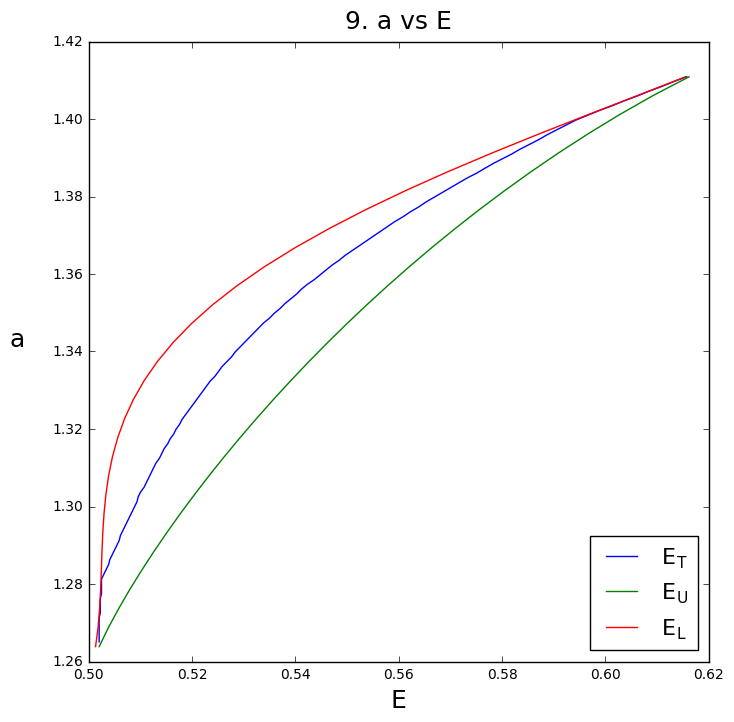

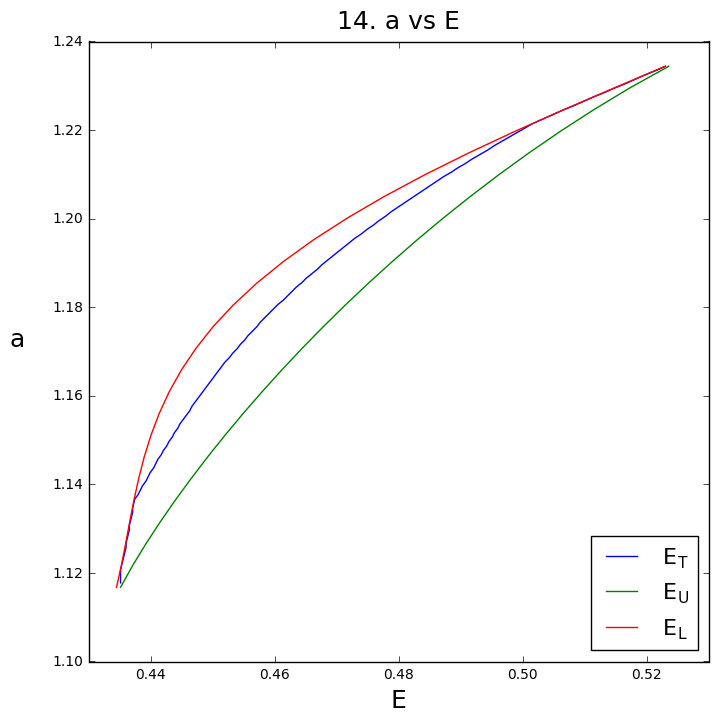

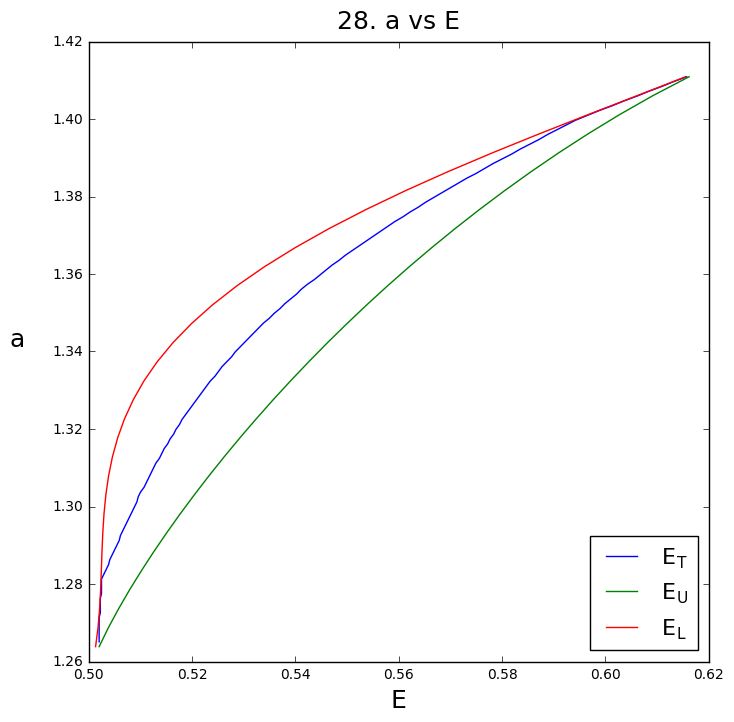

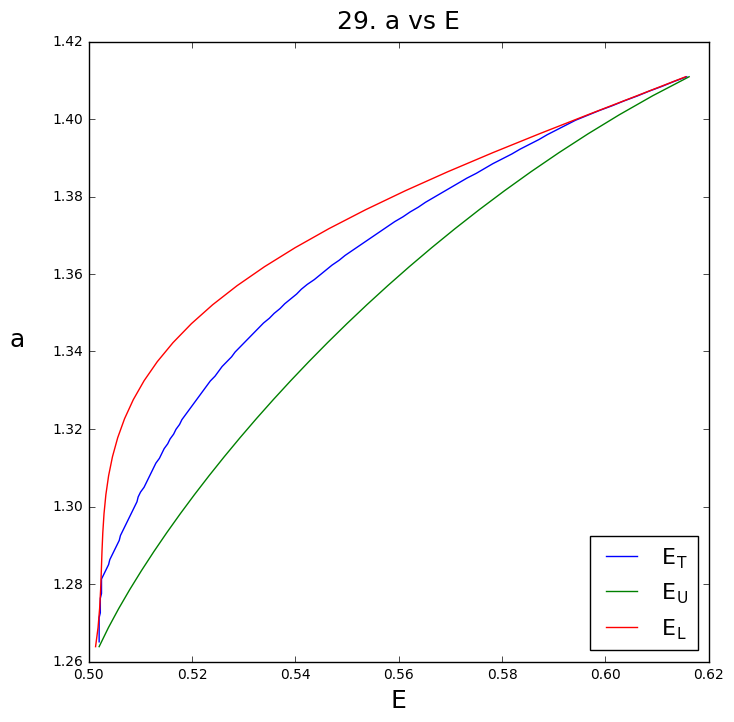

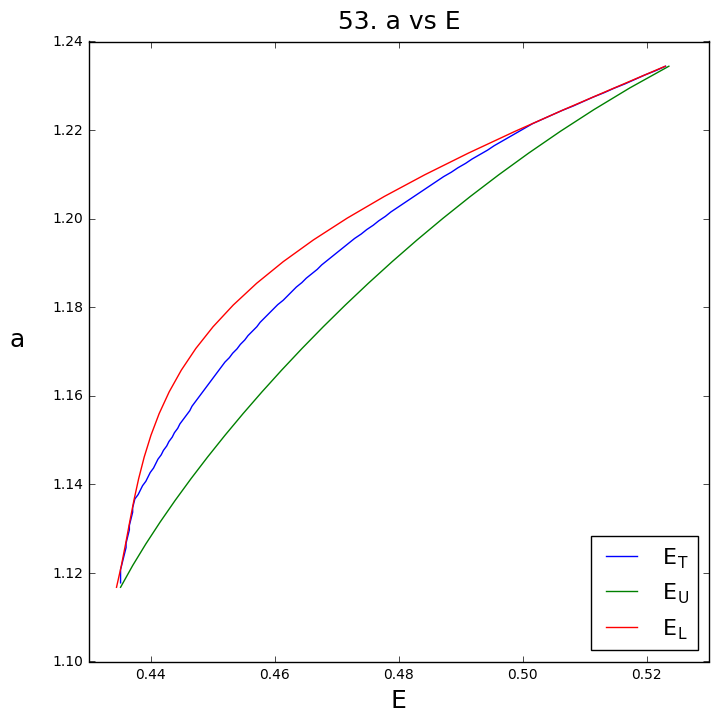

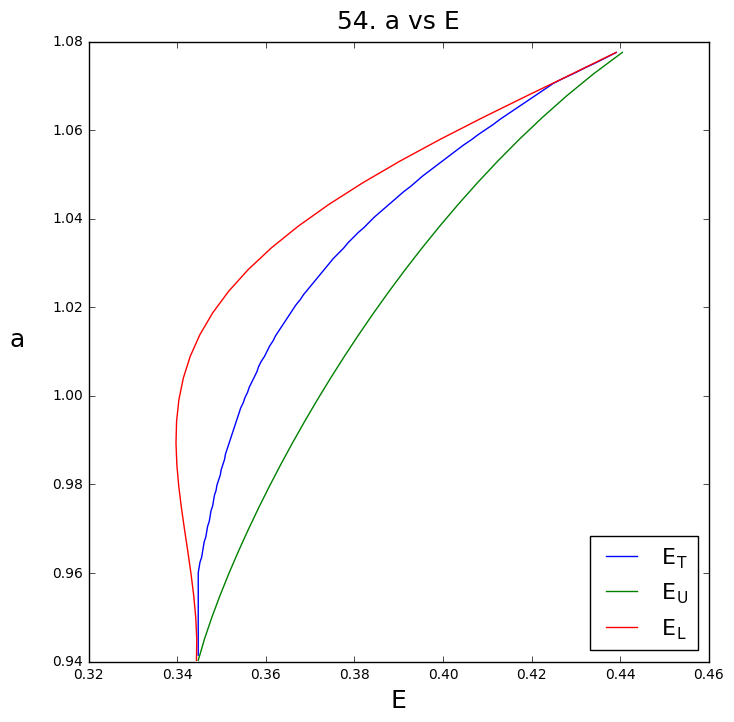

In [10]:
v = np.linspace(-8,8,1001)
with PdfPages('these_plots.pdf') as pdf:
    for i in plots:
    #     F, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
        figg = plt.figure(figsize=(8,8))

    #     ax1.plot(v,B_a(v,gamma_val[62+i],e_val[62+i],r_p_val[62+i],b_0,b_3), label='B(a)',color='b')
    #     ax1.plot(v,Q_a(v,gamma_val[62+i],q_5,b_3,e_val[62+i],r_p_val[62+i],b_0,q_0),label='Q(a)',color='r')
    #     ax1.plot(v,R_a(v,gamma_val[62+i],e_val[62+i],r_p_val[62+i],b_0,b_3,q_0,q_5),label='R(a)',color='g')
    #     ax1.spines['left'].set_position('zero')
    #     ax1.spines['bottom'].set_position('zero')
    #     ax1.spines['right'].set_color('none')
    #     ax1.spines['top'].set_color('none')
    #     ax1.xaxis.set_ticks_position('bottom')
    #     ax1.yaxis.set_ticks_position('left')
    #     yticks1 = ax1.yaxis.get_major_ticks()
    #     yticks1[3].label1.set_visible(False)
    #     xticks1 = ax1.xaxis.get_major_ticks()
    #     xticks1[1].label1.set_visible(False)
    #     ax1.xaxis.set_label_coords(1.03,0.52)
    #     ax1.set_xlabel('a',fontsize=16)
    #     ax1.set_title(str(i+1) +'. B(a), Q(a), and R(a)',fontsize=18)
    #     ax1.legend(loc='best',fontsize=18)
    #     ax1.set_xlim(-0.5,3)
    #     ax1.set_ylim(-6,6)

        plt.plot(E_TT[i],a_TT[i],'b',label='$\mathregular{E_T}$')
        plt.plot(EUPPER(np.array(a_UU[i]),r_p_val[62+i],u_p_val[62+i],v_p_val[62+i],u_c_val[62+i],v_c_val[62+i],e_val[62+i],gamma_val[62+i]),np.array(a_UU[i]),'g',label='$\mathregular{E_U}$')
        plt.plot(ELOWER(np.array(a_LL[i]),r_p_val[62+i],u_p_val[62+i],v_p_val[62+i],u_c_val[62+i],v_c_val[62+i],e_val[62+i],gamma_val[62+i]),np.array(a_LL[i]),'r',label='$\mathregular{E_L}$')
        plt.gca().set_title(str(i+1) +'. a vs E',fontsize=18,y=1.01)
        plt.xlabel('E',fontsize=18)
        plt.ylabel('a',fontsize=18,rotation='horizontal',labelpad=25)
        plt.legend(loc='lower right',fontsize=16);
        
        pdf.savefig()

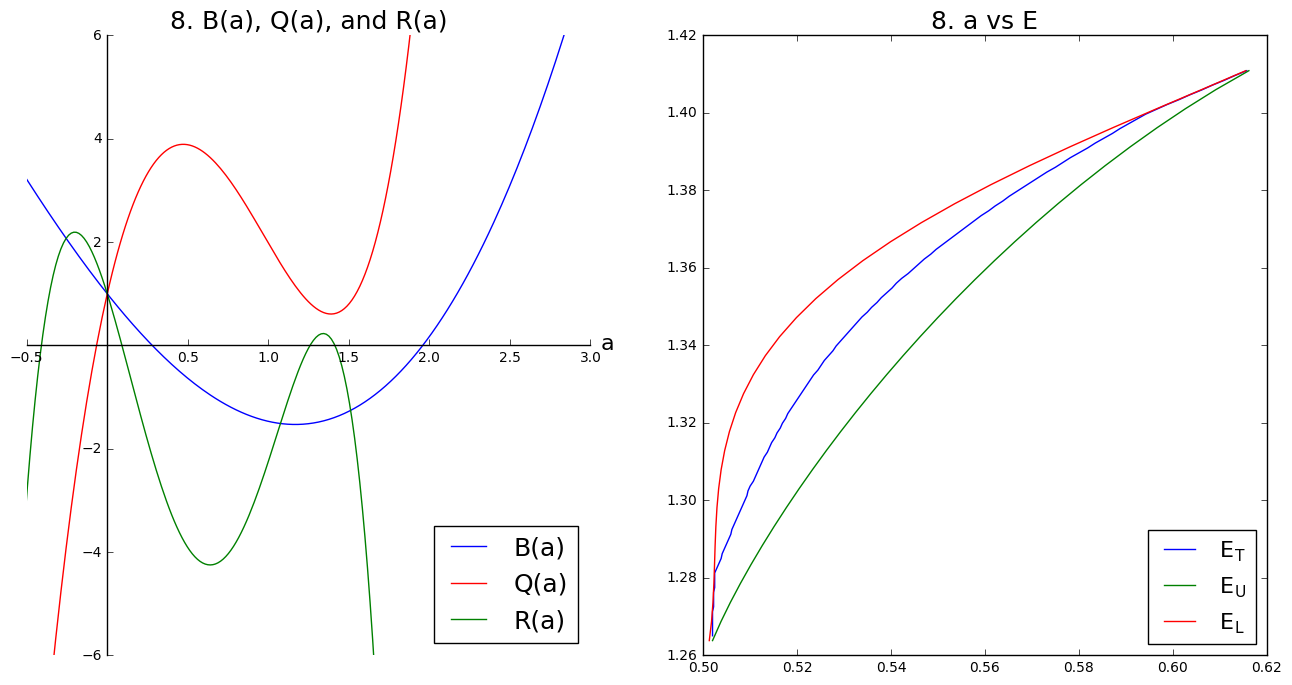

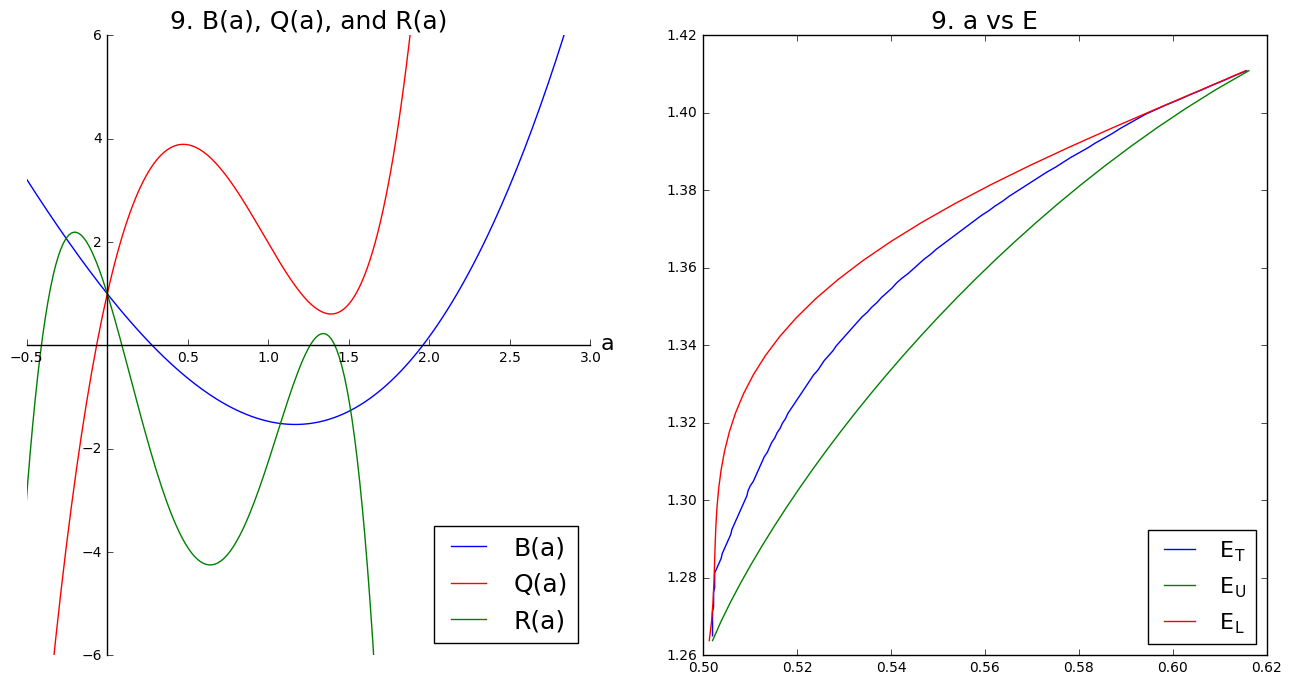

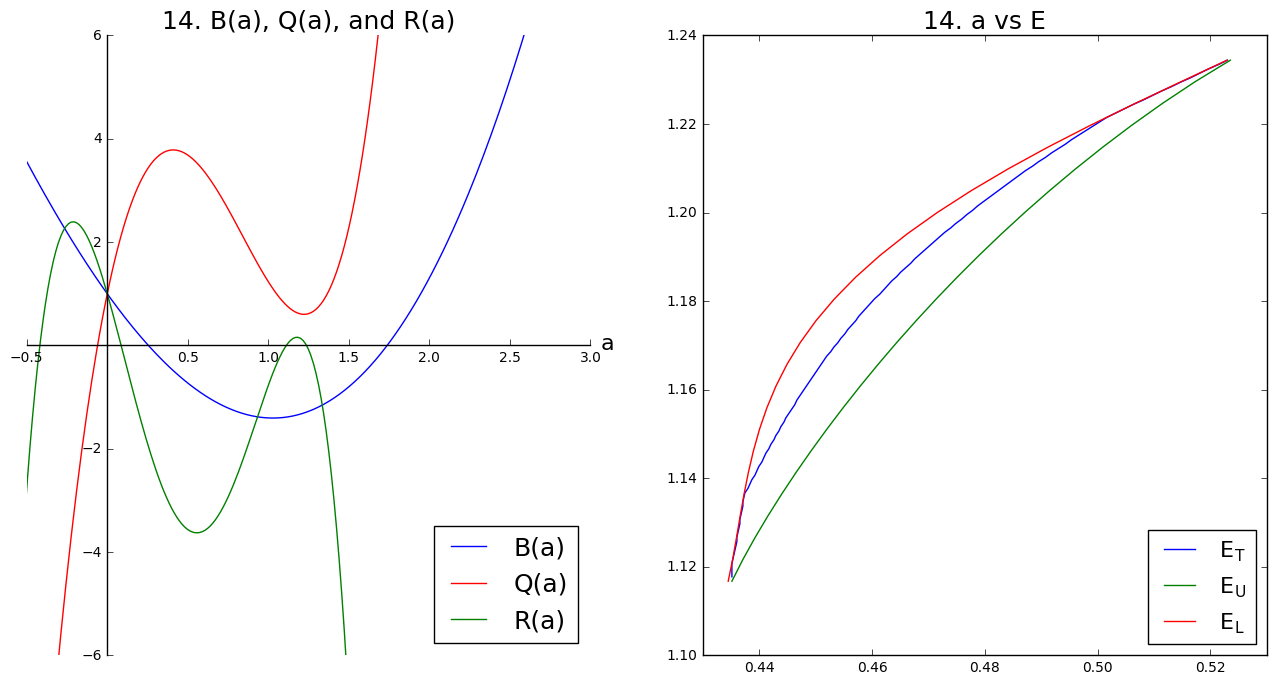

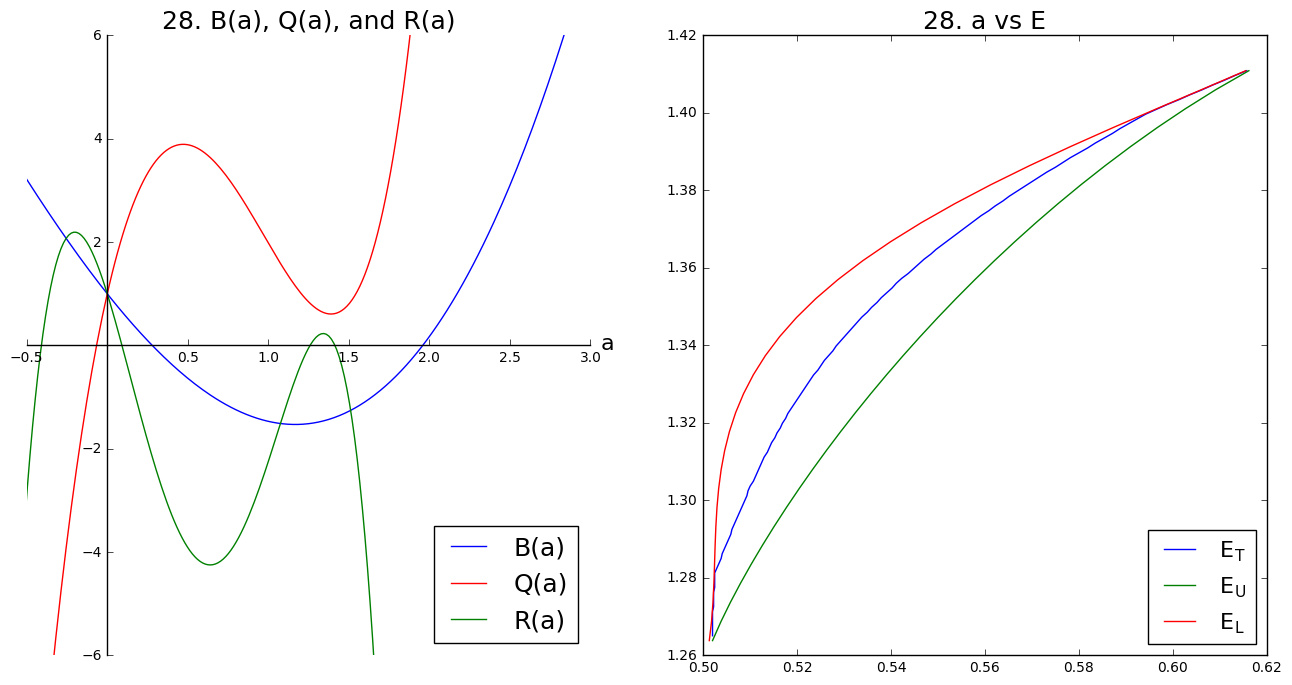

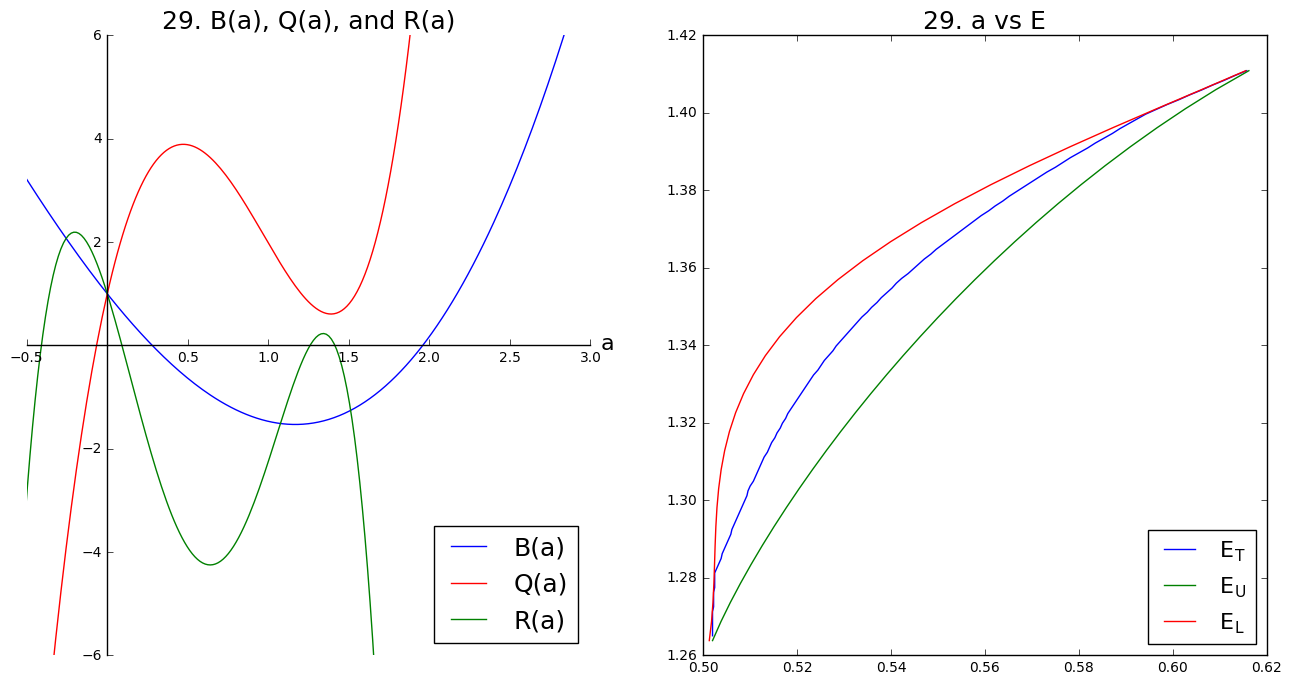

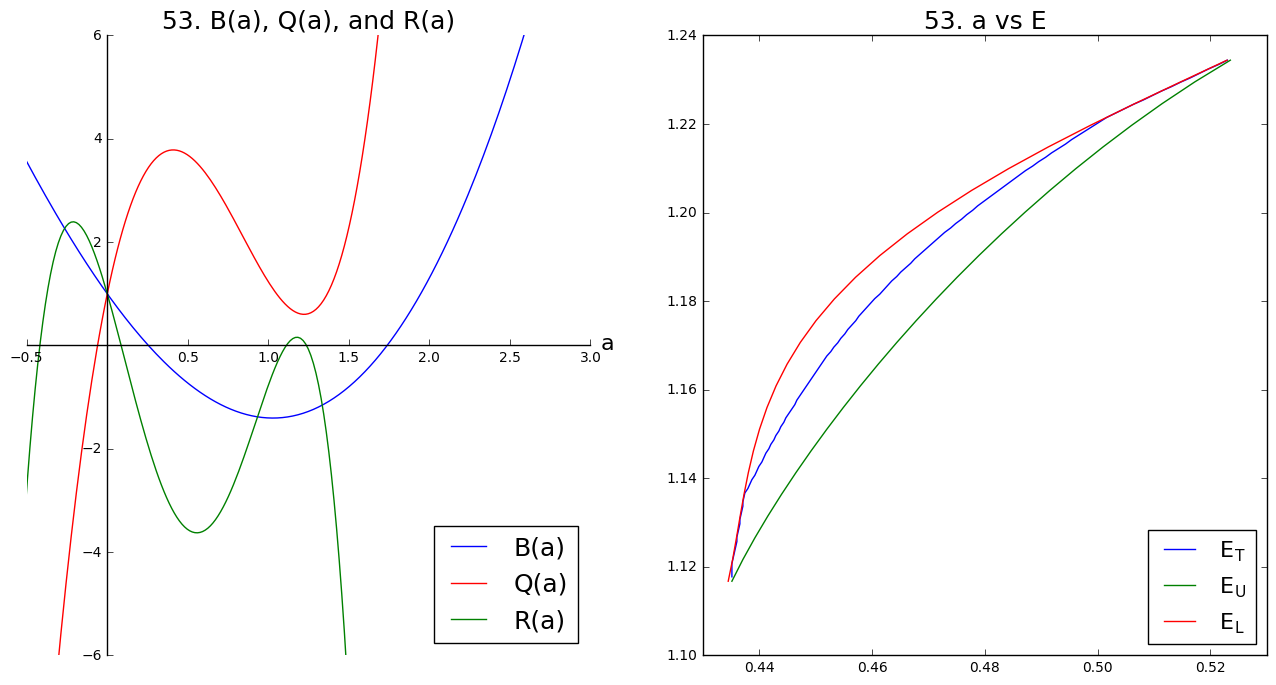

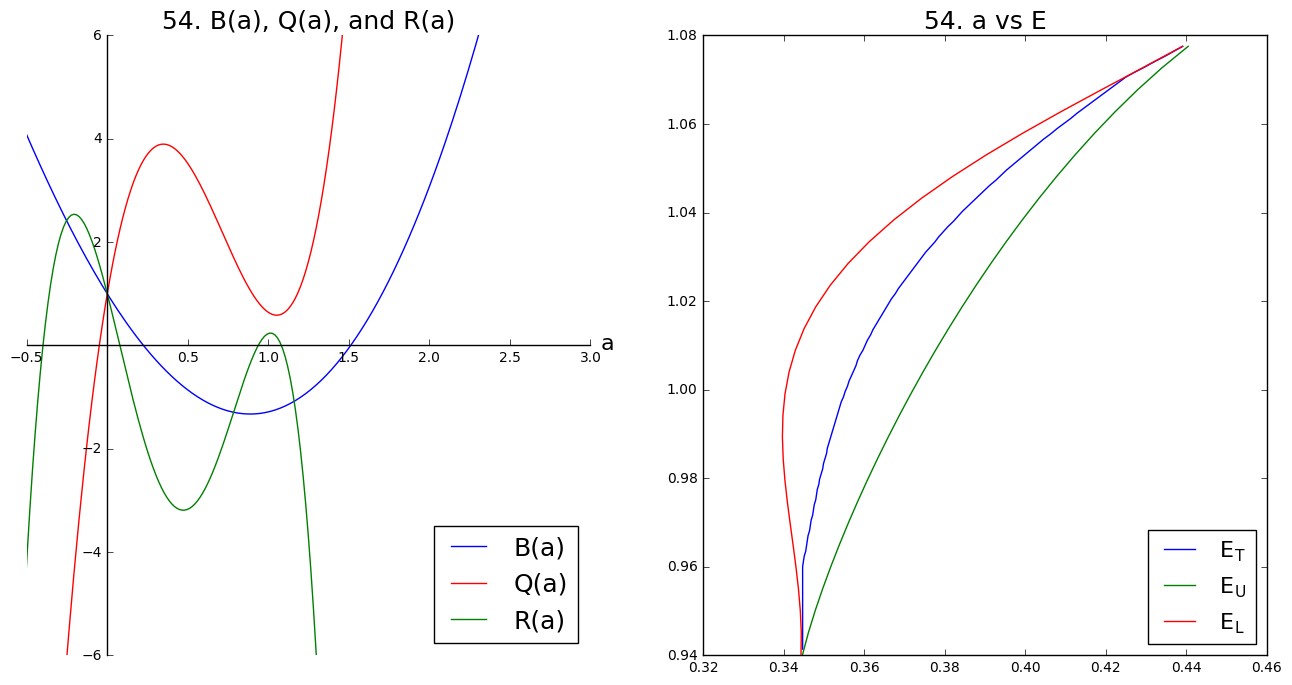

In [16]:
v = np.linspace(-8,8,1001)
with PdfPages('selected_plots.pdf') as pdf:
    for i in plots:
        F, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

        ax1.plot(v,B_a(v,gamma_val[62+i],e_val[62+i],r_p_val[62+i],b_0,b_3), label='B(a)',color='b')
        ax1.plot(v,Q_a(v,gamma_val[62+i],q_5,b_3,e_val[62+i],r_p_val[62+i],b_0,q_0),label='Q(a)',color='r')
        ax1.plot(v,R_a(v,gamma_val[62+i],e_val[62+i],r_p_val[62+i],b_0,b_3,q_0,q_5),label='R(a)',color='g')
        ax1.spines['left'].set_position('zero')
        ax1.spines['bottom'].set_position('zero')
        ax1.spines['right'].set_color('none')
        ax1.spines['top'].set_color('none')
        ax1.xaxis.set_ticks_position('bottom')
        ax1.yaxis.set_ticks_position('left')
        yticks1 = ax1.yaxis.get_major_ticks()
        yticks1[3].label1.set_visible(False)
        xticks1 = ax1.xaxis.get_major_ticks()
        xticks1[1].label1.set_visible(False)
        ax1.xaxis.set_label_coords(1.03,0.52)
        ax1.set_xlabel('a',fontsize=16)
        ax1.set_title(str(i+1) +'. B(a), Q(a), and R(a)',fontsize=18)
        ax1.legend(loc='best',fontsize=18)
        ax1.set_xlim(-0.5,3)
        ax1.set_ylim(-6,6)

        ax2.plot(E_TT[i],a_TT[i],'b',label='$\mathregular{E_T}$')
        ax2.plot(EUPPER(np.array(a_UU[i]),r_p_val[62+i],u_p_val[62+i],v_p_val[62+i],u_c_val[62+i],v_c_val[62+i],e_val[62+i],gamma_val[62+i]),np.array(a_UU[i]),'g',label='$\mathregular{E_U}$')
        ax2.plot(ELOWER(np.array(a_LL[i]),r_p_val[62+i],u_p_val[62+i],v_p_val[62+i],u_c_val[62+i],v_c_val[62+i],e_val[62+i],gamma_val[62+i]),np.array(a_LL[i]),'r',label='$\mathregular{E_L}$')
        ax2.set_title(str(i+1) +'. a vs E',fontsize=18)
        ax2.legend(loc='lower right',fontsize=16);
        
        pdf.savefig()